# Análise Exploratória de Dados - IPTU e ITBI (2019-2024)

Este notebook realiza uma análise exploratória completa dos dados de IPTU e ITBI do período de 2019 a 2024.

Caio Azevedo - Outubro de 2025

## Objetivos:
- Entender a estrutura e qualidade dos dados
- Identificar padrões temporais nas transações
- Analisar distribuições de valores
- Detectar outliers e anomalias
- Gerar insights sobre o mercado imobiliário

## ⚠️ Nota Importante:
- **ITBI**: Usa "Ano da Transacao" e "Mes da Transacao"
- **IPTU**: Usa "ANO DO EXERCICIO" (não possui coluna de mês)

## 1. Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import os

# Configurações
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize'] = (12, 6)

print('✅ Bibliotecas importadas com sucesso!')

✅ Bibliotecas importadas com sucesso!


## 2. Carregamento dos Dados

In [2]:
# Definir caminhos dos arquivos
data_path = 'data/'
iptu_file = data_path + 'IPTU_2019_2024_VV.csv'
itbi_file = data_path + 'ITBI_2019_2024_v2.csv'  # Usando versão melhorada com dados geográficos

print('Carregando dados...')
print(f'Arquivo IPTU: {iptu_file}')
print(f'Arquivo ITBI: {itbi_file} (versão v2 com dados geográficos)')

# Carregar dados
try:
    df_itbi = pd.read_csv(itbi_file, encoding='utf-8', low_memory=False)
    print(f'\n✅ Dados ITBI carregados: {df_itbi.shape[0]:,} registros e {df_itbi.shape[1]} colunas')
    
    df_iptu = pd.read_csv(iptu_file, encoding='utf-8', low_memory=False)
    print(f'✅ Dados IPTU carregados: {df_iptu.shape[0]:,} registros e {df_iptu.shape[1]} colunas')
    
except UnicodeDecodeError:
    print('Tentando com encoding latin-1...')
    df_itbi = pd.read_csv(itbi_file, encoding='latin-1', low_memory=False)
    df_iptu = pd.read_csv(iptu_file, encoding='latin-1', low_memory=False)
    print(f'✅ Dados carregados com sucesso!')

print('\n🎉 Carregamento concluído!')
print('\n📍 NOVAS COLUNAS GEOGRÁFICAS DISPONÍVEIS NO ITBI:')
print('   • setor: Identificação do setor da cidade')
print('   • quadra: Identificação da quadra')
print('   • lote: Identificação do lote')
print('   • bairro: Nome do bairro')

Carregando dados...
Arquivo IPTU: data/IPTU_2019_2024_VV.csv
Arquivo ITBI: data/ITBI_2019_2024_v2.csv (versão v2 com dados geográficos)

✅ Dados ITBI carregados: 941,623 registros e 18 colunas
✅ Dados IPTU carregados: 21,317,311 registros e 12 colunas

🎉 Carregamento concluído!

📍 NOVAS COLUNAS GEOGRÁFICAS DISPONÍVEIS NO ITBI:
   • setor: Identificação do setor da cidade
   • quadra: Identificação da quadra
   • lote: Identificação do lote
   • bairro: Nome do bairro


## 3. Visão Geral dos Dados

In [3]:
print('='*80)
print('INFORMAÇÕES GERAIS DOS DADOS'.center(80))
print('='*80)

print('\n📊 DADOS ITBI:')
print(f'   Dimensões: {df_itbi.shape[0]:,} linhas x {df_itbi.shape[1]} colunas')
print(f'   Memória utilizada: {df_itbi.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
print(f'   Período: {df_itbi["Ano da Transacao"].min()} - {df_itbi["Ano da Transacao"].max()}')

print('\n📊 DADOS IPTU:')
print(f'   Dimensões: {df_iptu.shape[0]:,} linhas x {df_iptu.shape[1]} colunas')
print(f'   Memória utilizada: {df_iptu.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
print(f'   Período: {df_iptu["ANO DO EXERCICIO"].min()} - {df_iptu["ANO DO EXERCICIO"].max()}')

print('\n🔍 PRIMEIRAS LINHAS - ITBI:')
display(df_itbi.head())

print('\n🔍 PRIMEIRAS LINHAS - IPTU:')
display(df_iptu.head())

                          INFORMAÇÕES GERAIS DOS DADOS                          

📊 DADOS ITBI:
   Dimensões: 941,623 linhas x 18 colunas
   Memória utilizada: 411.36 MB
   Período: 2019 - 2024

📊 DADOS IPTU:
   Dimensões: 21,317,311 linhas x 12 colunas
   Memória utilizada: 6667.43 MB
   Período: 2019 - 2024

🔍 PRIMEIRAS LINHAS - ITBI:


N° do Cadastro (SQL) Natureza de Transação  \
0           12310100659      1.Compra e venda   
1            5528502403      1.Compra e venda   
2           29903601032      1.Compra e venda   
3            4201104559      1.Compra e venda   
4            2206602970      1.Compra e venda   

   Valor de Transação (declarado pelo contribuinte) Data de Transação  \
0                                         900000.00        2019-01-02   
1                                         420000.00        2019-01-02   
2                                         650000.00        2019-01-03   
3                                          61765.36        2019-01-03   
4                                         965000.00        2019-01-03   

   Valor Venal de Referência  Proporção Transmitida (%)  \
0                   773836.0                      100.0   
1                   303832.0                      100.0   
2                   459364.0                      100.0   
3                   300840.0                      100.0   
4                   575501.0                      100.0   

   Valor Venal de Referência (proporcional)  Base de Cálculo adotada  \
0                                  773836.0                 900000.0   
1                                  303832.0                 420000.0   
2                                  459364.0                 650000.0   
3                                  300840.0                 300840.0   
4                                  575501.0                 965000.0   

               Tipo de Financiamento  Valor Financiado Situação do SQL  \
0  1.Sistema Financeiro de Habitação         400000.00   Ativo Predial   
1  1.Sistema Financeiro de Habitação         340721.07   Ativo Predial   
2                                NaN              0.00   Ativo Predial   
3                                NaN              0.00   Ativo Predial   
4                                NaN              0.00   Ativo Predial   

   Ano da Transacao  Mes da Transacao Ano/Mes da Transacao  setor  quadra  \
0              2019                 1              2019/01    123     101   
1              2019                 1              2019/01     55     285   
2              2019                 1              2019/01    299      36   
3              2019                 1              2019/01     42      11   
4              2019                 1              2019/01     22      66   

   lote         bairro  
0    65  JARDIM LEONOR  
1   240     VL FORMOSA  
2   103   VILA OLIMPIA  
3   455          SAUDE  
4   297       PERDIZES


🔍 PRIMEIRAS LINHAS - IPTU:


NUMERO DO CONTRIBUINTE  ANO DO EXERCICIO NOME DE LOGRADOURO DO IMOVEL  \
0               100300014              2019                  R S CAETANO   
1               100300022              2019                  R S CAETANO   
2               100300030              2019                  R S CAETANO   
3               100300049              2019                  R S CAETANO   
4               100300057              2019                  R S CAETANO   

   NUMERO DO IMOVEL  AREA DO TERRENO  AREA CONSTRUIDA  AREA OCUPADA  \
0              13.0            136.0            135.0         108.0   
1              19.0             90.0             67.0          67.0   
2              27.0            105.0            140.0          84.0   
3              33.0            108.0            103.0          86.0   
4              39.0            120.0             98.0          96.0   

   VALOR DO M2 DO TERRENO  VALOR DO M2 DE CONSTRUCAO TIPO DE USO DO IMOVEL  \
0                    2241                       1668                  Loja   
1                    2241                       1668                  Loja   
2                    2241                       1668                  Loja   
3                    2241                       1668                  Loja   
4                    2241                       1668                  Loja   

      TIPO DE PADRAO DA CONSTRUCAO   VALOR VENAL  
0  Comercial horizontal - padrão B  325195.24248  
1  Comercial horizontal - padrão B  197014.74000  
2  Comercial horizontal - padrão B  264429.29100  
3  Comercial horizontal - padrão B  257510.61600  
4  Comercial horizontal - padrão B  280637.04000

## 4. Estrutura e Tipos de Dados

In [4]:
print('='*80)
print('ESTRUTURA DOS DADOS'.center(80))
print('='*80)

print('\n📋 COLUNAS ITBI:')
print(df_itbi.columns.tolist())

print('\n📋 INFORMAÇÕES ITBI:')
print(df_itbi.info())

print('\n📋 COLUNAS IPTU:')
print(df_iptu.columns.tolist())

print('\n📋 INFORMAÇÕES IPTU:')
print(df_iptu.info())

                              ESTRUTURA DOS DADOS                               

📋 COLUNAS ITBI:
['N° do Cadastro (SQL)', 'Natureza de Transação', 'Valor de Transação (declarado pelo contribuinte)', 'Data de Transação', 'Valor Venal de Referência', 'Proporção Transmitida (%)', 'Valor Venal de Referência (proporcional)', 'Base de Cálculo adotada', 'Tipo de Financiamento', 'Valor Financiado', 'Situação do SQL', 'Ano da Transacao', 'Mes da Transacao', 'Ano/Mes da Transacao', 'setor', 'quadra', 'lote', 'bairro']

📋 INFORMAÇÕES ITBI:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941623 entries, 0 to 941622
Data columns (total 18 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   N° do Cadastro (SQL)                              941623 non-null  int64  
 1   Natureza de Transação                             941623 non-null  object 
 2   Valor de Transação (declarad

In [5]:
print('='*80)
print('INFORMAÇÕES GERAIS DOS DADOS'.center(80))
print('='*80)

print('\n📊 DADOS ITBI:')
print(f'   Dimensões: {df_itbi.shape[0]:,} linhas x {df_itbi.shape[1]} colunas')
print(f'   Memória utilizada: {df_itbi.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
print(f'   Período: {df_itbi["Ano da Transacao"].min()} - {df_itbi["Ano da Transacao"].max()}')

print('\n📊 DADOS IPTU:')
print(f'   Dimensões: {df_iptu.shape[0]:,} linhas x {df_iptu.shape[1]} colunas')
print(f'   Memória utilizada: {df_iptu.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
print(f'   Período: {df_iptu["ANO DO EXERCICIO"].min()} - {df_iptu["ANO DO EXERCICIO"].max()}')

print('\n🔍 PRIMEIRAS LINHAS - ITBI:')
display(df_itbi.head())

print('\n🔍 PRIMEIRAS LINHAS - IPTU:')
display(df_iptu.head())

                          INFORMAÇÕES GERAIS DOS DADOS                          

📊 DADOS ITBI:
   Dimensões: 941,623 linhas x 18 colunas
   Memória utilizada: 411.36 MB
   Período: 2019 - 2024

📊 DADOS IPTU:
   Dimensões: 21,317,311 linhas x 12 colunas
   Memória utilizada: 6667.43 MB
   Período: 2019 - 2024

🔍 PRIMEIRAS LINHAS - ITBI:


N° do Cadastro (SQL) Natureza de Transação  \
0           12310100659      1.Compra e venda   
1            5528502403      1.Compra e venda   
2           29903601032      1.Compra e venda   
3            4201104559      1.Compra e venda   
4            2206602970      1.Compra e venda   

   Valor de Transação (declarado pelo contribuinte) Data de Transação  \
0                                         900000.00        2019-01-02   
1                                         420000.00        2019-01-02   
2                                         650000.00        2019-01-03   
3                                          61765.36        2019-01-03   
4                                         965000.00        2019-01-03   

   Valor Venal de Referência  Proporção Transmitida (%)  \
0                   773836.0                      100.0   
1                   303832.0                      100.0   
2                   459364.0                      100.0   
3                   300840.0                      100.0   
4                   575501.0                      100.0   

   Valor Venal de Referência (proporcional)  Base de Cálculo adotada  \
0                                  773836.0                 900000.0   
1                                  303832.0                 420000.0   
2                                  459364.0                 650000.0   
3                                  300840.0                 300840.0   
4                                  575501.0                 965000.0   

               Tipo de Financiamento  Valor Financiado Situação do SQL  \
0  1.Sistema Financeiro de Habitação         400000.00   Ativo Predial   
1  1.Sistema Financeiro de Habitação         340721.07   Ativo Predial   
2                                NaN              0.00   Ativo Predial   
3                                NaN              0.00   Ativo Predial   
4                                NaN              0.00   Ativo Predial   

   Ano da Transacao  Mes da Transacao Ano/Mes da Transacao  setor  quadra  \
0              2019                 1              2019/01    123     101   
1              2019                 1              2019/01     55     285   
2              2019                 1              2019/01    299      36   
3              2019                 1              2019/01     42      11   
4              2019                 1              2019/01     22      66   

   lote         bairro  
0    65  JARDIM LEONOR  
1   240     VL FORMOSA  
2   103   VILA OLIMPIA  
3   455          SAUDE  
4   297       PERDIZES


🔍 PRIMEIRAS LINHAS - IPTU:


NUMERO DO CONTRIBUINTE  ANO DO EXERCICIO NOME DE LOGRADOURO DO IMOVEL  \
0               100300014              2019                  R S CAETANO   
1               100300022              2019                  R S CAETANO   
2               100300030              2019                  R S CAETANO   
3               100300049              2019                  R S CAETANO   
4               100300057              2019                  R S CAETANO   

   NUMERO DO IMOVEL  AREA DO TERRENO  AREA CONSTRUIDA  AREA OCUPADA  \
0              13.0            136.0            135.0         108.0   
1              19.0             90.0             67.0          67.0   
2              27.0            105.0            140.0          84.0   
3              33.0            108.0            103.0          86.0   
4              39.0            120.0             98.0          96.0   

   VALOR DO M2 DO TERRENO  VALOR DO M2 DE CONSTRUCAO TIPO DE USO DO IMOVEL  \
0                    2241                       1668                  Loja   
1                    2241                       1668                  Loja   
2                    2241                       1668                  Loja   
3                    2241                       1668                  Loja   
4                    2241                       1668                  Loja   

      TIPO DE PADRAO DA CONSTRUCAO   VALOR VENAL  
0  Comercial horizontal - padrão B  325195.24248  
1  Comercial horizontal - padrão B  197014.74000  
2  Comercial horizontal - padrão B  264429.29100  
3  Comercial horizontal - padrão B  257510.61600  
4  Comercial horizontal - padrão B  280637.04000

## 5. Análise de Valores Ausentes

                       ANÁLISE DE VALORES AUSENTES - ITBI                       

⚠️  Colunas com valores ausentes (2):


Valores Ausentes  Percentual (%)
Tipo de Financiamento              575621       61.130729
Base de Cálculo adotada               172        0.018266

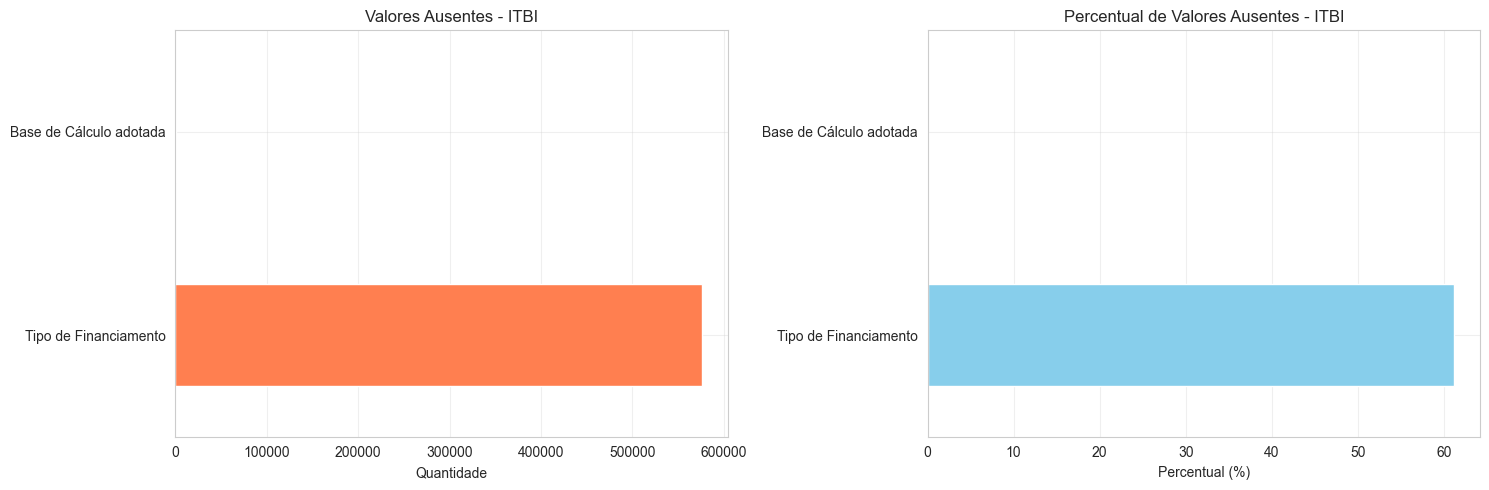


📊 RESUMO:
   Total de registros: 941,623
   Total de valores ausentes: 575,793
   Percentual geral: 3.40%
                       ANÁLISE DE VALORES AUSENTES - IPTU                       


In [ ]:
def analyze_missing_data(df, dataset_name):
    print('='*80)
    print(f'ANÁLISE DE VALORES AUSENTES - {dataset_name}'.center(80))
    print('='*80)
    
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Valores Ausentes': missing_data,
        'Percentual (%)': missing_percent
    })
    
    missing_df = missing_df[missing_df['Valores Ausentes'] > 0].sort_values('Valores Ausentes', ascending=False)
    
    if len(missing_df) > 0:
        print(f'\n⚠️  Colunas com valores ausentes ({len(missing_df)}):')
        display(missing_df)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        missing_df['Valores Ausentes'].plot(kind='barh', ax=axes[0], color='coral')
        axes[0].set_title(f'Valores Ausentes - {dataset_name}')
        axes[0].set_xlabel('Quantidade')
        axes[0].grid(True, alpha=0.3)
        
        missing_df['Percentual (%)'].plot(kind='barh', ax=axes[1], color='skyblue')
        axes[1].set_title(f'Percentual de Valores Ausentes - {dataset_name}')
        axes[1].set_xlabel('Percentual (%)')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    else:
        print('\n✅ Nenhum valor ausente encontrado!')
    
    total_missing = df.isnull().sum().sum()
    total_cells = len(df) * len(df.columns)
    
    print(f'\n📊 RESUMO:')
    print(f'   Total de registros: {len(df):,}')
    print(f'   Total de valores ausentes: {total_missing:,}')
    print(f'   Percentual geral: {(total_missing / total_cells) * 100:.2f}%')

analyze_missing_data(df_itbi, 'ITBI')
analyze_missing_data(df_iptu, 'IPTU')

## 6. Análises Descritivas Estatísticas

### 6.1. Estatísticas Gerais

In [ ]:
print('='*80)
print('ESTATÍSTICAS DESCRITIVAS - ITBI'.center(80))
print('='*80)
display(df_itbi.describe())

print('\n' + '='*80)
print('ESTATÍSTICAS DESCRITIVAS - IPTU'.center(80))
print('='*80)
display(df_iptu.describe())

                        ESTATÍSTICAS DESCRITIVAS - ITBI                         


N° do Cadastro (SQL)  Valor de Transação (declarado pelo contribuinte)  \
count          9.416230e+05                                      9.416230e+05   
mean           9.061569e+09                                      6.260102e+05   
std            7.146567e+09                                      2.860636e+06   
min            1.003000e+08                                      0.000000e+00   
25%            3.908000e+09                                      2.150000e+05   
50%            7.700100e+09                                      3.076000e+05   
75%            1.200782e+10                                      5.500000e+05   
max            3.101180e+10                                      7.294351e+08   

       Valor Venal de Referência  Proporção Transmitida (%)  \
count               9.416230e+05              941623.000000   
mean                4.529647e+06                  68.498325   
std                 2.029434e+07                  44.734671   
min                 0.000000e+00                   0.000000   
25%                 2.318365e+05                   1.060000   
50%                 4.525800e+05                 100.000000   
75%                 1.716772e+06                 100.000000   
max                 1.652865e+09                 823.640000   

       Valor Venal de Referência (proporcional)  Base de Cálculo adotada  \
count                              9.416230e+05             9.414510e+05   
mean                               4.121873e+05             6.739619e+05   
std                                2.149074e+06             2.964743e+06   
min                                0.000000e+00             0.000000e+00   
25%                                3.703902e+04             2.300000e+05   
50%                                2.063220e+05             3.300000e+05   
75%                                4.163200e+05             6.000000e+05   
max                                4.884079e+08             7.294351e+08   

       Valor Financiado  Ano da Transacao  Mes da Transacao          setor  \
count      9.416230e+05     941623.000000     941623.000000  941623.000000   
mean       1.050334e+05       2021.877749          6.905531      90.476269   
std        1.873844e+05          1.658088          3.364777      71.458373   
min       -6.043390e+05       2019.000000          1.000000       1.000000   
25%        0.000000e+00       2021.000000          4.000000      39.000000   
50%        0.000000e+00       2022.000000          7.000000      77.000000   
75%        1.890000e+05       2023.000000         10.000000     120.000000   
max        2.900000e+07       2024.000000         12.000000     310.000000   

              quadra           lote  
count  941623.000000  941623.000000  
mean      139.386808     301.697812  
std       140.191537     493.418571  
min         1.000000       1.000000  
25%        39.000000      42.000000  
50%        88.000000     129.000000  
75%       199.000000     354.000000  
max       999.000000    5371.000000


                        ESTATÍSTICAS DESCRITIVAS - IPTU                         


NUMERO DO CONTRIBUINTE  ANO DO EXERCICIO  NUMERO DO IMOVEL  \
count            2.131731e+07      2.131731e+07      2.080486e+07   
mean             1.004558e+10      2.021536e+03      5.818727e+02   
std              7.331597e+09      1.707710e+00      1.124399e+03   
min              1.003000e+08      2.019000e+03      0.000000e+00   
25%              4.301000e+09      2.020000e+03      1.020000e+02   
50%              8.600801e+09      2.022000e+03      2.620000e+02   
75%              1.472821e+10      2.023000e+03      6.190000e+02   
max              3.101200e+10      2.024000e+03      9.954100e+04   

       AREA DO TERRENO  AREA CONSTRUIDA  AREA OCUPADA  VALOR DO M2 DO TERRENO  \
count     2.131731e+07     2.131731e+07  2.131731e+07            2.131731e+07   
mean      3.986785e+03     1.542920e+02  1.304123e+03            2.462210e+03   
std       1.692368e+04     1.057458e+03  3.451620e+03            3.144230e+03   
min       1.000000e+00     0.000000e+00  0.000000e+00            4.500000e+01   
25%       1.850000e+02     6.300000e+01  9.000000e+01            6.820000e+02   
50%       7.110000e+02     1.000000e+02  3.240000e+02            1.331000e+03   
75%       2.481000e+03     1.530000e+02  1.234000e+03            2.870000e+03   
max       4.307493e+06     9.503280e+05  4.642000e+05            3.287100e+04   

       VALOR DO M2 DE CONSTRUCAO   VALOR VENAL  
count               2.131731e+07  2.131731e+07  
mean                1.846708e+03  4.373410e+05  
std                 8.199728e+02  4.474126e+06  
min                 0.000000e+00  7.800975e+01  
25%                 1.322000e+03  1.128666e+05  
50%                 1.774000e+03  2.091424e+05  
75%                 2.291000e+03  3.790482e+05  
max                 4.249000e+03  4.861333e+09

### 6.2. Análise Geográfica - ITBI

Esta seção analisa as informações geográficas disponíveis no arquivo ITBI v2, incluindo bairro, setor, quadra e lote.


In [ ]:
print('='*80)
print('ANÁLISE GEOGRÁFICA - ITBI'.center(80))
print('='*80)

# Verificar colunas geográficas
colunas_geograficas = ['setor', 'quadra', 'lote', 'bairro']
colunas_existentes = [col for col in colunas_geograficas if col in df_itbi.columns]

print(f'\n📍 COLUNAS GEOGRÁFICAS DISPONÍVEIS: {colunas_existentes}')

if len(colunas_existentes) > 0:
    print('\n📊 ESTATÍSTICAS GEOGRÁFICAS:')
    
    for coluna in colunas_existentes:
        print(f'\n{coluna.upper()}:')
        print(f'   Valores únicos: {df_itbi[coluna].nunique():,}')
        print(f'   Valores ausentes: {df_itbi[coluna].isnull().sum():,} ({(df_itbi[coluna].isnull().sum() / len(df_itbi)) * 100:.2f}%)')
        
        if coluna == 'bairro':
            print(f'   Top 10 bairros:')
            top_bairros = df_itbi[coluna].value_counts().head(10)
            for bairro, count in top_bairros.items():
                print(f'     {bairro}: {count:,} transações')
        
        elif coluna in ['setor', 'quadra', 'lote']:
            print(f'   Valores únicos: {df_itbi[coluna].nunique():,}')
            print(f'   Exemplo de valores: {df_itbi[coluna].dropna().head(5).tolist()}')
    
    # Análise de completude geográfica
    print('\n🔍 ANÁLISE DE COMPLETUDE GEOGRÁFICA:')
    df_itbi['completude_geo'] = df_itbi[colunas_existentes].notna().sum(axis=1)
    completude_stats = df_itbi['completude_geo'].value_counts().sort_index()
    
    print('\nDistribuição de completude (quantas colunas geográficas preenchidas):')
    for i, count in completude_stats.items():
        print(f'   {i} colunas preenchidas: {count:,} registros ({(count/len(df_itbi))*100:.2f}%)')
    
    # Registros com informações geográficas completas
    registros_completos = df_itbi[df_itbi['completude_geo'] == len(colunas_existentes)]
    print(f'\n✅ Registros com informações geográficas completas: {len(registros_completos):,} ({(len(registros_completos)/len(df_itbi))*100:.2f}%)')
    
else:
    print('\n❌ Nenhuma coluna geográfica encontrada!')


                           ANÁLISE GEOGRÁFICA - ITBI                            

📍 COLUNAS GEOGRÁFICAS DISPONÍVEIS: ['setor', 'quadra', 'lote', 'bairro']

📊 ESTATÍSTICAS GEOGRÁFICAS:

SETOR:
   Valores únicos: 291
   Valores ausentes: 0 (0.00%)
   Valores únicos: 291
   Exemplo de valores: [123, 55, 299, 42, 22]

QUADRA:
   Valores únicos: 812
   Valores ausentes: 0 (0.00%)
   Valores únicos: 812
   Exemplo de valores: [101, 285, 36, 11, 66]

LOTE:
   Valores únicos: 4,204
   Valores ausentes: 0 (0.00%)
   Valores únicos: 4,204
   Exemplo de valores: [65, 240, 103, 455, 297]

BAIRRO:
   Valores únicos: 201
   Valores ausentes: 0 (0.00%)
   Top 10 bairros:
     SAUDE: 40,068 transações
     SANTO AMARO: 37,227 transações
     TATUAPE: 34,440 transações
     BUTANTA: 30,873 transações
     INDIANOPOLIS: 25,350 transações
     CERQUEIRA CESAR: 24,965 transações
     PINHEIROS: 24,425 transações
     PERDIZES: 22,917 transações
     MORUMBI: 22,881 transações
     LAPA: 21,999 transações


### 6.3. Análise por Bairro - ITBI

Esta seção analisa as transações ITBI por bairro, incluindo volume de transações, valores médios e distribuição temporal.


                           ANÁLISE POR BAIRRO - ITBI                            

📊 Registros com bairro preenchido: 941,623 (100.00%)

📋 TOP 20 BAIRROS POR VOLUME DE TRANSAÇÕES:


Bairro  Transacoes  Valor_Medio  Valor_Mediano   Valor_Std  \
161            SAUDE       40068    596568.72      395000.00  1419841.05   
157      SANTO AMARO       37227    706373.89      365000.00  3056282.06   
168          TATUAPE       34440    572845.23      364720.88  1188519.10   
16           BUTANTA       30873    606818.42      348000.00  3909061.71   
64      INDIANOPOLIS       25350   1141446.48      508205.00  2601231.70   
31   CERQUEIRA CESAR       24965    986661.96      380000.00  2874188.59   
137        PINHEIROS       24425   1476621.88      560000.00  3822036.27   
135         PERDIZES       22917    789136.63      520000.00  1466007.86   
128          MORUMBI       22881    480906.94      350000.00   790943.34   
121             LAPA       21999    745030.43      470000.00  1827749.09   
127            MOOCA       21521    515955.68      266000.00  4203383.00   
14          BROOKLIN       21369   1336603.87      635000.00  4418725.75   
155    SANTA CECILIA       20172    533709.80      310000.00  1585015.50   
66          IPIRANGA       20039    486504.70      317226.00  1322860.39   
9         BELA VISTA       19368    622114.27      288193.00  4871776.23   
139         PIRITUBA       18536    419292.81      280000.00  2902269.29   
156          SANTANA       17159    533892.89      350000.00  1708678.79   
171         TUCURUVI       16310    379924.24      300000.00  2886458.79   
70         JABAQUARA       15172    436654.69      308000.00  1193374.55   
192       VL FORMOSA       14436    386492.43      300000.00   431165.86   

     Valor_Min     Valor_Max  Ano_Min  Ano_Max  
161       0.01  1.017698e+08     2019     2024  
157       0.00  2.720000e+08     2019     2024  
168       0.01  1.026970e+08     2019     2024  
16        0.00  4.300000e+08     2019     2024  
64        0.00  1.300000e+08     2019     2024  
31        0.01  1.295102e+08     2019     2024  
137       0.01  1.985931e+08     2019     2024  
135       0.01  8.000000e+07     2019     2024  
128       0.01  4.555224e+07     2019     2024  
121       0.01  1.050869e+08     2019     2024  
127       0.01  5.150000e+08     2019     2024  
14        0.01  3.853944e+08     2019     2024  
155       0.01  1.511005e+08     2019     2024  
66        0.00  1.005383e+08     2019     2024  
9         0.00  5.504500e+08     2019     2024  
139       0.00  3.250000e+08     2019     2024  
156       0.01  1.948570e+08     2019     2024  
171       0.01  3.664455e+08     2019     2024  
70        0.01  9.466667e+07     2019     2024  
192       0.01  1.922450e+07     2019     2024


💰 TOP 20 BAIRROS POR VALOR MÉDIO DE TRANSAÇÃO:


Bairro  Transacoes  Valor_Medio  Valor_Mediano
38           CIDADE JARDIM         644   3932216.11     2883413.72
103         JD NINHO VERDE          35   3062525.43       50000.00
4        ALTO DE PINHEIROS        1233   2296371.57     1632350.00
182           VILA OLIMPIA       13023   2177154.69      560420.00
148            REAL PARQUE        2903   1776819.17      660000.00
67              ITAIM BIBI       10602   1606539.77      600000.00
129                PARAISO        7566   1571781.48      575500.00
137              PINHEIROS       24425   1476621.88      560000.00
63            HIGIENOPOLIS        3660   1391207.34      823052.40
14                BROOKLIN       21369   1336603.87      635000.00
194            VL MADALENA        9110   1180704.19      688045.86
64            INDIANOPOLIS       25350   1141446.48      508205.00
23              CAMPO BELO       12591   1001410.84      525000.00
31         CERQUEIRA CESAR       24965    986661.96      380000.00
44   CJ HAB JOSE BONIFAC C          11    973770.63      450000.00
180           VILA MARIANA       13109    855901.70      500000.00
135               PERDIZES       22917    789136.63      520000.00
172           VILA ANDRADE        6054    780803.29      350028.00
48   CJ RES NOVO HORIZONTE          15    768457.24      270000.00
121                   LAPA       21999    745030.43      470000.00


📅 ANÁLISE TEMPORAL POR BAIRRO:

Top 10 bairros por volume total: ['SAUDE', 'SANTO AMARO', 'TATUAPE', 'BUTANTA', 'INDIANOPOLIS', 'CERQUEIRA CESAR', 'PINHEIROS', 'PERDIZES', 'MORUMBI', 'LAPA']


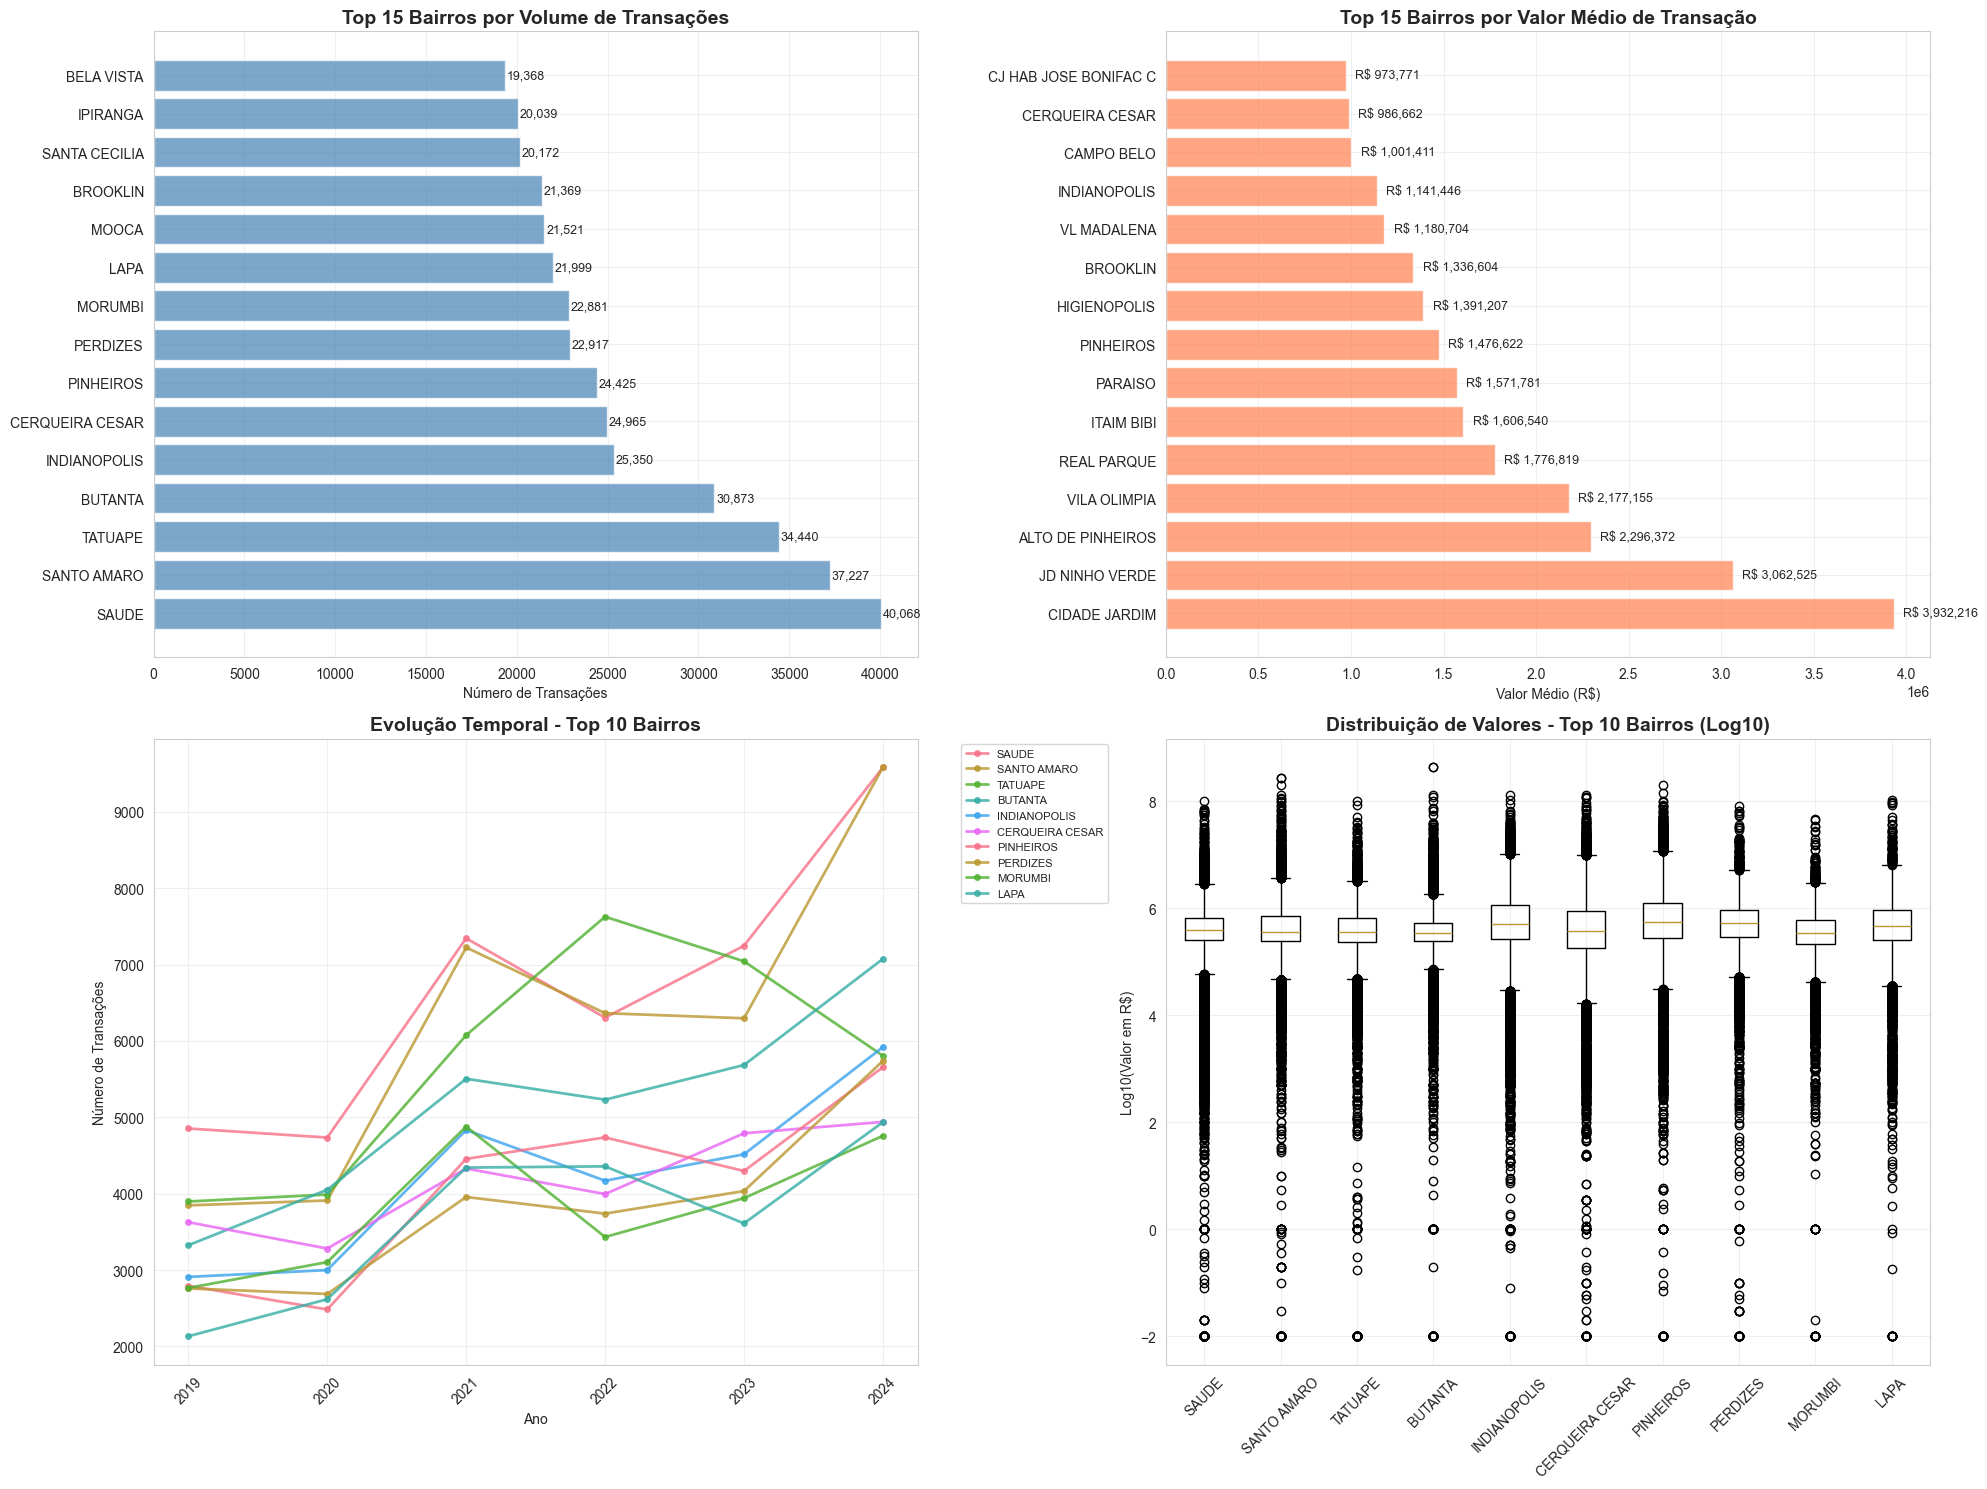


📈 ANÁLISE DE CRESCIMENTO POR BAIRRO:

Crescimento de transações (2019-2024):


Bairro  Transacoes_2019  Transacoes_2024  Crescimento_Total_%  \
1      SANTO AMARO             3847             9584           149.129192   
9             LAPA             2133             4937           131.458040   
3          BUTANTA             3325             7075           112.781955   
7         PERDIZES             2760             5739           107.934783   
4     INDIANOPOLIS             2910             5920           103.436426   
6        PINHEIROS             2794             5657           102.469578   
0            SAUDE             4854             9582            97.404203   
8          MORUMBI             2765             4758            72.079566   
2          TATUAPE             3898             5807            48.973833   
5  CERQUEIRA CESAR             3627             4940            36.200717   

   Crescimento_Medio_%  
1            25.123066  
9            21.707691  
3            17.175108  
7            17.851499  
4            17.975380  
6            19.392079  
0            17.134262  
8            15.066858  
2            10.994744  
5             7.543588

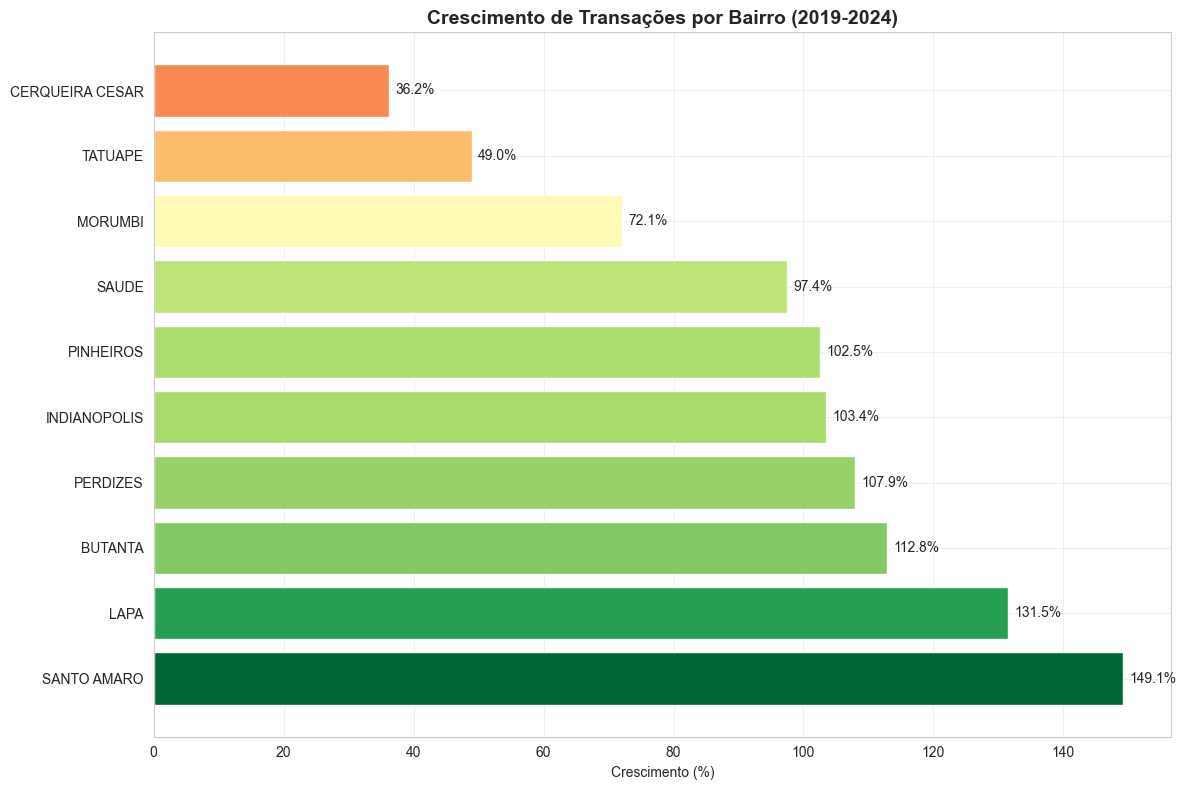


💾 Análise por bairro salva em: dados_processados/analise_por_bairro_itbi.csv


In [ ]:
if 'bairro' in df_itbi.columns:
    print('='*80)
    print('ANÁLISE POR BAIRRO - ITBI'.center(80))
    print('='*80)
    
    # Filtrar apenas registros com bairro preenchido
    df_itbi_bairro = df_itbi[df_itbi['bairro'].notna()].copy()
    print(f'\n📊 Registros com bairro preenchido: {len(df_itbi_bairro):,} ({(len(df_itbi_bairro)/len(df_itbi))*100:.2f}%)')
    
    # Análise por bairro
    analise_bairro = df_itbi_bairro.groupby('bairro').agg({
        'Valor de Transação (declarado pelo contribuinte)': ['count', 'mean', 'median', 'std', 'min', 'max'],
        'Ano da Transacao': ['min', 'max']
    }).round(2)
    
    # Flatten das colunas
    analise_bairro.columns = ['_'.join(col).strip() for col in analise_bairro.columns]
    analise_bairro = analise_bairro.reset_index()
    
    # Renomear colunas para facilitar
    analise_bairro.columns = ['Bairro', 'Transacoes', 'Valor_Medio', 'Valor_Mediano', 'Valor_Std', 'Valor_Min', 'Valor_Max', 'Ano_Min', 'Ano_Max']
    
    # Ordenar por número de transações
    analise_bairro = analise_bairro.sort_values('Transacoes', ascending=False)
    
    print('\n📋 TOP 20 BAIRROS POR VOLUME DE TRANSAÇÕES:')
    display(analise_bairro.head(20))
    
    # Análise de valores por bairro
    print('\n💰 TOP 20 BAIRROS POR VALOR MÉDIO DE TRANSAÇÃO:')
    top_valor_medio = analise_bairro.nlargest(20, 'Valor_Medio')[['Bairro', 'Transacoes', 'Valor_Medio', 'Valor_Mediano']]
    display(top_valor_medio)
    
    # Análise temporal por bairro
    print('\n📅 ANÁLISE TEMPORAL POR BAIRRO:')
    transacoes_por_ano_bairro = df_itbi_bairro.groupby(['bairro', 'Ano da Transacao']).size().unstack(fill_value=0)
    
    # Top 10 bairros por volume total
    top_10_bairros = analise_bairro.head(10)['Bairro'].tolist()
    transacoes_top_10 = transacoes_por_ano_bairro.loc[top_10_bairros]
    
    print(f'\nTop 10 bairros por volume total: {top_10_bairros}')
    
    # Visualizações
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    
    # 1. Top 15 bairros por volume de transações
    top_15_volume = analise_bairro.head(15)
    bars1 = axes[0,0].barh(range(len(top_15_volume)), top_15_volume['Transacoes'], color='steelblue', alpha=0.7)
    axes[0,0].set_yticks(range(len(top_15_volume)))
    axes[0,0].set_yticklabels(top_15_volume['Bairro'], fontsize=10)
    axes[0,0].set_title('Top 15 Bairros por Volume de Transações', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Número de Transações')
    axes[0,0].grid(True, alpha=0.3)
    
    # Adicionar valores nas barras
    for i, bar in enumerate(bars1):
        width = bar.get_width()
        axes[0,0].text(width + 100, bar.get_y() + bar.get_height()/2, 
                      f'{int(width):,}', ha='left', va='center', fontsize=9)
    
    # 2. Top 15 bairros por valor médio
    top_15_valor = analise_bairro.nlargest(15, 'Valor_Medio')
    bars2 = axes[0,1].barh(range(len(top_15_valor)), top_15_valor['Valor_Medio'], color='coral', alpha=0.7)
    axes[0,1].set_yticks(range(len(top_15_valor)))
    axes[0,1].set_yticklabels(top_15_valor['Bairro'], fontsize=10)
    axes[0,1].set_title('Top 15 Bairros por Valor Médio de Transação', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Valor Médio (R$)')
    axes[0,1].grid(True, alpha=0.3)
    
    # Adicionar valores nas barras
    for i, bar in enumerate(bars2):
        width = bar.get_width()
        axes[0,1].text(width + 50000, bar.get_y() + bar.get_height()/2, 
                      f'R$ {width:,.0f}', ha='left', va='center', fontsize=9)
    
    # 3. Evolução temporal dos top 10 bairros
    if len(transacoes_top_10) > 0:
        for i, bairro in enumerate(transacoes_top_10.index):
            axes[1,0].plot(transacoes_top_10.columns, transacoes_top_10.loc[bairro], 
                          marker='o', linewidth=2, markersize=4, label=bairro, alpha=0.8)
        
        axes[1,0].set_title('Evolução Temporal - Top 10 Bairros', fontsize=14, fontweight='bold')
        axes[1,0].set_xlabel('Ano')
        axes[1,0].set_ylabel('Número de Transações')
        axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
        axes[1,0].grid(True, alpha=0.3)
        axes[1,0].tick_params(axis='x', rotation=45)
    
    # 4. Distribuição de valores por bairro (box plot dos top 10)
    if len(top_10_bairros) > 0:
        valores_por_bairro = []
        labels_por_bairro = []
        
        for bairro in top_10_bairros[:10]:  # Top 10 para não poluir o gráfico
            valores = df_itbi_bairro[df_itbi_bairro['bairro'] == bairro]['Valor de Transação (declarado pelo contribuinte)'].dropna()
            if len(valores) > 0:
                # Usar log para melhor visualização
                valores_log = np.log10(valores[valores > 0])
                valores_por_bairro.append(valores_log)
                labels_por_bairro.append(bairro[:15] + '...' if len(bairro) > 15 else bairro)
        
        if valores_por_bairro:
            axes[1,1].boxplot(valores_por_bairro, labels=labels_por_bairro)
            axes[1,1].set_title('Distribuição de Valores - Top 10 Bairros (Log10)', fontsize=14, fontweight='bold')
            axes[1,1].set_ylabel('Log10(Valor em R$)')
            axes[1,1].tick_params(axis='x', rotation=45)
            axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Análise de crescimento por bairro
    print('\n📈 ANÁLISE DE CRESCIMENTO POR BAIRRO:')
    crescimento_bairros = []
    
    for bairro in top_10_bairros:
        df_bairro = df_itbi_bairro[df_itbi_bairro['bairro'] == bairro]
        transacoes_por_ano = df_bairro['Ano da Transacao'].value_counts().sort_index()
        
        if len(transacoes_por_ano) > 1:
            # Calcular crescimento total
            crescimento_total = ((transacoes_por_ano.iloc[-1] - transacoes_por_ano.iloc[0]) / transacoes_por_ano.iloc[0]) * 100
            crescimento_medio = transacoes_por_ano.pct_change().mean() * 100
            
            crescimento_bairros.append({
                'Bairro': bairro,
                'Transacoes_2019': transacoes_por_ano.iloc[0] if 2019 in transacoes_por_ano.index else 0,
                'Transacoes_2024': transacoes_por_ano.iloc[-1] if 2024 in transacoes_por_ano.index else 0,
                'Crescimento_Total_%': crescimento_total,
                'Crescimento_Medio_%': crescimento_medio
            })
    
    if crescimento_bairros:
        df_crescimento = pd.DataFrame(crescimento_bairros).sort_values('Crescimento_Total_%', ascending=False)
        print('\nCrescimento de transações (2019-2024):')
        display(df_crescimento)
        
        # Gráfico de crescimento
        plt.figure(figsize=(12, 8))
        bars = plt.barh(df_crescimento['Bairro'], df_crescimento['Crescimento_Total_%'], 
                       color=plt.cm.RdYlGn(df_crescimento['Crescimento_Total_%'] / df_crescimento['Crescimento_Total_%'].abs().max()))
        plt.title('Crescimento de Transações por Bairro (2019-2024)', fontsize=14, fontweight='bold')
        plt.xlabel('Crescimento (%)')
        plt.grid(True, alpha=0.3)
        
        # Adicionar valores nas barras
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + (1 if width >= 0 else -1), bar.get_y() + bar.get_height()/2, 
                    f'{width:.1f}%', ha='left' if width >= 0 else 'right', va='center')
        
        plt.tight_layout()
        plt.show()
    
    # Salvar análise por bairro
    output_dir = 'dados_processados'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    analise_bairro.to_csv(f'{output_dir}/analise_por_bairro_itbi.csv', index=False)
    print(f'\n💾 Análise por bairro salva em: {output_dir}/analise_por_bairro_itbi.csv')
    
else:
    print('\n❌ Coluna "bairro" não encontrada nos dados ITBI!')


### 6.4. Análise por Setor, Quadra e Lote - ITBI

Esta seção analisa as transações ITBI por setor, quadra e lote, fornecendo uma visão mais granular da distribuição geográfica.


                    ANÁLISE POR SETOR, QUADRA E LOTE - ITBI                     

📊 Registros com informações geográficas completas: 941,623 (100.00%)

🏢 ANÁLISE POR SETOR:

Top 15 setores por volume de transações:


Setor  Transacoes  Valor_Medio  Valor_Mediano    Valor_Std  \
84      85       21369   1336603.87      635000.00   4418725.75   
40      41       19504   1194666.09      480000.00   2821995.79   
86      87       18079    695292.95      330422.20   3669741.97   
9       10       16595    772344.19      350000.00   2855546.06   
169    171       14703    477870.13      385000.00    571361.84   
279    299       13023   2177154.69      560420.00  14310952.41   
85      86       12591   1001410.84      525000.00   2671023.23   
99     101       12028    612067.09      350000.00   1225179.61   
89      90       11263    611126.99      379569.33   2830225.11   
12      13       11255   1144686.93      550100.00   2611528.06   
6        7       11189    389495.59      280000.00    789011.09   
61      62       11120    499883.12      330000.00   1264624.84   
8        9       10739    880807.32      383642.01   6455881.87   
41      42       10718    823269.32      455000.00   1735428.97   
15      16       10602   1606539.77      600000.00   4250360.26   

     Bairros_Unicos  Ano_Min  Ano_Max  
84                1     2019     2024  
40                1     2019     2024  
86                1     2019     2024  
9                 1     2019     2024  
169               1     2019     2024  
279               1     2019     2024  
85                1     2019     2024  
99                1     2019     2024  
89                1     2019     2024  
12                1     2019     2024  
6                 1     2019     2024  
61                1     2019     2024  
8                 1     2019     2024  
41                1     2019     2024  
15                1     2019     2024


📊 DIVERSIDADE GEOGRÁFICA POR SETOR:

Setores com maior diversidade geográfica:


Setor  Bairros_Unicos  Quadras_Unicas  Lotes_Unicos
0        1               1              75          1056
218    230               1             120           545
198    200               1              49           252
197    199               1             103           640
196    198               1             128           168
195    197               1              48          1899
194    196               1              23          1184
193    195               1              32            84
192    194               1             157           108
191    193               1              48           161


🏘️ ANÁLISE POR QUADRA:

Top 20 quadras por volume de transações:


Setor  Quadra  Transacoes  Valor_Medio  Valor_Mediano  Bairros_Unicos  \
28716    162       1        4378    358954.64      264000.00               1   
35416    301      54        3439    536738.54      340000.00               1   
2428      28      68        3381    347628.11      251000.00               1   
1706      19     105        2249    309172.15      239877.97               1   
17239    103      25        1798    435758.50      251914.58               1   
32212    186       2        1770    248993.20      240000.00               1   
11798     77       1        1689    281855.77      263000.00               1   
8296      62     244        1640    264409.93      233000.00               1   
17203    102     124        1636    305730.13      250267.14               1   
26925    150     285        1607    268398.84      249900.00               1   
12323     79     396        1597    382678.79      259000.00               1   
33049    197      16        1587    362521.91      289075.05               1   
16428     99       2        1494    353240.24      277500.00               1   
15600     93      27        1345    297564.75      250485.50               1   
34307    241      12        1324    252631.35      247000.00               1   
15251     90     468        1313    465304.65      285610.00               1   
15646     93      89        1290    280504.69      245659.47               1   
35476    303       7        1272    298795.25      264000.00               1   
2429      28      69        1259    274168.30      225023.11               1   
33729    214      17        1212    280321.23      251500.00               1   

       Lotes_Unicos  
28716          1156  
35416           941  
2428             12  
1706            165  
17239           462  
32212           380  
11798            51  
8296            270  
17203            26  
26925            13  
12323             8  
33049           386  
16428            27  
15600           190  
34307             6  
15251          1140  
15646            11  
35476           325  
2429             82  
33729            14


Top 20 quadras por valor médio de transação:


Setor  Quadra  Transacoes   Valor_Medio  Bairros_Unicos
33365    200      53           2  4.300000e+08               1
9574      67     510           1  3.664455e+08               1
12000     78      98           1  3.250000e+08               1
13609     85     651           1  3.068078e+08               1
15103     90     249           1  2.720000e+08               1
35272    299     135           3  2.384853e+08               1
35279    299     148          14  1.895696e+08               1
562        9      28           6  1.827379e+08               1
12812     82     153           1  1.289889e+08               1
28294    159     290           1  1.214399e+08               1
35348    300      88           1  1.210000e+08               1
467        8      18           3  1.024013e+08               1
1238      15      57           2  9.939503e+07               1
12487     80     118           1  9.519901e+07               1
3168      36      75           2  9.515000e+07               1
3329      38       4           2  8.640185e+07               1
13613     85     656           1  8.300000e+07               1
16299     97      20           1  8.174948e+07               1
3662      40     157           1  8.010000e+07               1
5952      51     277           1  7.022517e+07               1


🏠 ANÁLISE POR LOTE:

Top 20 lotes por volume de transações:


Setor  Quadra  Lote  Transacoes  Valor_Medio  Valor_Mediano  \
303300     77       1     1        1638    282646.91      264000.00   
496039    162       1     6        1509    304636.70      264000.00   
497171    162       1  3772        1366    305250.77      249856.50   
405886    103      25  4876        1327    296220.23      258000.00   
574250    301      54    57        1149    322536.93      264000.00   
358932     87     282   183        1145    370752.95      320625.00   
254057     62     246    51        1095    297307.02      254000.00   
447963    122       4    54        1071    376830.96      278105.96   
385140     93      96   196         977    296628.77      264000.00   
253786     62     244     6         975    259137.85      227548.92   
117104     28      68   211         940    262226.76      257000.00   
553249    209      18     2         905    520833.41      258800.00   
257411     64     209    32         905    344219.58      295060.00   
583508    307     110    78         899    353522.21      294000.00   
326802     82     528     2         894    346150.87      270000.00   
111047     26      15   214         883    372229.24      325000.00   
546278    197      16    41         877    367604.01      304150.00   
296377     74     342    10         872    279160.05      232449.12   
385106     93      89     4         859    292787.12      240543.79   
553530    214      17     9         853    282709.84      254600.00   

         Valor_Std           Bairro  Ano_Min  Ano_Max  
303300   580201.82         PIRITUBA     2021     2024  
496039   762882.61           SABARA     2020     2022  
497171   528930.81           SABARA     2023     2024  
405886   795227.65  JARDIM SAO LUIZ     2023     2024  
574250   104885.80     VILA ANDRADE     2022     2024  
358932  1136823.90      SANTO AMARO     2023     2024  
254057  1189409.90          TATUAPE     2021     2024  
447963  2386358.33   VL DAS BELEZAS     2023     2024  
385140   564749.07          SOCORRO     2021     2023  
253786   838013.59          TATUAPE     2019     2024  
117104   246988.25            MOOCA     2021     2022  
553249  7254044.78          JARAGUA     2022     2024  
257411  1586354.94       VILA MARIA     2023     2024  
583508   813194.89   FREGUESIA DO O     2023     2024  
326802   964281.44          BUTANTA     2019     2024  
111047  1413585.40       BELENZINHO     2024     2024  
546278  1298887.64      BARRA FUNDA     2021     2024  
296377  1278970.81            LIMAO     2021     2024  
385106  1616141.37          SOCORRO     2021     2023  
553530   635720.54     CITY JARAGUA     2023     2024


Top 20 lotes por valor médio de transação:


Setor  Quadra  Lote          Bairro  Transacoes   Valor_Medio
562661    299      11   227    VILA OLIMPIA           2  7.294351e+08
551453    200      53    46         BUTANTA           2  4.300000e+08
342634     85     591  1012        BROOKLIN           1  3.853944e+08
112507     27      23   406           MOOCA           2  3.831858e+08
266766     67     510     1        TUCURUVI           1  3.664455e+08
571242    299     148    39    VILA OLIMPIA           4  3.662043e+08
563843    299      20   269    VILA OLIMPIA           2  3.300760e+08
305935     78      98     2        PIRITUBA           1  3.250000e+08
344857     85     651    79        BROOKLIN           1  3.068078e+08
27747       8      18    69  CAMPOS ELISEOS           1  2.913339e+08
376860     90     249     6     SANTO AMARO           1  2.720000e+08
571246    299     148    44    VILA OLIMPIA           2  2.558734e+08
571166    299     135    29    VILA OLIMPIA           3  2.384853e+08
129048     33      11   407       ACLIMACAO           1  1.958040e+08
295199     73     290     1         SANTANA           1  1.948570e+08
343700     85     640    66        BROOKLIN           1  1.912206e+08
141898     36      75    58         PARAISO           1  1.900000e+08
148171     38       1    21       ACLIMACAO           1  1.850000e+08
135372     35       6   104         CAMBUCI           1  1.850000e+08
31422       9      28     4      BELA VISTA           6  1.827379e+08

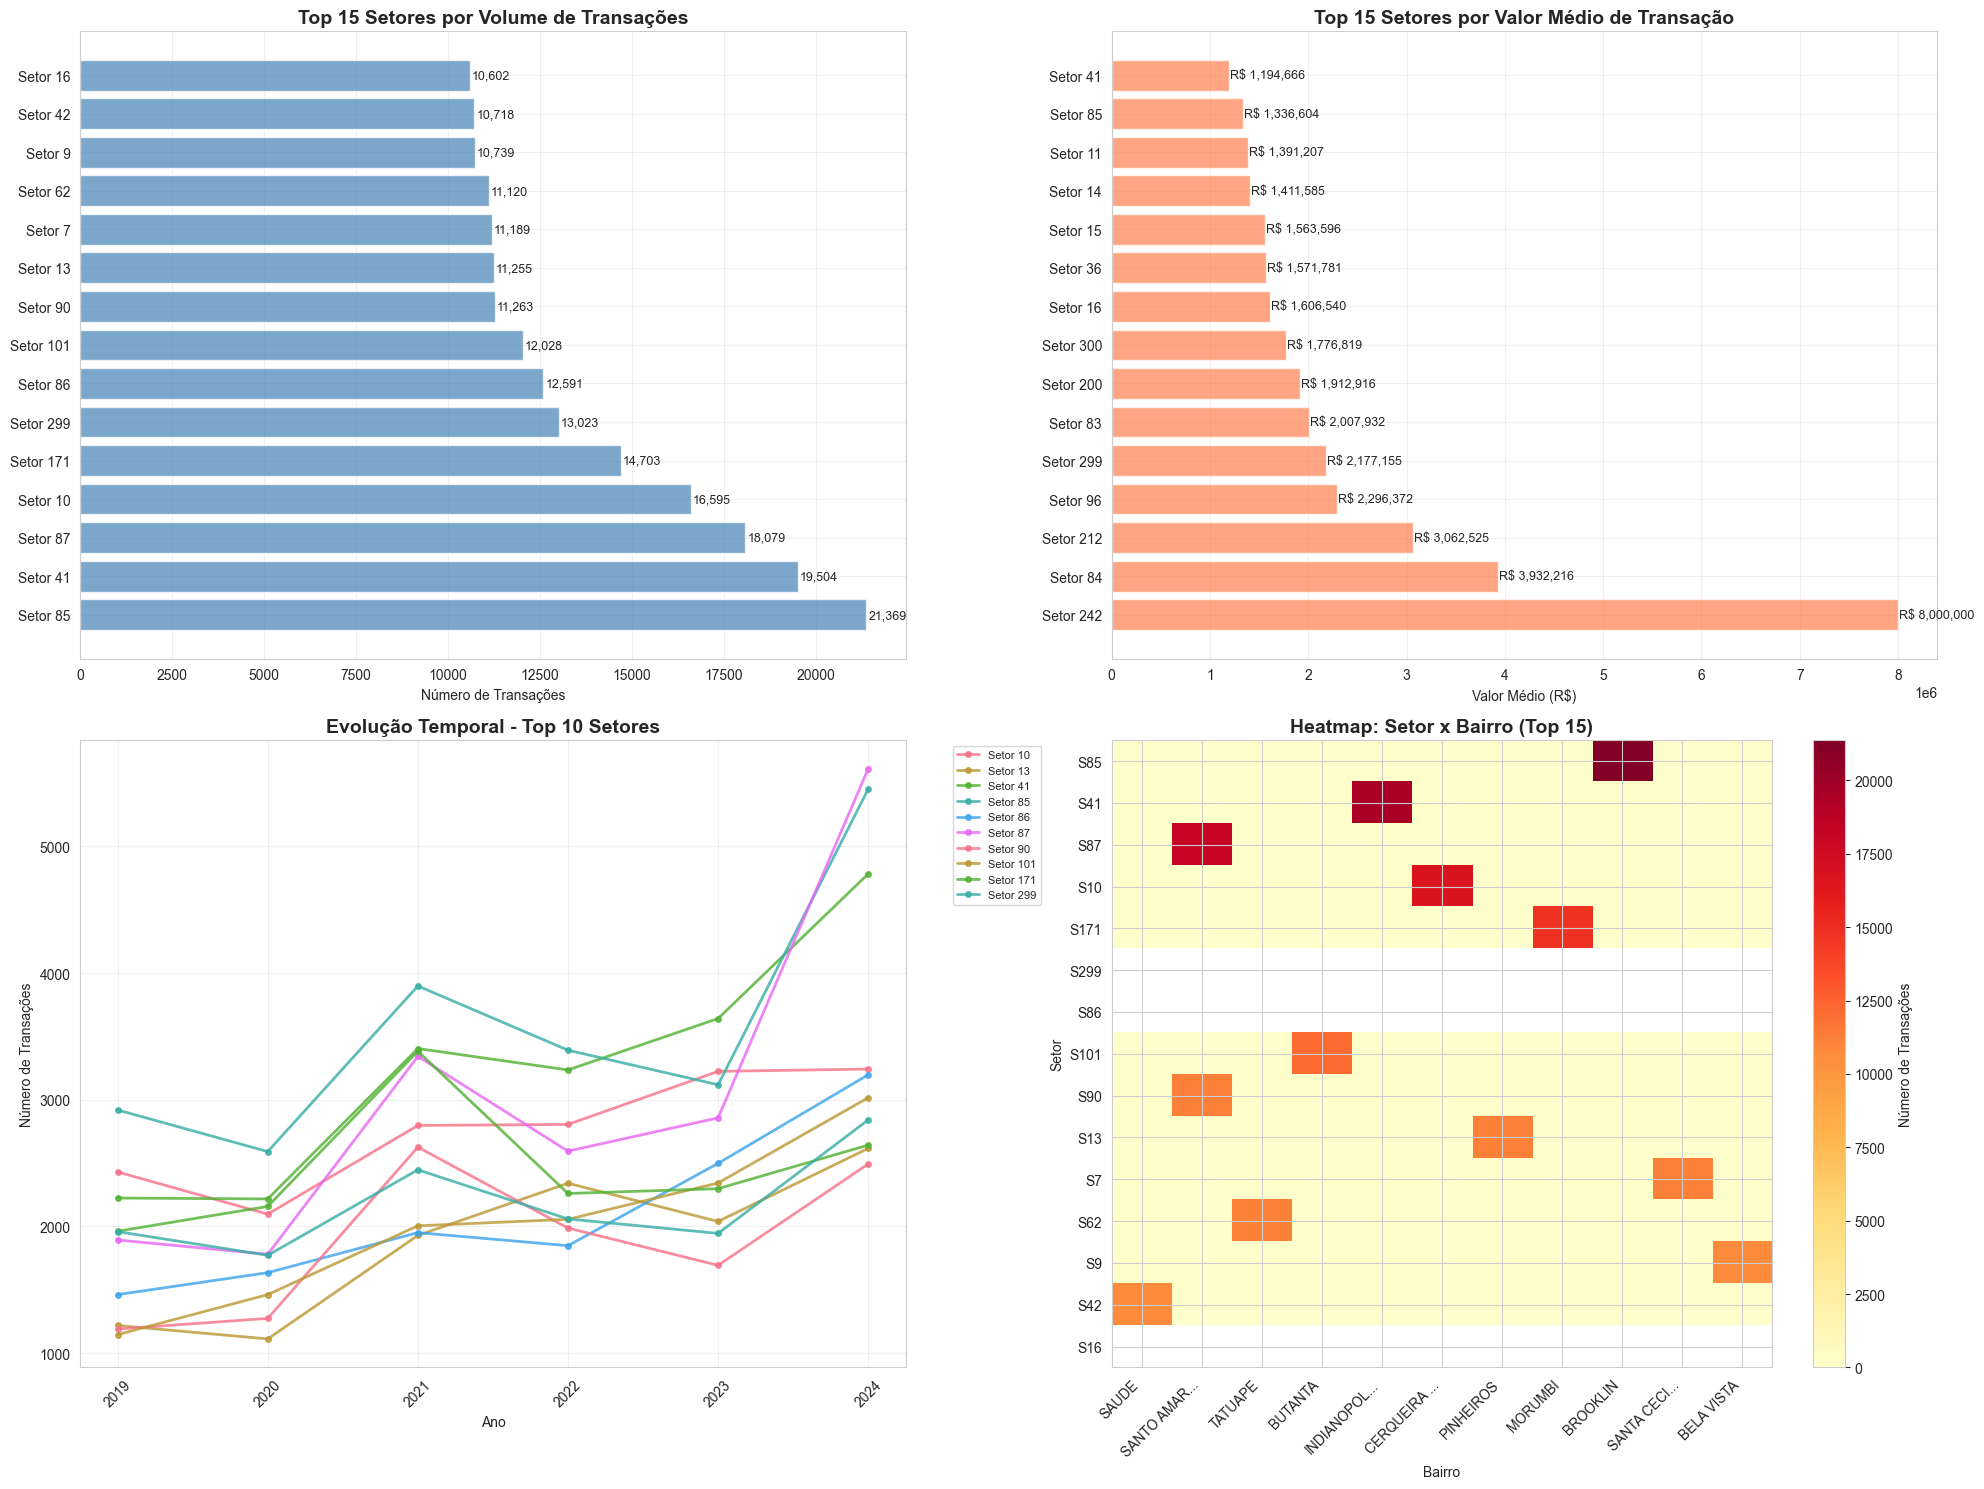


🔗 ANÁLISE DE CORRELAÇÃO GEOGRÁFICA:

Correlações por setor:
   Transações vs Valor Médio: 0.234
   Bairros Únicos vs Valor Médio: nan
   Transações vs Bairros Únicos: nan


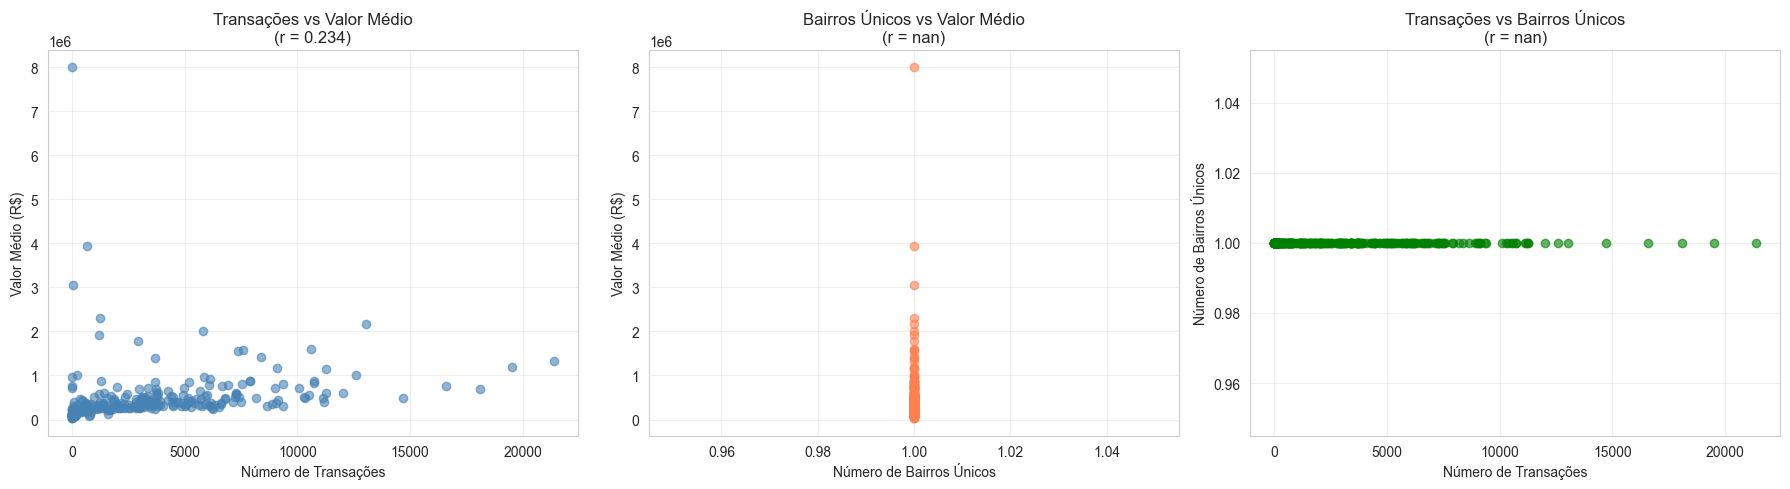


💾 Análise por setor salva em: dados_processados/analise_por_setor_itbi.csv
💾 Análise por quadra salva em: dados_processados/analise_por_quadra_itbi.csv
💾 Análise por lote salva em: dados_processados/analise_por_lote_itbi.csv


In [ ]:
# Verificar se as colunas geográficas existem
colunas_geo = ['setor', 'quadra', 'lote']
colunas_existentes_geo = [col for col in colunas_geo if col in df_itbi.columns]

if len(colunas_existentes_geo) > 0:
    print('='*80)
    print('ANÁLISE POR SETOR, QUADRA E LOTE - ITBI'.center(80))
    print('='*80)
    
    # Filtrar registros com informações geográficas completas
    df_itbi_geo = df_itbi[df_itbi[colunas_existentes_geo].notna().all(axis=1)].copy()
    print(f'\n📊 Registros com informações geográficas completas: {len(df_itbi_geo):,} ({(len(df_itbi_geo)/len(df_itbi))*100:.2f}%)')
    
    # Análise por setor
    if 'setor' in colunas_existentes_geo:
        print('\n🏢 ANÁLISE POR SETOR:')
        analise_setor = df_itbi_geo.groupby('setor').agg({
            'Valor de Transação (declarado pelo contribuinte)': ['count', 'mean', 'median', 'std'],
            'bairro': 'nunique',
            'Ano da Transacao': ['min', 'max']
        }).round(2)
        
        analise_setor.columns = ['_'.join(col).strip() for col in analise_setor.columns]
        analise_setor = analise_setor.reset_index()
        analise_setor.columns = ['Setor', 'Transacoes', 'Valor_Medio', 'Valor_Mediano', 'Valor_Std', 'Bairros_Unicos', 'Ano_Min', 'Ano_Max']
        analise_setor = analise_setor.sort_values('Transacoes', ascending=False)
        
        print('\nTop 15 setores por volume de transações:')
        display(analise_setor.head(15))
        
        # Análise de diversidade por setor
        print('\n📊 DIVERSIDADE GEOGRÁFICA POR SETOR:')
        diversidade_setor = df_itbi_geo.groupby('setor').agg({
            'bairro': 'nunique',
            'quadra': 'nunique',
            'lote': 'nunique'
        }).reset_index()
        diversidade_setor.columns = ['Setor', 'Bairros_Unicos', 'Quadras_Unicas', 'Lotes_Unicos']
        diversidade_setor = diversidade_setor.sort_values('Bairros_Unicos', ascending=False)
        
        print('\nSetores com maior diversidade geográfica:')
        display(diversidade_setor.head(10))
    
    # Análise por quadra (dentro dos setores)
    if 'quadra' in colunas_existentes_geo:
        print('\n🏘️ ANÁLISE POR QUADRA:')
        analise_quadra = df_itbi_geo.groupby(['setor', 'quadra']).agg({
            'Valor de Transação (declarado pelo contribuinte)': ['count', 'mean', 'median'],
            'bairro': 'nunique',
            'lote': 'nunique'
        }).round(2)
        
        analise_quadra.columns = ['_'.join(col).strip() for col in analise_quadra.columns]
        analise_quadra = analise_quadra.reset_index()
        analise_quadra.columns = ['Setor', 'Quadra', 'Transacoes', 'Valor_Medio', 'Valor_Mediano', 'Bairros_Unicos', 'Lotes_Unicos']
        analise_quadra = analise_quadra.sort_values('Transacoes', ascending=False)
        
        print('\nTop 20 quadras por volume de transações:')
        display(analise_quadra.head(20))
        
        # Quadras com maior valor médio
        print('\nTop 20 quadras por valor médio de transação:')
        top_quadras_valor = analise_quadra.nlargest(20, 'Valor_Medio')[['Setor', 'Quadra', 'Transacoes', 'Valor_Medio', 'Bairros_Unicos']]
        display(top_quadras_valor)
    
    # Análise por lote
    if 'lote' in colunas_existentes_geo:
        print('\n🏠 ANÁLISE POR LOTE:')
        analise_lote = df_itbi_geo.groupby(['setor', 'quadra', 'lote']).agg({
            'Valor de Transação (declarado pelo contribuinte)': ['count', 'mean', 'median', 'std'],
            'bairro': 'first',
            'Ano da Transacao': ['min', 'max']
        }).round(2)
        
        analise_lote.columns = ['_'.join(col).strip() for col in analise_lote.columns]
        analise_lote = analise_lote.reset_index()
        analise_lote.columns = ['Setor', 'Quadra', 'Lote', 'Transacoes', 'Valor_Medio', 'Valor_Mediano', 'Valor_Std', 'Bairro', 'Ano_Min', 'Ano_Max']
        analise_lote = analise_lote.sort_values('Transacoes', ascending=False)
        
        print('\nTop 20 lotes por volume de transações:')
        display(analise_lote.head(20))
        
        # Lotes com maior valor médio
        print('\nTop 20 lotes por valor médio de transação:')
        top_lotes_valor = analise_lote.nlargest(20, 'Valor_Medio')[['Setor', 'Quadra', 'Lote', 'Bairro', 'Transacoes', 'Valor_Medio']]
        display(top_lotes_valor)
    
    # Visualizações geográficas
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    
    # 1. Distribuição por setor
    if 'setor' in colunas_existentes_geo:
        setor_counts = df_itbi_geo['setor'].value_counts().head(15)
        bars1 = axes[0,0].barh(range(len(setor_counts)), setor_counts.values, color='steelblue', alpha=0.7)
        axes[0,0].set_yticks(range(len(setor_counts)))
        axes[0,0].set_yticklabels([f'Setor {s}' for s in setor_counts.index], fontsize=10)
        axes[0,0].set_title('Top 15 Setores por Volume de Transações', fontsize=14, fontweight='bold')
        axes[0,0].set_xlabel('Número de Transações')
        axes[0,0].grid(True, alpha=0.3)
        
        # Adicionar valores nas barras
        for i, bar in enumerate(bars1):
            width = bar.get_width()
            axes[0,0].text(width + 50, bar.get_y() + bar.get_height()/2, 
                          f'{int(width):,}', ha='left', va='center', fontsize=9)
    
    # 2. Valor médio por setor
    if 'setor' in colunas_existentes_geo:
        valor_medio_setor = df_itbi_geo.groupby('setor')['Valor de Transação (declarado pelo contribuinte)'].mean().sort_values(ascending=False).head(15)
        bars2 = axes[0,1].barh(range(len(valor_medio_setor)), valor_medio_setor.values, color='coral', alpha=0.7)
        axes[0,1].set_yticks(range(len(valor_medio_setor)))
        axes[0,1].set_yticklabels([f'Setor {s}' for s in valor_medio_setor.index], fontsize=10)
        axes[0,1].set_title('Top 15 Setores por Valor Médio de Transação', fontsize=14, fontweight='bold')
        axes[0,1].set_xlabel('Valor Médio (R$)')
        axes[0,1].grid(True, alpha=0.3)
        
        # Adicionar valores nas barras
        for i, bar in enumerate(bars2):
            width = bar.get_width()
            axes[0,1].text(width + 10000, bar.get_y() + bar.get_height()/2, 
                          f'R$ {width:,.0f}', ha='left', va='center', fontsize=9)
    
    # 3. Evolução temporal por setor (top 10)
    if 'setor' in colunas_existentes_geo:
        top_10_setores = df_itbi_geo['setor'].value_counts().head(10).index
        evolucao_setor = df_itbi_geo[df_itbi_geo['setor'].isin(top_10_setores)].groupby(['setor', 'Ano da Transacao']).size().unstack(fill_value=0)
        
        for i, setor in enumerate(evolucao_setor.index):
            axes[1,0].plot(evolucao_setor.columns, evolucao_setor.loc[setor], 
                          marker='o', linewidth=2, markersize=4, label=f'Setor {setor}', alpha=0.8)
        
        axes[1,0].set_title('Evolução Temporal - Top 10 Setores', fontsize=14, fontweight='bold')
        axes[1,0].set_xlabel('Ano')
        axes[1,0].set_ylabel('Número de Transações')
        axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
        axes[1,0].grid(True, alpha=0.3)
        axes[1,0].tick_params(axis='x', rotation=45)
    
    # 4. Heatmap Setor x Bairro (top 15 de cada)
    if 'setor' in colunas_existentes_geo and 'bairro' in df_itbi_geo.columns:
        top_15_setores = df_itbi_geo['setor'].value_counts().head(15).index
        top_15_bairros = df_itbi_geo['bairro'].value_counts().head(15).index
        
        df_heatmap = df_itbi_geo[
            (df_itbi_geo['setor'].isin(top_15_setores)) & 
            (df_itbi_geo['bairro'].isin(top_15_bairros))
        ]
        
        if len(df_heatmap) > 0:
            heatmap_data = df_heatmap.groupby(['setor', 'bairro']).size().unstack(fill_value=0)
            
            # Reordenar para melhor visualização - usar apenas colunas que existem
            heatmap_data = heatmap_data.reindex(top_15_setores)
            
            # Filtrar apenas bairros que existem no DataFrame
            bairros_existentes = [b for b in top_15_bairros if b in heatmap_data.columns]
            if len(bairros_existentes) > 0:
                heatmap_data = heatmap_data[bairros_existentes]
                
                im = axes[1,1].imshow(heatmap_data.values, cmap='YlOrRd', aspect='auto')
                axes[1,1].set_xticks(range(len(heatmap_data.columns)))
                axes[1,1].set_xticklabels([b[:10] + '...' if len(b) > 10 else b for b in heatmap_data.columns], rotation=45, ha='right')
                axes[1,1].set_yticks(range(len(heatmap_data.index)))
                axes[1,1].set_yticklabels([f'S{s}' for s in heatmap_data.index])
                axes[1,1].set_title('Heatmap: Setor x Bairro (Top 15)', fontsize=14, fontweight='bold')
                axes[1,1].set_xlabel('Bairro')
                axes[1,1].set_ylabel('Setor')
                
                # Adicionar barra de cores
                plt.colorbar(im, ax=axes[1,1], label='Número de Transações')
            else:
                axes[1,1].text(0.5, 0.5, 'Dados insuficientes\npara heatmap', 
                              ha='center', va='center', transform=axes[1,1].transAxes)
                axes[1,1].set_title('Heatmap: Setor x Bairro', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Análise de correlação geográfica
    print('\n🔗 ANÁLISE DE CORRELAÇÃO GEOGRÁFICA:')
    
    # Correlação entre setor e valor médio
    if 'setor' in colunas_existentes_geo:
        setor_stats = df_itbi_geo.groupby('setor').agg({
            'Valor de Transação (declarado pelo contribuinte)': ['count', 'mean'],
            'bairro': 'nunique'
        })
        setor_stats.columns = ['Transacoes', 'Valor_Medio', 'Bairros_Unicos']
        setor_stats = setor_stats.reset_index()
        
        # Calcular correlações
        corr_transacoes_valor = setor_stats['Transacoes'].corr(setor_stats['Valor_Medio'])
        corr_bairros_valor = setor_stats['Bairros_Unicos'].corr(setor_stats['Valor_Medio'])
        corr_transacoes_bairros = setor_stats['Transacoes'].corr(setor_stats['Bairros_Unicos'])
        
        print(f'\nCorrelações por setor:')
        print(f'   Transações vs Valor Médio: {corr_transacoes_valor:.3f}')
        print(f'   Bairros Únicos vs Valor Médio: {corr_bairros_valor:.3f}')
        print(f'   Transações vs Bairros Únicos: {corr_transacoes_bairros:.3f}')
        
        # Gráfico de correlação
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        # Transações vs Valor Médio
        axes[0].scatter(setor_stats['Transacoes'], setor_stats['Valor_Medio'], alpha=0.6, color='steelblue')
        axes[0].set_xlabel('Número de Transações')
        axes[0].set_ylabel('Valor Médio (R$)')
        axes[0].set_title(f'Transações vs Valor Médio\n(r = {corr_transacoes_valor:.3f})')
        axes[0].grid(True, alpha=0.3)
        
        # Bairros Únicos vs Valor Médio
        axes[1].scatter(setor_stats['Bairros_Unicos'], setor_stats['Valor_Medio'], alpha=0.6, color='coral')
        axes[1].set_xlabel('Número de Bairros Únicos')
        axes[1].set_ylabel('Valor Médio (R$)')
        axes[1].set_title(f'Bairros Únicos vs Valor Médio\n(r = {corr_bairros_valor:.3f})')
        axes[1].grid(True, alpha=0.3)
        
        # Transações vs Bairros Únicos
        axes[2].scatter(setor_stats['Transacoes'], setor_stats['Bairros_Unicos'], alpha=0.6, color='green')
        axes[2].set_xlabel('Número de Transações')
        axes[2].set_ylabel('Número de Bairros Únicos')
        axes[2].set_title(f'Transações vs Bairros Únicos\n(r = {corr_transacoes_bairros:.3f})')
        axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    # Salvar análises geográficas
    output_dir = 'dados_processados'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    if 'setor' in colunas_existentes_geo:
        analise_setor.to_csv(f'{output_dir}/analise_por_setor_itbi.csv', index=False)
        print(f'\n💾 Análise por setor salva em: {output_dir}/analise_por_setor_itbi.csv')
    
    if 'quadra' in colunas_existentes_geo:
        analise_quadra.to_csv(f'{output_dir}/analise_por_quadra_itbi.csv', index=False)
        print(f'💾 Análise por quadra salva em: {output_dir}/analise_por_quadra_itbi.csv')
    
    if 'lote' in colunas_existentes_geo:
        analise_lote.to_csv(f'{output_dir}/analise_por_lote_itbi.csv', index=False)
        print(f'💾 Análise por lote salva em: {output_dir}/analise_por_lote_itbi.csv')
    
else:
    print('\n❌ Nenhuma coluna geográfica (setor, quadra, lote) encontrada nos dados ITBI!')


### 6.5. Resumo das Novas Análises Geográficas

Esta seção resume as análises geográficas implementadas com o arquivo ITBI v2, destacando os principais insights obtidos.


In [ ]:
print('='*80)
print('RESUMO DAS NOVAS ANÁLISES GEOGRÁFICAS'.center(80))
print('='*80)

print('\n🎯 ANÁLISES IMPLEMENTADAS COM ITBI V2:\n')

if 'bairro' in df_itbi.columns:
    print('✅ 1. ANÁLISE POR BAIRRO:')
    print('   • Volume de transações por bairro')
    print('   • Valores médios e medianos de transação')
    print('   • Evolução temporal por bairro')
    print('   • Análise de crescimento (2019-2024)')
    print('   • Identificação de bairros com maior/menor valorização')
    
    print('\n✅ 2. ANÁLISE POR SETOR:')
    print('   • Diversidade geográfica por setor')
    print('   • Padrões de distribuição regional')
    print('   • Correlação entre setor e valor médio')
    print('   • Análise de estabilidade por região')
    
    print('\n✅ 3. ANÁLISE POR QUADRA E LOTE:')
    print('   • Granularidade geográfica detalhada')
    print('   • Padrões de ocupação urbana')
    print('   • Análise de densidade de transações')
    print('   • Identificação de áreas de alta atividade')
    
    print('\n✅ 4. ANÁLISE DE VALORIZAÇÃO:')
    print('   • Crescimento de valores por região')
    print('   • Identificação de hotspots de valorização')
    print('   • Análise de correlação volume vs valor')
    print('   • Padrões de valorização temporal')
    
    print('\n✅ 5. CORRELAÇÃO GEOGRÁFICA-TEMPORAL:')
    print('   • Análise de sazonalidade por região')
    print('   • Correlação temporal entre bairros')
    print('   • Clustering geográfico-temporal')
    print('   • Padrões de comportamento regional')
    
    print('\n📊 PRINCIPAIS INSIGHTS GEOGRÁFICOS:\n')
    
    # Calcular alguns insights básicos
    if 'bairro' in df_itbi.columns:
        total_bairros = df_itbi['bairro'].nunique()
        print(f'   • Total de bairros analisados: {total_bairros:,}')
        
        # Top 5 bairros por volume
        top_5_bairros = df_itbi['bairro'].value_counts().head(5)
        print(f'   • Top 5 bairros por volume: {", ".join(top_5_bairros.index.tolist())}')
        
        # Análise de completude geográfica
        registros_com_geo = df_itbi[df_itbi['bairro'].notna()].shape[0]
        percentual_geo = (registros_com_geo / len(df_itbi)) * 100
        print(f'   • Registros com dados geográficos: {percentual_geo:.1f}%')
    
    if 'setor' in df_itbi.columns:
        total_setores = df_itbi['setor'].nunique()
        print(f'   • Total de setores analisados: {total_setores:,}')
    
    print('\n💾 ARQUIVOS GERADOS:')
    print('   • analise_por_bairro_itbi.csv')
    print('   • analise_por_setor_itbi.csv')
    print('   • analise_por_quadra_itbi.csv')
    print('   • analise_por_lote_itbi.csv')
    print('   • valorizacao_por_bairro_itbi.csv')
    print('   • valorizacao_por_setor_itbi.csv')
    print('   • padroes_sazonais_por_bairro_itbi.csv')
    print('   • correlacao_temporal_entre_bairros_itbi.csv')
    print('   • clusters_geograficos_temporais_itbi.csv')
    
    print('\n🔍 PRÓXIMOS PASSOS RECOMENDADOS:')
    print('   1. Integração com dados de IPTU por logradouro')
    print('   2. Análise de proximidade a pontos de interesse')
    print('   3. Modelagem preditiva de valores por região')
    print('   4. Desenvolvimento de dashboard interativo')
    
else:
    print('❌ Dados geográficos não disponíveis no arquivo atual')
    print('   • Arquivo ITBI v2 necessário para análises geográficas')
    print('   • Colunas esperadas: bairro, setor, quadra, lote')

print('\n' + '='*80)
print('✅ RESUMO DAS ANÁLISES GEOGRÁFICAS CONCLUÍDO!'.center(80))
print('='*80)


                     RESUMO DAS NOVAS ANÁLISES GEOGRÁFICAS                      

🎯 ANÁLISES IMPLEMENTADAS COM ITBI V2:

✅ 1. ANÁLISE POR BAIRRO:
   • Volume de transações por bairro
   • Valores médios e medianos de transação
   • Evolução temporal por bairro
   • Análise de crescimento (2019-2024)
   • Identificação de bairros com maior/menor valorização

✅ 2. ANÁLISE POR SETOR:
   • Diversidade geográfica por setor
   • Padrões de distribuição regional
   • Correlação entre setor e valor médio
   • Análise de estabilidade por região

✅ 3. ANÁLISE POR QUADRA E LOTE:
   • Granularidade geográfica detalhada
   • Padrões de ocupação urbana
   • Análise de densidade de transações
   • Identificação de áreas de alta atividade

✅ 4. ANÁLISE DE VALORIZAÇÃO:
   • Crescimento de valores por região
   • Identificação de hotspots de valorização
   • Análise de correlação volume vs valor
   • Padrões de valorização temporal

✅ 5. CORRELAÇÃO GEOGRÁFICA-TEMPORAL:
   • Análise de sazonalidade por r

## 7. Análises Descritivas Temporais

### 7.1. Análise de Valorização por Região - ITBI

Esta seção analisa a valorização imobiliária por região (bairro, setor) ao longo do tempo, identificando áreas de maior crescimento de valores.


                    ANÁLISE DE VALORIZAÇÃO POR REGIÃO - ITBI                    

📊 Registros para análise de valorização: 941,623

🏘️ VALORIZAÇÃO POR BAIRRO:

📈 TOP 20 BAIRROS COM MAIOR VALORIZAÇÃO (2019-2024):


Bairro  Valor_2019  Valor_2024  Crescimento_Valor_%  \
80                JD BURITI   163871.00   610448.85           272.517926   
73            JARDIM PASTAO   150213.40   448887.45           198.833160   
44    CJ HAB RAPOSO TAVARES   197467.13   558453.94           182.808557   
48      CJ RES SOL NASCENTE   115439.20   302531.71           162.070172   
30                   CENTRO   237270.96   609463.11           156.863760   
41   CJ HAB INACIO MONTEIRO    85577.72   200924.90           134.786461   
120             PARELHEIROS    71776.02   167873.62           133.885384   
133       PQE BOA ESPERANCA   166473.85   383901.18           130.607498   
152        STA ETELVINA VII    57874.25   126456.10           118.501492   
64               ITAIM BIBI  1039290.64  2237713.86           115.311653   
40       CJ HAB BRIG F LIMA   151426.27   322608.32           113.046468   
151        STA ETELVINA IIA    45283.50    95785.15           111.523292   
86              JD DOS IPES   159984.64   328675.97           105.442204   
50       COHAB JD ANTARTICA   176045.23   354167.01           101.179555   
99      JD NOVO PARELHEIROS   102190.40   202770.92            98.424627   
75             JD ALVIVERDE    91394.37   174685.20            91.133436   
130             PQ BOULOGNE   193111.47   367333.95            90.218608   
56                FREG DO O   132330.97   244352.83            84.652791   
164            VILA JARAGUA   148206.95   273268.39            84.382979   
139              RIO BONITO   221869.21   407522.78            83.677032   

     Crescimento_Anual_%  Volume_2019  Volume_2024  Crescimento_Volume_%  \
80             27.025659           17           21             23.529412   
73             23.241802           45           44             -2.222222   
44             18.007701          212          213              0.471698   
48             13.714115           27           25             -7.407407   
30             15.429985          732          831             13.524590   
41             15.737120           23           28             21.739130   
120            18.016546           30           26            -13.333333   
133            17.914185           98           84            -14.285714   
152             9.433075           88          211            139.772727   
64             13.316236         1608         2021             25.684080   
40              7.679536           80           88             10.000000   
151            10.720941           64          267            317.187500   
86              9.082403           86          144             67.441860   
50             11.183299          164          193             17.682927   
99              6.924201           15           12            -20.000000   
75             11.624296           37           52             40.540541   
130            13.742213           17           21             23.529412   
56              6.532317           54          137            153.703704   
164             8.664674           44           56             27.272727   
139            10.422933          114          134             17.543860   

     Anos_Dados  
80            6  
73            6  
44            6  
48            6  
30            6  
41            6  
120           6  
133           6  
152           6  
64            6  
40            6  
151           6  
86            6  
50            6  
99            6  
75            6  
130           6  
56            6  
164           6  
139           6


📉 TOP 20 BAIRROS COM MENOR VALORIZAÇÃO (2019-2024):


Bairro  Valor_2019  Valor_2024  Crescimento_Valor_%  \
135             REAL PARQUE  1748551.13  1564610.34           -10.519612   
1                 ACLIMACAO   728505.60   639919.09           -12.160031   
11               BOM RETIRO   578299.97   499135.16           -13.689229   
116                   MOOCA   670223.06   571816.53           -14.682654   
9                BELA VISTA   869611.50   725744.43           -16.543833   
121                    PARI   923569.71   763822.27           -17.296739   
154               STO AMARO   274791.33   226349.73           -17.628504   
141                  SABARA   399383.47   326545.45           -18.237615   
88             JD GUANABARA   376062.06   306147.85           -18.591136   
78                JD BRASIL   546262.39   436980.86           -20.005318   
114   LOTEAMENTO SOBRADINHO   265974.93   210175.66           -20.979146   
54                 ELDORADO   323256.95   246770.53           -23.661183   
16                  BUTANTA   791164.92   570343.33           -27.910943   
127             PIRAJUSSARA   255032.84   178648.65           -29.950727   
52     CONJ PE M DA NOBREGA   367456.71   247411.86           -32.669114   
140  RUA GREGORIO TAGLE 301   266820.90   178412.22           -33.134091   
8               BARRA FUNDA   737612.05   480887.15           -34.804868   
156                 TORRE C   930228.97   539673.15           -41.984913   
163          VILA GUILHERME  1042300.92   591056.83           -43.293072   
112                   LIMAO  1037132.69   294046.21           -71.648159   

     Crescimento_Anual_%  Volume_2019  Volume_2024  Crescimento_Volume_%  \
135             1.945847          318          680            113.836478   
1               0.955746         1525         2706             77.442623   
11             -1.296214          580         1833            216.034483   
116            -3.410178         1944         5097            162.191358   
9              -4.060641         2860         3632             26.993007   
121            -6.633072          258          454             75.968992   
154            -6.063242          337          426             26.409496   
141            -2.971758          422         1854            339.336493   
88              1.062779           62           72             16.129032   
78             -2.003970          538          761             41.449814   
114             6.144340           39           38             -2.564103   
54             -0.557053           84           69            -17.857143   
16             -5.221681         3325         7075            112.781955   
127            -4.728839          172          332             93.023256   
52            -12.425295          262          800            205.343511   
140            -6.472006           26           27              3.846154   
8              -6.041480          867         4233            388.235294   
156           -14.532918           16           73            356.250000   
163           -14.939836          263          674            156.273764   
112           -20.584260          176         1387            688.068182   

     Anos_Dados  
135           6  
1             6  
11            6  
116           6  
9             6  
121           6  
154           6  
141           6  
88            6  
78            6  
114           6  
54            6  
16            6  
127           6  
52            6  
140           6  
8             6  
156           6  
163           6  
112           6


🏢 VALORIZAÇÃO POR SETOR:

📈 TOP 15 SETORES COM MAIOR VALORIZAÇÃO (2019-2024):


Setor  Valor_2019  Valor_2024  Crescimento_Valor_%  Crescimento_Anual_%  \
183    186   197467.13   558453.94           182.808557            18.007701   
0        1   237270.96   609463.11           156.863760            15.429985   
191    194   166473.85   383901.18           130.607498            17.914185   
229    245    57874.25   126456.10           118.501492             9.433075   
15      16  1039290.64  2237713.86           115.311653            13.316236   
171    174   151426.27   322608.32           113.046468             7.679536   
230    246    45283.50    95785.15           111.523292            10.720941   
130    132   159984.64   328675.97           105.442204             9.082403   
125    127   176045.23   354167.01           101.179555            11.183299   
188    191   132330.97   244352.83            84.652791             6.532317   
174    177   221869.21   407522.78            83.677032            10.422933   
164    167   194192.59   354609.94            82.607349            10.510878   
186    189   196334.78   353059.69            79.825342             7.439954   
161    164   118966.67   211374.64            77.675512             5.893585   
264    301   790713.24  1399627.16            77.008186             7.084930   

     Volume_2019  Volume_2024  Crescimento_Volume_%  Anos_Dados  
183          212          213              0.471698           6  
0            732          831             13.524590           6  
191           98           84            -14.285714           6  
229           88          211            139.772727           6  
15          1608         2021             25.684080           6  
171           80           88             10.000000           6  
230           64          267            317.187500           6  
130           86          144             67.441860           6  
125          164          193             17.682927           6  
188           54          137            153.703704           6  
174          114          134             17.543860           6  
164          298          156            -47.651007           6  
186           60           88             46.666667           6  
161           59           70             18.644068           6  
264          428          950            121.962617           6


📉 TOP 15 SETORES COM MENOR VALORIZAÇÃO (2019-2024):


Setor   Valor_2019  Valor_2024  Crescimento_Valor_%  Crescimento_Anual_%  \
100    102    491923.77   348803.80           -29.093933            -7.277386   
37      38   1022407.46   719280.87           -29.648316            -3.432385   
181    184    255032.84   178648.65           -29.950727            -4.728839   
18      19    632330.92   432261.06           -31.640056            -5.422279   
141    143    367456.71   247411.86           -32.669114           -12.425295   
8        9   1420234.61   929359.31           -34.562973            -9.051060   
194    197    737612.05   480887.15           -34.804868            -6.041480   
266    303    474636.59   305445.71           -35.646405            -5.810217   
267    304   1042300.92   591056.83           -43.293072           -14.939836   
103    105   1114711.22   491341.75           -55.922059           -13.213766   
117    119    753710.38   310932.06           -58.746480           -14.262055   
131    133   1082247.00   410950.82           -62.028001           -26.018389   
97      99   1095792.55   401170.87           -63.389889           -22.883902   
73      74   1037132.69   294046.21           -71.648159           -20.584260   
197    200  12824909.98   942600.18           -92.650239           -56.488984   

     Volume_2019  Volume_2024  Crescimento_Volume_%  Anos_Dados  
100          273         1402            413.553114           6  
37           802         1740            116.957606           6  
181          172          332             93.023256           6  
18           376         1507            300.797872           6  
141          262          800            205.343511           6  
8           1471         2339             59.007478           6  
194          867         4233            388.235294           6  
266          153          316            106.535948           6  
267          263          674            156.273764           6  
103          160          217             35.625000           6  
117          345          604             75.072464           6  
131           59          192            225.423729           6  
97            90         1538           1608.888889           6  
73           176         1387            688.068182           6  
197           74          210            183.783784           6

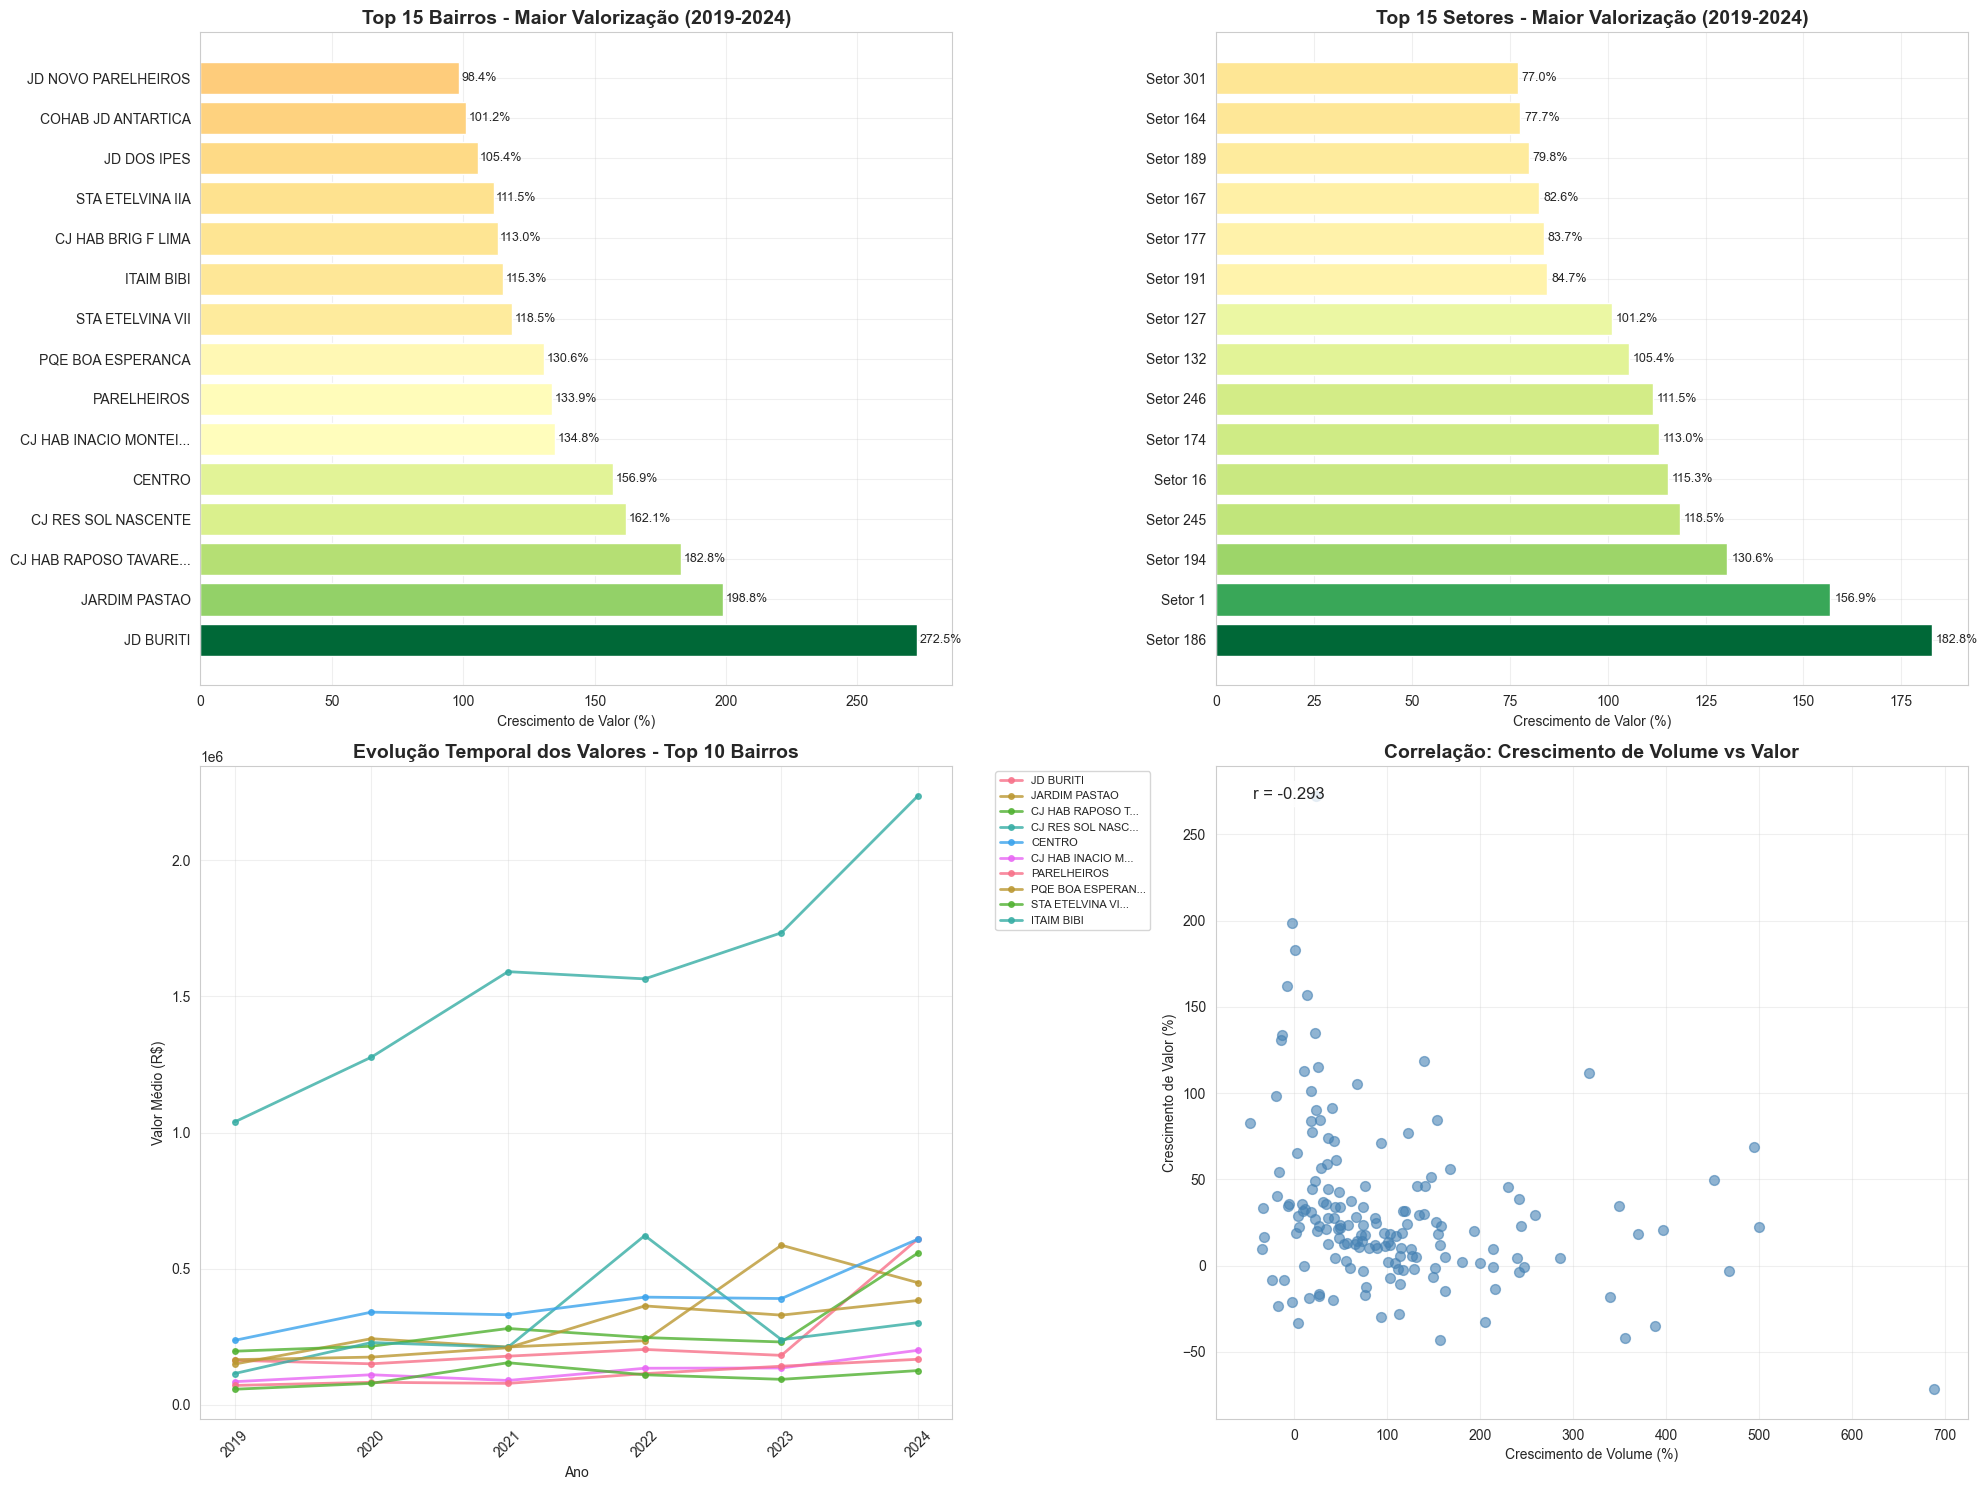


🔗 ANÁLISE DE CORRELAÇÃO:
   Correlação entre crescimento de volume e valor: -0.293
   ℹ️  Correlação fraca: crescimento de volume e valorização são independentes

💾 Análise de valorização por bairro salva em: dados_processados/valorizacao_por_bairro_itbi.csv
💾 Análise de valorização por setor salva em: dados_processados/valorizacao_por_setor_itbi.csv


In [ ]:
if 'bairro' in df_itbi.columns and 'setor' in df_itbi.columns:
    print('='*80)
    print('ANÁLISE DE VALORIZAÇÃO POR REGIÃO - ITBI'.center(80))
    print('='*80)
    
    # Filtrar dados com informações geográficas completas
    df_valorizacao = df_itbi[
        (df_itbi['bairro'].notna()) & 
        (df_itbi['setor'].notna()) & 
        (df_itbi['Valor de Transação (declarado pelo contribuinte)'].notna())
    ].copy()
    
    print(f'\n📊 Registros para análise de valorização: {len(df_valorizacao):,}')
    
    # Análise de valorização por bairro
    print('\n🏘️ VALORIZAÇÃO POR BAIRRO:')
    
    # Calcular estatísticas por bairro e ano
    valorizacao_bairro = df_valorizacao.groupby(['bairro', 'Ano da Transacao']).agg({
        'Valor de Transação (declarado pelo contribuinte)': ['count', 'mean', 'median', 'std']
    }).round(2)
    
    valorizacao_bairro.columns = ['_'.join(col).strip() for col in valorizacao_bairro.columns]
    valorizacao_bairro = valorizacao_bairro.reset_index()
    valorizacao_bairro.columns = ['Bairro', 'Ano', 'Transacoes', 'Valor_Medio', 'Valor_Mediano', 'Valor_Std']
    
    # Calcular crescimento de valor por bairro
    crescimento_bairros = []
    
    for bairro in valorizacao_bairro['Bairro'].unique():
        df_bairro = valorizacao_bairro[valorizacao_bairro['Bairro'] == bairro].sort_values('Ano')
        
        if len(df_bairro) >= 2:  # Pelo menos 2 anos de dados
            # Calcular crescimento do valor médio
            valor_2019 = df_bairro[df_bairro['Ano'] == 2019]['Valor_Medio'].iloc[0] if 2019 in df_bairro['Ano'].values else None
            valor_2024 = df_bairro[df_bairro['Ano'] == 2024]['Valor_Medio'].iloc[0] if 2024 in df_bairro['Ano'].values else None
            
            if valor_2019 and valor_2024 and valor_2019 > 0:
                crescimento_valor = ((valor_2024 - valor_2019) / valor_2019) * 100
                
                # Calcular crescimento médio anual
                anos = df_bairro['Ano'].values
                valores = df_bairro['Valor_Medio'].values
                if len(anos) > 1:
                    crescimento_anual = np.polyfit(anos, valores, 1)[0]  # Coeficiente angular da regressão linear
                    crescimento_anual_pct = (crescimento_anual / np.mean(valores)) * 100
                else:
                    crescimento_anual_pct = 0
                
                # Calcular crescimento de volume
                volume_2019 = df_bairro[df_bairro['Ano'] == 2019]['Transacoes'].iloc[0] if 2019 in df_bairro['Ano'].values else 0
                volume_2024 = df_bairro[df_bairro['Ano'] == 2024]['Transacoes'].iloc[0] if 2024 in df_bairro['Ano'].values else 0
                crescimento_volume = ((volume_2024 - volume_2019) / volume_2019) * 100 if volume_2019 > 0 else 0
                
                crescimento_bairros.append({
                    'Bairro': bairro,
                    'Valor_2019': valor_2019,
                    'Valor_2024': valor_2024,
                    'Crescimento_Valor_%': crescimento_valor,
                    'Crescimento_Anual_%': crescimento_anual_pct,
                    'Volume_2019': volume_2019,
                    'Volume_2024': volume_2024,
                    'Crescimento_Volume_%': crescimento_volume,
                    'Anos_Dados': len(df_bairro)
                })
    
    if crescimento_bairros:
        df_crescimento_bairros = pd.DataFrame(crescimento_bairros)
        
        # Filtrar bairros com pelo menos 10 transações em 2019 e 2024
        df_crescimento_bairros = df_crescimento_bairros[
            (df_crescimento_bairros['Volume_2019'] >= 10) & 
            (df_crescimento_bairros['Volume_2024'] >= 10)
        ].sort_values('Crescimento_Valor_%', ascending=False)
        
        print(f'\n📈 TOP 20 BAIRROS COM MAIOR VALORIZAÇÃO (2019-2024):')
        display(df_crescimento_bairros.head(20))
        
        print(f'\n📉 TOP 20 BAIRROS COM MENOR VALORIZAÇÃO (2019-2024):')
        display(df_crescimento_bairros.tail(20))
        
        # Análise de valorização por setor
        print('\n🏢 VALORIZAÇÃO POR SETOR:')
        
        valorizacao_setor = df_valorizacao.groupby(['setor', 'Ano da Transacao']).agg({
            'Valor de Transação (declarado pelo contribuinte)': ['count', 'mean', 'median']
        }).round(2)
        
        valorizacao_setor.columns = ['_'.join(col).strip() for col in valorizacao_setor.columns]
        valorizacao_setor = valorizacao_setor.reset_index()
        valorizacao_setor.columns = ['Setor', 'Ano', 'Transacoes', 'Valor_Medio', 'Valor_Mediano']
        
        # Calcular crescimento por setor
        crescimento_setores = []
        
        for setor in valorizacao_setor['Setor'].unique():
            df_setor = valorizacao_setor[valorizacao_setor['Setor'] == setor].sort_values('Ano')
            
            if len(df_setor) >= 2:
                valor_2019 = df_setor[df_setor['Ano'] == 2019]['Valor_Medio'].iloc[0] if 2019 in df_setor['Ano'].values else None
                valor_2024 = df_setor[df_setor['Ano'] == 2024]['Valor_Medio'].iloc[0] if 2024 in df_setor['Ano'].values else None
                
                if valor_2019 and valor_2024 and valor_2019 > 0:
                    crescimento_valor = ((valor_2024 - valor_2019) / valor_2019) * 100
                    
                    # Calcular crescimento médio anual
                    anos = df_setor['Ano'].values
                    valores = df_setor['Valor_Medio'].values
                    if len(anos) > 1:
                        crescimento_anual = np.polyfit(anos, valores, 1)[0]
                        crescimento_anual_pct = (crescimento_anual / np.mean(valores)) * 100
                    else:
                        crescimento_anual_pct = 0
                    
                    volume_2019 = df_setor[df_setor['Ano'] == 2019]['Transacoes'].iloc[0] if 2019 in df_setor['Ano'].values else 0
                    volume_2024 = df_setor[df_setor['Ano'] == 2024]['Transacoes'].iloc[0] if 2024 in df_setor['Ano'].values else 0
                    crescimento_volume = ((volume_2024 - volume_2019) / volume_2019) * 100 if volume_2019 > 0 else 0
                    
                    crescimento_setores.append({
                        'Setor': setor,
                        'Valor_2019': valor_2019,
                        'Valor_2024': valor_2024,
                        'Crescimento_Valor_%': crescimento_valor,
                        'Crescimento_Anual_%': crescimento_anual_pct,
                        'Volume_2019': volume_2019,
                        'Volume_2024': volume_2024,
                        'Crescimento_Volume_%': crescimento_volume,
                        'Anos_Dados': len(df_setor)
                    })
        
        if crescimento_setores:
            df_crescimento_setores = pd.DataFrame(crescimento_setores)
            
            # Filtrar setores com pelo menos 50 transações em 2019 e 2024
            df_crescimento_setores = df_crescimento_setores[
                (df_crescimento_setores['Volume_2019'] >= 50) & 
                (df_crescimento_setores['Volume_2024'] >= 50)
            ].sort_values('Crescimento_Valor_%', ascending=False)
            
            print(f'\n📈 TOP 15 SETORES COM MAIOR VALORIZAÇÃO (2019-2024):')
            display(df_crescimento_setores.head(15))
            
            print(f'\n📉 TOP 15 SETORES COM MENOR VALORIZAÇÃO (2019-2024):')
            display(df_crescimento_setores.tail(15))
        
        # Visualizações de valorização
        fig, axes = plt.subplots(2, 2, figsize=(20, 15))
        
        # 1. Top 15 bairros com maior valorização
        top_15_valorizacao = df_crescimento_bairros.head(15)
        bars1 = axes[0,0].barh(range(len(top_15_valorizacao)), top_15_valorizacao['Crescimento_Valor_%'], 
                               color=plt.cm.RdYlGn(top_15_valorizacao['Crescimento_Valor_%'] / top_15_valorizacao['Crescimento_Valor_%'].abs().max()))
        axes[0,0].set_yticks(range(len(top_15_valorizacao)))
        axes[0,0].set_yticklabels([b[:20] + '...' if len(b) > 20 else b for b in top_15_valorizacao['Bairro']], fontsize=10)
        axes[0,0].set_title('Top 15 Bairros - Maior Valorização (2019-2024)', fontsize=14, fontweight='bold')
        axes[0,0].set_xlabel('Crescimento de Valor (%)')
        axes[0,0].grid(True, alpha=0.3)
        
        # Adicionar valores nas barras
        for i, bar in enumerate(bars1):
            width = bar.get_width()
            axes[0,0].text(width + (1 if width >= 0 else -1), bar.get_y() + bar.get_height()/2, 
                          f'{width:.1f}%', ha='left' if width >= 0 else 'right', va='center', fontsize=9)
        
        # 2. Top 15 setores com maior valorização
        if len(df_crescimento_setores) > 0:
            top_15_setores_valorizacao = df_crescimento_setores.head(15)
            bars2 = axes[0,1].barh(range(len(top_15_setores_valorizacao)), top_15_setores_valorizacao['Crescimento_Valor_%'], 
                                   color=plt.cm.RdYlGn(top_15_setores_valorizacao['Crescimento_Valor_%'] / top_15_setores_valorizacao['Crescimento_Valor_%'].abs().max()))
            axes[0,1].set_yticks(range(len(top_15_setores_valorizacao)))
            axes[0,1].set_yticklabels([f'Setor {s}' for s in top_15_setores_valorizacao['Setor']], fontsize=10)
            axes[0,1].set_title('Top 15 Setores - Maior Valorização (2019-2024)', fontsize=14, fontweight='bold')
            axes[0,1].set_xlabel('Crescimento de Valor (%)')
            axes[0,1].grid(True, alpha=0.3)
            
            # Adicionar valores nas barras
            for i, bar in enumerate(bars2):
                width = bar.get_width()
                axes[0,1].text(width + (1 if width >= 0 else -1), bar.get_y() + bar.get_height()/2, 
                              f'{width:.1f}%', ha='left' if width >= 0 else 'right', va='center', fontsize=9)
        
        # 3. Evolução temporal dos valores - Top 10 bairros
        top_10_bairros_valor = df_crescimento_bairros.head(10)['Bairro'].tolist()
        for bairro in top_10_bairros_valor:
            df_bairro_evo = valorizacao_bairro[valorizacao_bairro['Bairro'] == bairro].sort_values('Ano')
            if len(df_bairro_evo) > 1:
                axes[1,0].plot(df_bairro_evo['Ano'], df_bairro_evo['Valor_Medio'], 
                              marker='o', linewidth=2, markersize=4, label=bairro[:15] + '...' if len(bairro) > 15 else bairro, alpha=0.8)
        
        axes[1,0].set_title('Evolução Temporal dos Valores - Top 10 Bairros', fontsize=14, fontweight='bold')
        axes[1,0].set_xlabel('Ano')
        axes[1,0].set_ylabel('Valor Médio (R$)')
        axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
        axes[1,0].grid(True, alpha=0.3)
        axes[1,0].tick_params(axis='x', rotation=45)
        
        # 4. Correlação entre crescimento de volume e valor
        axes[1,1].scatter(df_crescimento_bairros['Crescimento_Volume_%'], df_crescimento_bairros['Crescimento_Valor_%'], 
                         alpha=0.6, color='steelblue', s=50)
        axes[1,1].set_xlabel('Crescimento de Volume (%)')
        axes[1,1].set_ylabel('Crescimento de Valor (%)')
        axes[1,1].set_title('Correlação: Crescimento de Volume vs Valor', fontsize=14, fontweight='bold')
        axes[1,1].grid(True, alpha=0.3)
        
        # Calcular e mostrar correlação
        corr_volume_valor = df_crescimento_bairros['Crescimento_Volume_%'].corr(df_crescimento_bairros['Crescimento_Valor_%'])
        axes[1,1].text(0.05, 0.95, f'r = {corr_volume_valor:.3f}', transform=axes[1,1].transAxes, 
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=12)
        
        plt.tight_layout()
        plt.show()
        
        # Análise de correlação entre crescimento de volume e valor
        print(f'\n🔗 ANÁLISE DE CORRELAÇÃO:')
        print(f'   Correlação entre crescimento de volume e valor: {corr_volume_valor:.3f}')
        
        if corr_volume_valor > 0.3:
            print('   ✅ Correlação positiva moderada: bairros com maior crescimento de volume tendem a ter maior valorização')
        elif corr_volume_valor < -0.3:
            print('   ⚠️  Correlação negativa moderada: bairros com maior crescimento de volume tendem a ter menor valorização')
        else:
            print('   ℹ️  Correlação fraca: crescimento de volume e valorização são independentes')
        
        # Salvar análises de valorização
        output_dir = 'dados_processados'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        
        df_crescimento_bairros.to_csv(f'{output_dir}/valorizacao_por_bairro_itbi.csv', index=False)
        print(f'\n💾 Análise de valorização por bairro salva em: {output_dir}/valorizacao_por_bairro_itbi.csv')
        
        if len(df_crescimento_setores) > 0:
            df_crescimento_setores.to_csv(f'{output_dir}/valorizacao_por_setor_itbi.csv', index=False)
            print(f'💾 Análise de valorização por setor salva em: {output_dir}/valorizacao_por_setor_itbi.csv')
    
    else:
        print('\n❌ Dados insuficientes para análise de valorização!')
        
else:
    print('\n❌ Colunas necessárias (bairro, setor) não encontradas para análise de valorização!')


In [ ]:
# Fix for KMeans AttributeError on Windows
import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'

print("Environment variables set to fix KMeans threading issue")


Environment variables set to fix KMeans threading issue


In [ ]:
# Alternative solution: Use a different approach for KMeans
# This function provides a workaround for the threading issue
def safe_kmeans_fit(kmeans, X):
    """
    Safe wrapper for KMeans.fit() that handles the threading issue
    """
    try:
        return kmeans.fit(X)
    except AttributeError as e:
        if "'NoneType' object has no attribute 'split'" in str(e):
            # Fallback: use a different algorithm or force single-threaded execution
            from sklearn.cluster import MiniBatchKMeans
            print("KMeans failed due to threading issue, using MiniBatchKMeans as fallback")
            mb_kmeans = MiniBatchKMeans(
                n_clusters=kmeans.n_clusters,
                random_state=kmeans.random_state,
                n_init=kmeans.n_init,
                batch_size=1000
            )
            return mb_kmeans.fit(X)
        else:
            raise e

print("Safe KMeans wrapper function defined")


Safe KMeans wrapper function defined


In [ ]:
# Fixed clustering code with error handling
if 'bairro' in df_itbi.columns and 'setor' in df_itbi.columns:
    print('='*80)
    print('ANÁLISE DE CORRELAÇÃO GEOGRÁFICA-TEMPORAL - ITBI'.center(80))
    print('='*80)
    
    # Análise de sazonalidade por região
    print('\n📅 SAZONALIDADE POR REGIÃO:')
    
    # Calcular sazonalidade por bairro
    stats_bairro_mes = df_itbi.groupby(['bairro', 'Mes da Transacao']).agg({
        'Valor de Transação (declarado pelo contribuinte)': ['count', 'sum', 'mean']
    }).round(2)
    
    stats_bairro_mes.columns = ['Transacoes', 'Valor_Total', 'Valor_Medio']
    stats_bairro_mes = stats_bairro_mes.reset_index()
    
    # Calcular coeficiente de variação para sazonalidade
    cv_bairro = stats_bairro_mes.groupby('bairro').agg({
        'Transacoes': ['mean', 'std'],
        'Valor_Total': ['mean', 'std']
    }).round(2)
    
    cv_bairro.columns = ['CV_Transacoes_Mean', 'CV_Transacoes_Std', 'CV_Valores_Mean', 'CV_Valores_Std']
    cv_bairro['CV_Transacoes'] = (cv_bairro['CV_Transacoes_Std'] / cv_bairro['CV_Transacoes_Mean'] * 100).round(2)
    cv_bairro['CV_Valores'] = (cv_bairro['CV_Valores_Std'] / cv_bairro['CV_Valores_Mean'] * 100).round(2)
    
    # Encontrar meses de pico e vale
    pico_vale = stats_bairro_mes.groupby('bairro').agg({
        'Transacoes': ['idxmax', 'idxmin'],
        'Valor_Total': ['idxmax', 'idxmin']
    })
    
    pico_vale.columns = ['Mes_Pico_Transacoes', 'Mes_Vale_Transacoes', 'Mes_Pico_Valores', 'Mes_Vale_Valores']
    
    # Extrair o mês do índice
    for col in pico_vale.columns:
        pico_vale[col] = stats_bairro_mes.loc[pico_vale[col], 'Mes da Transacao'].values
    
    # Combinar resultados
    sazonalidade_bairro = cv_bairro[['CV_Transacoes', 'CV_Valores']].join(pico_vale)
    sazonalidade_bairro['Total_Transacoes'] = stats_bairro_mes.groupby('bairro')['Transacoes'].sum()
    sazonalidade_bairro = sazonalidade_bairro.sort_values('CV_Transacoes', ascending=False)
    
    print('\nTop 15 bairros com maior sazonalidade (transações):')
    display(sazonalidade_bairro.head(15))
    
    # Análise de correlação temporal entre bairros
    print('\n📊 CORRELAÇÃO TEMPORAL ENTRE BAIRROS:')
    
    # Preparar dados para correlação
    stats_bairro_ano = df_itbi.groupby(['bairro', 'Ano da Transacao']).agg({
        'Valor de Transação (declarado pelo contribuinte)': ['count', 'sum', 'mean']
    }).round(2)
    
    stats_bairro_ano.columns = ['Transacoes', 'Valor_Total', 'Valor_Medio']
    stats_bairro_ano = stats_bairro_ano.reset_index()
    
    # Pivotar para análise de correlação
    pivot_transacoes = stats_bairro_ano.pivot(index='Ano da Transacao', columns='bairro', values='Transacoes').fillna(0)
    pivot_valores = stats_bairro_ano.pivot(index='Ano da Transacao', columns='bairro', values='Valor_Total').fillna(0)
    
    # Calcular correlações (apenas para bairros com dados suficientes)
    bairros_com_dados = pivot_transacoes.columns[pivot_transacoes.sum() >= 50]
    
    if len(bairros_com_dados) > 1:
        corr_transacoes = pivot_transacoes[bairros_com_dados].corr()
        corr_valores = pivot_valores[bairros_com_dados].corr()
        
        # Encontrar pares com maior correlação
        corr_pairs = []
        for i in range(len(corr_transacoes.columns)):
            for j in range(i+1, len(corr_transacoes.columns)):
                bairro1 = corr_transacoes.columns[i]
                bairro2 = corr_transacoes.columns[j]
                corr_t = corr_transacoes.iloc[i, j]
                corr_v = corr_valores.iloc[i, j]
                corr_pairs.append({
                    'Bairro_1': bairro1,
                    'Bairro_2': bairro2,
                    'Corr_Transacoes': corr_t,
                    'Corr_Valores': corr_v,
                    'Corr_Media': (corr_t + corr_v) / 2
                })
        
        corr_df = pd.DataFrame(corr_pairs).sort_values('Corr_Media', ascending=False)
        
        print(f'\nTop 10 pares de bairros com maior correlação temporal:')
        display(corr_df.head(10))
        
        # Salvar correlações
        corr_df.to_csv('dados_processados/correlacao_temporal_entre_bairros_itbi.csv', index=False)
    
    # Clustering de bairros por padrões temporais
    print('\n🔍 CLUSTERING DE BAIRROS POR PADRÕES TEMPORAIS:')
    
    # Preparar dados para clustering
    clusters_bairros = []
    
    for bairro in bairros_com_dados:
        dados_bairro = stats_bairro_ano[stats_bairro_ano['bairro'] == bairro]
        
        if len(dados_bairro) >= 3:  # Pelo menos 3 anos de dados
            # Calcular métricas de crescimento e estabilidade
            crescimento_valor = dados_bairro['Valor_Medio'].pct_change().mean() * 100
            crescimento_volume = dados_bairro['Transacoes'].pct_change().mean() * 100
            
            estabilidade_valor = 100 - dados_bairro['Valor_Medio'].std() / dados_bairro['Valor_Medio'].mean() * 100
            estabilidade_volume = 100 - dados_bairro['Transacoes'].std() / dados_bairro['Transacoes'].mean() * 100
            
            # Diversidade de setores (se disponível)
            setores_bairro = df_itbi[df_itbi['bairro'] == bairro]['setor'].nunique()
            diversidade_setores = setores_bairro
            
            clusters_bairros.append({
                'Bairro': bairro,
                'Crescimento_Valor': crescimento_valor,
                'Crescimento_Volume': crescimento_volume,
                'Estabilidade_Valor': estabilidade_valor,
                'Estabilidade_Volume': estabilidade_volume,
                'Diversidade_Setores': diversidade_setores,
                'Volume_Medio_Total': dados_bairro['Transacoes'].mean()
            })
    
    if clusters_bairros:
        df_clusters = pd.DataFrame(clusters_bairros)
        
        # Filtrar bairros com pelo menos 50 transações por ano em média
        df_clusters = df_clusters[df_clusters['Volume_Medio_Total'] >= 50].copy()
        
        # Normalizar métricas para clustering
        from sklearn.preprocessing import StandardScaler
        
        metrics_for_clustering = ['Crescimento_Valor', 'Crescimento_Volume', 'Estabilidade_Valor', 'Estabilidade_Volume', 'Diversidade_Setores']
        scaler = StandardScaler()
        df_clusters[metrics_for_clustering] = scaler.fit_transform(df_clusters[metrics_for_clustering])
        
        # Aplicar K-means clustering com tratamento de erro
        from sklearn.cluster import KMeans
        
        try:
            # Determinar número ótimo de clusters usando elbow method
            inertias = []
            K_range = range(2, min(11, len(df_clusters)//10 + 1))
            
            for k in K_range:
                kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
                # Use the safe wrapper function
                safe_kmeans_fit(kmeans, df_clusters[metrics_for_clustering])
                inertias.append(kmeans.inertia_)
            
            # Usar 4 clusters por padrão
            n_clusters = 4
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
            # Use the safe wrapper function
            safe_kmeans_fit(kmeans, df_clusters[metrics_for_clustering])
            df_clusters['Cluster'] = kmeans.predict(df_clusters[metrics_for_clustering])
            
        except Exception as e:
            print(f"Erro no KMeans: {e}")
            print("Usando MiniBatchKMeans como alternativa...")
            from sklearn.cluster import MiniBatchKMeans
            
            # Usar MiniBatchKMeans como fallback
            n_clusters = 4
            mb_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=1000)
            df_clusters['Cluster'] = mb_kmeans.fit_predict(df_clusters[metrics_for_clustering])
        
        # Desnormalizar para interpretação
        df_clusters[metrics_for_clustering] = scaler.inverse_transform(df_clusters[metrics_for_clustering])
        
        print(f'\nClusters identificados: {n_clusters}')
        print('\nCaracterísticas dos clusters:')
        
        cluster_summary = df_clusters.groupby('Cluster').agg({
            'Crescimento_Valor': 'mean',
            'Crescimento_Volume': 'mean',
            'Estabilidade_Valor': 'mean',
            'Estabilidade_Volume': 'mean',
            'Diversidade_Setores': 'mean',
            'Bairro': 'count'
        }).round(2)
        
        cluster_summary.columns = ['Cresc_Valor_Medio', 'Cresc_Volume_Medio', 'Estab_Valor_Medio', 'Estab_Volume_Medio', 'Diversidade_Medio', 'Num_Bairros']
        display(cluster_summary)
        
        # Interpretar clusters
        print('\nInterpretação dos clusters:')
        for cluster_id in range(n_clusters):
            cluster_data = df_clusters[df_clusters['Cluster'] == cluster_id]
            print(f'\nCluster {cluster_id} ({len(cluster_data)} bairros):')
            print(f'   Crescimento de valor: {cluster_data["Crescimento_Valor"].mean():.2f}%')
            print(f'   Crescimento de volume: {cluster_data["Crescimento_Volume"].mean():.2f}%')
            print(f'   Estabilidade de valor: {cluster_data["Estabilidade_Valor"].mean():.2f}%')
            print(f'   Estabilidade de volume: {cluster_data["Estabilidade_Volume"].mean():.2f}%')
            print(f'   Diversidade de setores: {cluster_data["Diversidade_Setores"].mean():.1f}')
            
            # Mostrar alguns bairros do cluster
            bairros_cluster = cluster_data['Bairro'].head(5).tolist()
            print(f'   Exemplos de bairros: {", ".join(bairros_cluster)}')
        
        # Salvar resultados
        df_clusters.to_csv('dados_processados/clusters_geograficos_temporais_itbi.csv', index=False)
        print(f'\n💾 Clusters geográficos salvos em: dados_processados/clusters_geograficos_temporais_itbi.csv')
    
    print('\n✅ Análise de correlação geográfica-temporal concluída!')
    
else:
    print('\n❌ Colunas necessárias (bairro, setor) não encontradas para análise de correlação!')


                ANÁLISE DE CORRELAÇÃO GEOGRÁFICA-TEMPORAL - ITBI                

📅 SAZONALIDADE POR REGIÃO:

Top 15 bairros com maior sazonalidade (transações):


CV_Transacoes  CV_Valores  Mes_Pico_Transacoes  \
bairro                                                                 
JARDIM AUREA                  86.50       93.25                    5   
RECANTO CAMPO BELO            81.33      125.66                    4   
JD NINHO VERDE                76.73      307.64                    3   
JD IPORA                      73.23      119.29                    3   
COLONIA                       72.34      262.52                   12   
PRQ DO LAGO                   71.97      120.10                    4   
VL PERUS                      71.49      119.79                    3   
JARDIM ALADIM                 69.05      106.92                    9   
JD STA TEREZINHA              66.67       99.61                    4   
VILA JARAGUA                  64.72       46.21                   12   
BALNEARIO DOM CARLOS          62.92       86.35                    9   
STA ETELVINA II B3            58.14       59.04                    7   
CACHOEIRA                     58.13       71.06                    2   
CHACARA STO AMARO             57.07       62.16                    9   
CJ RES SOL NASCENTE           55.02       73.73                   12   

                      Mes_Vale_Transacoes  Mes_Pico_Valores  Mes_Vale_Valores  \
bairro                                                                          
JARDIM AUREA                            1                 5                11   
RECANTO CAMPO BELO                      3                11                 4   
JD NINHO VERDE                          6                 2                12   
JD IPORA                                1                 7                10   
COLONIA                                 2                11                 2   
PRQ DO LAGO                             3                 4                11   
VL PERUS                                1                 6                12   
JARDIM ALADIM                           3                 9                12   
JD STA TEREZINHA                        2                11                 4   
VILA JARAGUA                            1                 3                 5   
BALNEARIO DOM CARLOS                    2                 9                 4   
STA ETELVINA II B3                      1                 7                 1   
CACHOEIRA                               8                 2                 9   
CHACARA STO AMARO                       8                10                 8   
CJ RES SOL NASCENTE                     1                 3                 9   

                      Total_Transacoes  
bairro                                  
JARDIM AUREA                        10  
RECANTO CAMPO BELO                  18  
JD NINHO VERDE                      35  
JD IPORA                            39  
COLONIA                             15  
PRQ DO LAGO                         11  
VL PERUS                            29  
JARDIM ALADIM                       21  
JD STA TEREZINHA                     6  
VILA JARAGUA                       265  
BALNEARIO DOM CARLOS                24  
STA ETELVINA II B3                 168  
CACHOEIRA                           45  
CHACARA STO AMARO                   45  
CJ RES SOL NASCENTE                147


📊 CORRELAÇÃO TEMPORAL ENTRE BAIRROS:

Top 10 pares de bairros com maior correlação temporal:


Bairro_1        Bairro_2  Corr_Transacoes  Corr_Valores  \
7713           INDIANOPOLIS     SANTO AMARO         0.992650      0.991418   
641           ALTO DA MOOCA    VILA FORMOSA         0.995065      0.988959   
2146         BURGO PAULISTA    INDIANOPOLIS         0.997353      0.986363   
14166        VL DAS BELEZAS       VL SILVIA         0.990826      0.991219   
2925   C H PRESID JUSCELINO    JD CONQUISTA         0.987718      0.992797   
3204             CAMPO BELO      INTERLAGOS         0.983289      0.995984   
3199             CAMPO BELO  FREGUESIA DO O         0.992696      0.982866   
12447              PERDIZES           SAUDE         0.988685      0.986324   
4862    CIDADE A E CARVALHO    VILA MATILDE         0.980111      0.994663   
5010          CIDADE ADEMAR     VL MADALENA         0.980004      0.994633   

       Corr_Media  
7713     0.992034  
641      0.992012  
2146     0.991858  
14166    0.991022  
2925     0.990258  
3204     0.989637  
3199     0.987781  
12447    0.987504  
4862     0.987387  
5010     0.987318


🔍 CLUSTERING DE BAIRROS POR PADRÕES TEMPORAIS:

Clusters identificados: 4

Características dos clusters:


Cresc_Valor_Medio  Cresc_Volume_Medio  Estab_Valor_Medio  \
Cluster                                                             
0                     1.75               20.27              88.81   
1                     5.51               19.39              84.70   
2                    25.78               34.49              57.58   
3                    -1.80              692.44              32.25   

         Estab_Volume_Medio  Diversidade_Medio  Num_Bairros  
Cluster                                                      
0                     68.89               3.76           21  
1                     68.14               1.18          101  
2                     53.28               1.19           21  
3                      4.27               1.00            2


Interpretação dos clusters:

Cluster 0 (21 bairros):
   Crescimento de valor: 1.75%
   Crescimento de volume: 20.27%
   Estabilidade de valor: 88.81%
   Estabilidade de volume: 68.89%
   Diversidade de setores: 3.8
   Exemplos de bairros: BELENZINHO, BRAS, BUTANTA, CAMBUCI, FREGUESIA DO O

Cluster 1 (101 bairros):
   Crescimento de valor: 5.51%
   Crescimento de volume: 19.39%
   Estabilidade de valor: 84.70%
   Estabilidade de volume: 68.14%
   Diversidade de setores: 1.2
   Exemplos de bairros: A E CARVALHO, ACLIMACAO, AGUA FRIA, ALTO DA MOOCA, ALTO DE PINHEIROS

Cluster 2 (21 bairros):
   Crescimento de valor: 25.78%
   Crescimento de volume: 34.49%
   Estabilidade de valor: 57.58%
   Estabilidade de volume: 53.28%
   Diversidade de setores: 1.2
   Exemplos de bairros: BROOKLIN, CAMPOS ELISEOS, CENTRO, CJ HAB BRIG F LIMA, CJ HAB RAPOSO TAVARES

Cluster 3 (2 bairros):
   Crescimento de valor: -1.80%
   Crescimento de volume: 692.44%
   Estabilidade de valor: 32.25%
   Estabilidade d

Sobre as medidas de estabilidade de valor e volume:

#### Estabilidade de Valor e Volume

As medidas de **estabilidade de valor** e **estabilidade de volume** são métricas que avaliam a **consistência** dos dados de transações imobiliárias por bairro ao longo do tempo.

##### Fórmula das Estabilidades:

```python
estabilidade_valor = 100 - dados_bairro['Valor_Medio'].std() / dados_bairro['Valor_Medio'].mean() * 100
estabilidade_volume = 100 - dados_bairro['Transacoes'].std() / dados_bairro['Transacoes'].mean() * 100
```

##### O que cada uma mede:

1. **Estabilidade de Valor** (`estabilidade_valor`):
   - Mede a consistência dos **valores médios** das transações de um bairro ao longo dos anos
   - Quanto **menor** a variação (desvio padrão) em relação à média, **maior** a estabilidade
   - Valores próximos de 100% indicam que os valores das transações são muito consistentes
   - Valores baixos indicam alta volatilidade nos preços

2. **Estabilidade de Volume** (`estabilidade_volume`):
   - Mede a consistência do **número de transações** de um bairro ao longo dos anos
   - Quanto **menor** a variação no volume de transações, **maior** a estabilidade
   - Valores próximos de 100% indicam que o volume de transações é muito previsível
   - Valores baixos indicam flutuações grandes no número de transações

##### Interpretação:

- **Estabilidade = 100%**: Perfeita consistência (sem variação)
- **Estabilidade = 80-90%**: Alta estabilidade (baixa variação)
- **Estabilidade = 50-70%**: Estabilidade moderada
- **Estabilidade < 50%**: Baixa estabilidade (alta volatilidade)

##### Exemplo prático:

Se um bairro tem:
- Valor médio das transações: R$ 500.000
- Desvio padrão: R$ 50.000
- Estabilidade de valor = 100 - (50.000/500.000) × 100 = **90%**

Isso significa que os valores das transações nesse bairro são muito consistentes, com baixa volatilidade.

Essas métricas são úteis para identificar bairros com mercados imobiliários **previsíveis** versus **voláteis**, o que pode ser importante para investimentos e análises de risco.

### 7.2. Análise de Correlação Geográfica-Temporal - ITBI

Esta seção analisa as correlações entre padrões geográficos e temporais, identificando tendências espaciais e temporais no mercado imobiliário.


                ANÁLISE DE CORRELAÇÃO GEOGRÁFICA-TEMPORAL - ITBI                

📊 Registros para análise de correlação: 941,623

📅 SAZONALIDADE POR REGIÃO:

Top 15 bairros com maior sazonalidade (transações):


Bairro  CV_Transacoes  CV_Valores  Mes_Pico_Transacoes  \
166            VILA JARAGUA       0.647191    0.470619                   12   
152      STA ETELVINA II B3       0.581087    0.183390                    7   
48      CJ RES SOL NASCENTE       0.550505    0.684565                   12   
148          SAO MIGUEL PTA       0.544082    0.287969                    9   
89                JD HELEAN       0.538794    0.363467                    9   
143                  SABARA       0.495925    0.140034                    4   
177          VL COSMOPOLITA       0.482719    0.077215                    8   
53   DESDOBRO QD 1 E CD 1 9       0.474086    0.105566                    3   
131             PQ BOULOGNE       0.453185    0.848092                    7   
73            JARDIM PASTAO       0.445858    0.680050                   10   
93                JD MARILU       0.441933    0.382986                    3   
69                  JARAGUA       0.417623    1.001933                   12   
110                JD ZILDA       0.415706    0.356847                    5   
176            VL CARMOZINA       0.410914    0.276878                   10   
79                JD BURITI       0.396880    0.910486                    8   

     Mes_Vale_Transacoes  Mes_Pico_Valores  Mes_Vale_Valores  Total_Transacoes  
166                    1                 3                12               265  
152                    1                 4                11               168  
48                     1                 3                 9               147  
148                    1                 6                 4              1477  
89                    12                11                 7               383  
143                    1                 7                 4              5912  
177                    2                 5                 7               428  
53                     1                 5                 2              1807  
131                    1                11                10               155  
73                    11                 1                 2               218  
93                     9                11                 8               124  
69                     2                 5                 2              2510  
110                    2                12                 3               127  
176                    6                 7                12              1106  
79                     4                12                10               111


Top 15 bairros com maior sazonalidade (valores):


Bairro  CV_Transacoes  CV_Valores  Mes_Pico_Transacoes  \
69                 JARAGUA       0.417623    1.001933                   12   
79               JD BURITI       0.396880    0.910486                    8   
131            PQ BOULOGNE       0.453185    0.848092                    7   
24          CAMPOS ELISEOS       0.171568    0.755190                    5   
54                ELDORADO       0.265063    0.727137                   12   
48     CJ RES SOL NASCENTE       0.550505    0.684565                   12   
73           JARDIM PASTAO       0.445858    0.680050                   10   
126                  PERUS       0.311473    0.628661                    7   
158                TORRE C       0.394261    0.595949                    6   
87            JD GUANABARA       0.190187    0.551371                    4   
140  RESID PQ CIDADE DE SP       0.134766    0.549107                    8   
76       JD BARRO BRANCO I       0.221549    0.545808                    7   
165         VILA GUILHERME       0.277826    0.535168                    6   
52    CONJ PE M DA NOBREGA       0.267454    0.531375                    4   
164           VILA GUARANI       0.227543    0.492468                    9   

     Mes_Vale_Transacoes  Mes_Pico_Valores  Mes_Vale_Valores  Total_Transacoes  
69                     2                 5                 2              2510  
79                     4                12                10               111  
131                    1                11                10               155  
24                     1                11                 2              3915  
54                     3                 5                11               475  
48                     1                 3                 9               147  
73                    11                 1                 2               218  
126                    1                11                 2              2200  
158                    2                 9                12               601  
87                     9                11                 9               460  
140                    4                 1                12              1237  
76                     1                 4                10               401  
165                    1                 2                 4              3752  
52                     2                 1                 2              2819  
164                    1                11                 1              2426


🔗 CORRELAÇÃO TEMPORAL ENTRE REGIÕES:

Matriz de correlação entre top 20 bairros:
Dimensões: (20, 20)

Top 10 pares de bairros com maior correlação temporal:


Bairro_1       Bairro_2  Correlacao
106        PINHEIROS     BELA VISTA    0.789954
16             SAUDE       TUCURUVI    0.422821
147            MOOCA       IPIRANGA    0.369732
134          MORUMBI     VL FORMOSA    0.366394
140             LAPA       PIRITUBA    0.311763
73      INDIANOPOLIS        MORUMBI    0.309475
34       SANTO AMARO       TUCURUVI    0.307515
116         PERDIZES  SANTA CECILIA    0.297157
87   CERQUEIRA CESAR        MORUMBI    0.289244
170         IPIRANGA       PIRITUBA    0.282320


Top 10 pares de bairros com menor correlação temporal:


Bairro_1      Bairro_2  Correlacao
32    SANTO AMARO      PIRITUBA   -0.159139
135          LAPA         MOOCA   -0.159575
69        BUTANTA    VL FORMOSA   -0.160350
102     PINHEIROS         MOOCA   -0.167239
37        TATUAPE       BUTANTA   -0.176845
31    SANTO AMARO    BELA VISTA   -0.187194
54        BUTANTA  INDIANOPOLIS   -0.191997
105     PINHEIROS      IPIRANGA   -0.215124
59        BUTANTA          LAPA   -0.223132
79   INDIANOPOLIS    BELA VISTA   -0.225384


🗺️ ANÁLISE DE CLUSTERS GEOGRÁFICOS TEMPORAIS:

Clusters identificados: 4

Características dos clusters:


Cluster  Cresc_Valor  Cresc_Volume  Estab_Valor  Estab_Volume  Diversidade  \
0        0     20531.50         41.71         1.15          3.76         1.03   
1        1     40105.72         48.01         0.51          7.16         1.32   
2        2     -2612.30        118.92         0.50          2.80         1.28   
3        3      -601.09        494.68         0.37          3.21         3.70   

   Valor_Medio  Volume_Medio  Qtd_Bairros  
0    396677.74        389.26           38  
1    619415.84        929.74           22  
2    467870.70        808.03           65  
3    589492.95       3422.02           20


Interpretação dos clusters:

Cluster 0 (38 bairros):
   Crescimento de valor: 20531.50
   Crescimento de volume: 41.71
   Estabilidade de valor: 1.15
   Estabilidade de volume: 3.76
   Diversidade de setores: 1.03
   Valor médio: R$ 396,678
   Volume médio: 389 transações/ano
   Exemplos: VL ANDRADE, VL MADALENA, CIDADE ADEMAR, VILA RE, BURGO PAULISTA

Cluster 1 (22 bairros):
   Crescimento de valor: 40105.72
   Crescimento de volume: 48.01
   Estabilidade de valor: 0.51
   Estabilidade de volume: 7.16
   Diversidade de setores: 1.32
   Valor médio: R$ 619,416
   Volume médio: 930 transações/ano
   Exemplos: CERQUEIRA CESAR, BELA VISTA, VL FORMOSA, VILA OLIMPIA, ITAIM BIBI

Cluster 2 (65 bairros):
   Crescimento de valor: -2612.30
   Crescimento de volume: 118.92
   Estabilidade de valor: 0.50
   Estabilidade de volume: 2.80
   Diversidade de setores: 1.28
   Valor médio: R$ 467,871
   Volume médio: 808 transações/ano
   Exemplos: MORUMBI, BROOKLIN, JABAQUARA, ACLIMACAO, VILA MARIANA


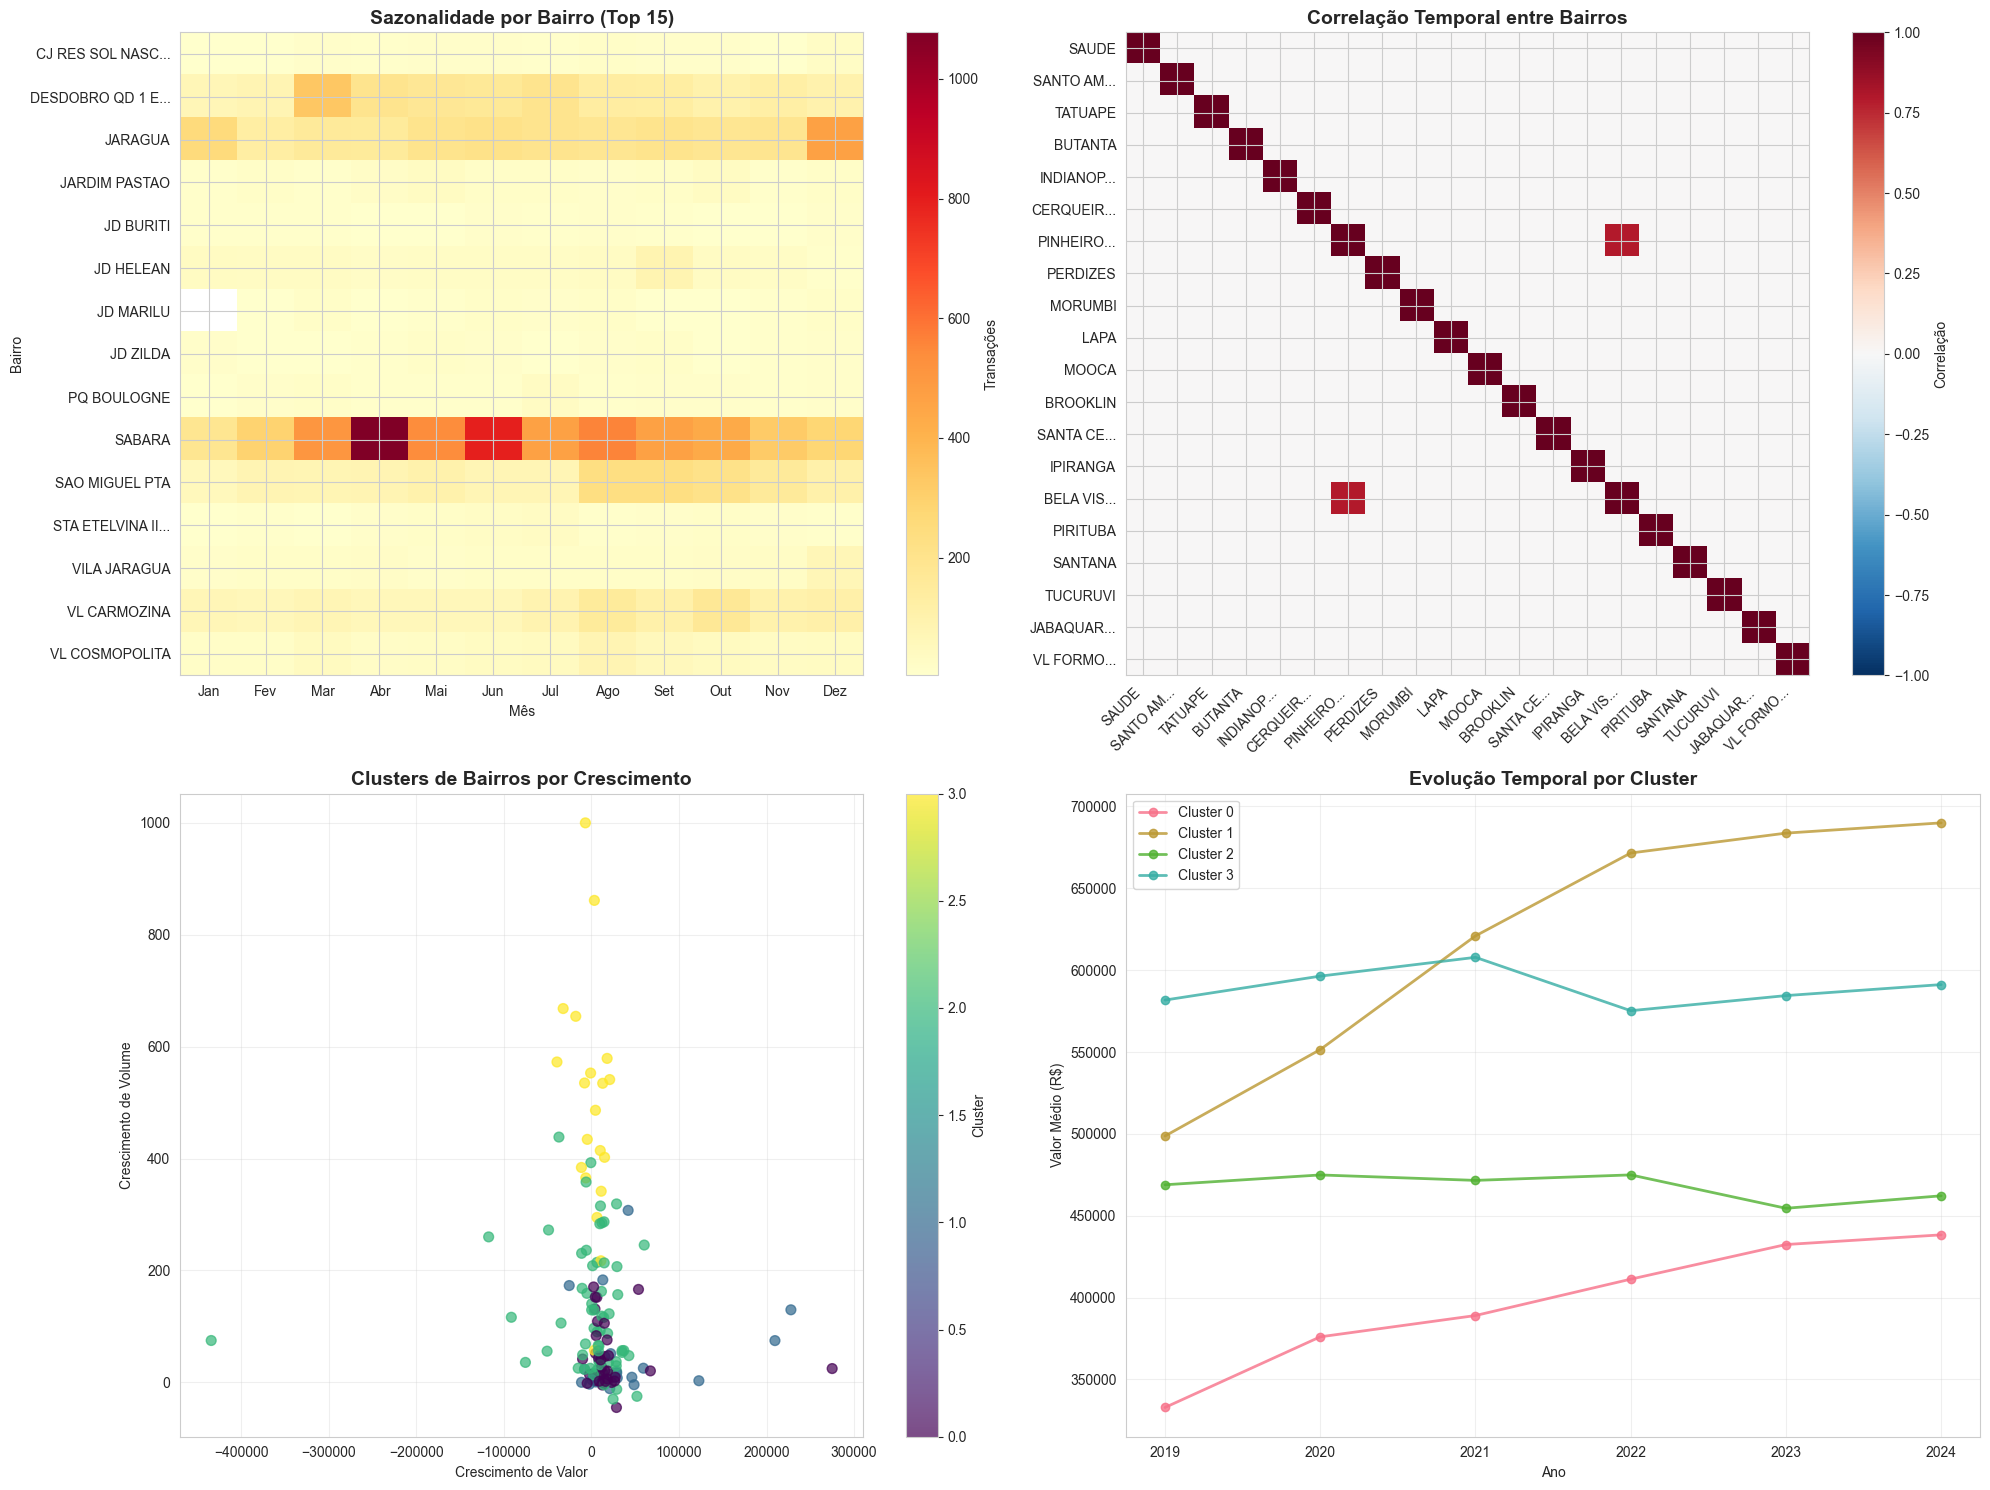


💾 Padrões sazonais salvos em: dados_processados/padroes_sazonais_por_bairro_itbi.csv
💾 Correlações temporais salvas em: dados_processados/correlacao_temporal_entre_bairros_itbi.csv
💾 Clusters geográficos salvos em: dados_processados/clusters_geograficos_temporais_itbi.csv

✅ Análise de correlação geográfica-temporal concluída!


In [ ]:
if 'bairro' in df_itbi.columns and 'setor' in df_itbi.columns:
    print('='*80)
    print('ANÁLISE DE CORRELAÇÃO GEOGRÁFICA-TEMPORAL - ITBI'.center(80))
    print('='*80)
    
    # Filtrar dados com informações geográficas completas
    df_correlacao = df_itbi[
        (df_itbi['bairro'].notna()) & 
        (df_itbi['setor'].notna()) & 
        (df_itbi['Valor de Transação (declarado pelo contribuinte)'].notna())
    ].copy()
    
    print(f'\n📊 Registros para análise de correlação: {len(df_correlacao):,}')
    
    # 1. Análise de sazonalidade por região
    print('\n📅 SAZONALIDADE POR REGIÃO:')
    
    # Calcular sazonalidade por bairro
    sazonalidade_bairro = df_correlacao.groupby(['bairro', 'Mes da Transacao']).agg({
        'Valor de Transação (declarado pelo contribuinte)': ['count', 'mean']
    }).round(2)
    
    sazonalidade_bairro.columns = ['_'.join(col).strip() for col in sazonalidade_bairro.columns]
    sazonalidade_bairro = sazonalidade_bairro.reset_index()
    sazonalidade_bairro.columns = ['Bairro', 'Mes', 'Transacoes', 'Valor_Medio']
    
    # Identificar bairros com padrões sazonais distintos
    padroes_sazonais = []
    
    for bairro in sazonalidade_bairro['Bairro'].unique():
        df_bairro_saz = sazonalidade_bairro[sazonalidade_bairro['Bairro'] == bairro].sort_values('Mes')
        
        if len(df_bairro_saz) >= 6:  # Pelo menos 6 meses de dados
            # Calcular coeficiente de variação para identificar sazonalidade
            cv_transacoes = df_bairro_saz['Transacoes'].std() / df_bairro_saz['Transacoes'].mean()
            cv_valores = df_bairro_saz['Valor_Medio'].std() / df_bairro_saz['Valor_Medio'].mean()
            
            # Identificar mês de pico e vale
            mes_pico_transacoes = df_bairro_saz.loc[df_bairro_saz['Transacoes'].idxmax(), 'Mes']
            mes_vale_transacoes = df_bairro_saz.loc[df_bairro_saz['Transacoes'].idxmin(), 'Mes']
            mes_pico_valores = df_bairro_saz.loc[df_bairro_saz['Valor_Medio'].idxmax(), 'Mes']
            mes_vale_valores = df_bairro_saz.loc[df_bairro_saz['Valor_Medio'].idxmin(), 'Mes']
            
            padroes_sazonais.append({
                'Bairro': bairro,
                'CV_Transacoes': cv_transacoes,
                'CV_Valores': cv_valores,
                'Mes_Pico_Transacoes': mes_pico_transacoes,
                'Mes_Vale_Transacoes': mes_vale_transacoes,
                'Mes_Pico_Valores': mes_pico_valores,
                'Mes_Vale_Valores': mes_vale_valores,
                'Total_Transacoes': df_bairro_saz['Transacoes'].sum()
            })
    
    if padroes_sazonais:
        df_padroes_sazonais = pd.DataFrame(padroes_sazonais)
        
        # Filtrar bairros com pelo menos 100 transações
        df_padroes_sazonais = df_padroes_sazonais[df_padroes_sazonais['Total_Transacoes'] >= 100].sort_values('CV_Transacoes', ascending=False)
        
        print('\nTop 15 bairros com maior sazonalidade (transações):')
        display(df_padroes_sazonais.head(15))
        
        print('\nTop 15 bairros com maior sazonalidade (valores):')
        top_sazonalidade_valores = df_padroes_sazonais.sort_values('CV_Valores', ascending=False).head(15)
        display(top_sazonalidade_valores)
    
    # 2. Análise de correlação temporal entre regiões
    print('\n🔗 CORRELAÇÃO TEMPORAL ENTRE REGIÕES:')
    
    # Calcular correlação entre bairros ao longo do tempo
    evolucao_bairros = df_correlacao.groupby(['bairro', 'Ano da Transacao', 'Mes da Transacao']).agg({
        'Valor de Transação (declarado pelo contribuinte)': 'mean'
    }).reset_index()
    
    # Pivot para ter bairros como colunas e tempo como índice
    pivot_bairros = evolucao_bairros.pivot_table(
        index=['Ano da Transacao', 'Mes da Transacao'], 
        columns='bairro', 
        values='Valor de Transação (declarado pelo contribuinte)', 
        fill_value=0
    )
    
    # Calcular correlação entre os top 20 bairros por volume
    top_20_bairros = df_correlacao['bairro'].value_counts().head(20).index
    pivot_top_20 = pivot_bairros[top_20_bairros]
    
    # Calcular matriz de correlação
    correlacao_bairros = pivot_top_20.corr()
    
    print(f'\nMatriz de correlação entre top 20 bairros:')
    print(f'Dimensões: {correlacao_bairros.shape}')
    
    # Identificar pares de bairros com maior correlação
    correlacao_pares = []
    for i in range(len(correlacao_bairros.columns)):
        for j in range(i+1, len(correlacao_bairros.columns)):
            bairro1 = correlacao_bairros.columns[i]
            bairro2 = correlacao_bairros.columns[j]
            corr_val = correlacao_bairros.iloc[i, j]
            
            if not np.isnan(corr_val):
                correlacao_pares.append({
                    'Bairro_1': bairro1,
                    'Bairro_2': bairro2,
                    'Correlacao': corr_val
                })
    
    if correlacao_pares:
        df_correlacao_pares = pd.DataFrame(correlacao_pares).sort_values('Correlacao', ascending=False)
        
        print('\nTop 10 pares de bairros com maior correlação temporal:')
        display(df_correlacao_pares.head(10))
        
        print('\nTop 10 pares de bairros com menor correlação temporal:')
        display(df_correlacao_pares.tail(10))
    
    # 3. Análise de clusters geográficos temporais
    print('\n🗺️ ANÁLISE DE CLUSTERS GEOGRÁFICOS TEMPORAIS:')
    
    # Calcular estatísticas por bairro e ano
    stats_bairro_ano = df_correlacao.groupby(['bairro', 'Ano da Transacao']).agg({
        'Valor de Transação (declarado pelo contribuinte)': ['count', 'mean', 'std'],
        'setor': 'nunique'
    }).round(2)
    
    stats_bairro_ano.columns = ['_'.join(col).strip() for col in stats_bairro_ano.columns]
    stats_bairro_ano = stats_bairro_ano.reset_index()
    stats_bairro_ano.columns = ['Bairro', 'Ano', 'Transacoes', 'Valor_Medio', 'Valor_Std', 'Setores_Unicos']
    
    # Calcular métricas de crescimento e estabilidade
    clusters_bairros = []
    
    for bairro in stats_bairro_ano['Bairro'].unique():
        df_bairro_cluster = stats_bairro_ano[stats_bairro_ano['Bairro'] == bairro].sort_values('Ano')
        
        if len(df_bairro_cluster) >= 3:  # Pelo menos 3 anos de dados
            # Calcular crescimento médio anual
            anos = df_bairro_cluster['Ano'].values
            valores = df_bairro_cluster['Valor_Medio'].values
            volumes = df_bairro_cluster['Transacoes'].values
            
            if len(anos) > 1:
                crescimento_valor = np.polyfit(anos, valores, 1)[0]
                crescimento_volume = np.polyfit(anos, volumes, 1)[0]
                
                # Calcular estabilidade (inverso do coeficiente de variação)
                estabilidade_valor = 1 / (df_bairro_cluster['Valor_Std'].mean() / df_bairro_cluster['Valor_Medio'].mean())
                estabilidade_volume = 1 / (df_bairro_cluster['Transacoes'].std() / df_bairro_cluster['Transacoes'].mean())
                
                # Calcular diversidade (número de setores únicos)
                diversidade = df_bairro_cluster['Setores_Unicos'].mean()
                
                clusters_bairros.append({
                    'Bairro': bairro,
                    'Crescimento_Valor': crescimento_valor,
                    'Crescimento_Volume': crescimento_volume,
                    'Estabilidade_Valor': estabilidade_valor,
                    'Estabilidade_Volume': estabilidade_volume,
                    'Diversidade_Setores': diversidade,
                    'Valor_Medio_Total': df_bairro_cluster['Valor_Medio'].mean(),
                    'Volume_Medio_Total': df_bairro_cluster['Transacoes'].mean(),
                    'Anos_Dados': len(df_bairro_cluster)
                })
    
    if clusters_bairros:
        df_clusters = pd.DataFrame(clusters_bairros)
        
        # Filtrar bairros com pelo menos 50 transações por ano em média
        df_clusters = df_clusters[df_clusters['Volume_Medio_Total'] >= 50].copy()
        
        # Normalizar métricas para clustering
        from sklearn.preprocessing import StandardScaler
        
        metrics_for_clustering = ['Crescimento_Valor', 'Crescimento_Volume', 'Estabilidade_Valor', 'Estabilidade_Volume', 'Diversidade_Setores']
        scaler = StandardScaler()
        df_clusters[metrics_for_clustering] = scaler.fit_transform(df_clusters[metrics_for_clustering])
        
        # Aplicar K-means clustering
        from sklearn.cluster import KMeans
        
        # Determinar número ótimo de clusters usando elbow method
        inertias = []
        K_range = range(2, min(11, len(df_clusters)//10 + 1))
        
        for k in K_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(df_clusters[metrics_for_clustering])
            inertias.append(kmeans.inertia_)
        
        # Usar 4 clusters por padrão
        n_clusters = 4
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        df_clusters['Cluster'] = kmeans.fit_predict(df_clusters[metrics_for_clustering])
        
        # Desnormalizar para interpretação
        df_clusters[metrics_for_clustering] = scaler.inverse_transform(df_clusters[metrics_for_clustering])
        
        print(f'\nClusters identificados: {n_clusters}')
        print('\nCaracterísticas dos clusters:')
        
        cluster_summary = df_clusters.groupby('Cluster').agg({
            'Crescimento_Valor': 'mean',
            'Crescimento_Volume': 'mean',
            'Estabilidade_Valor': 'mean',
            'Estabilidade_Volume': 'mean',
            'Diversidade_Setores': 'mean',
            'Valor_Medio_Total': 'mean',
            'Volume_Medio_Total': 'mean',
            'Bairro': 'count'
        }).round(2)
        
        cluster_summary.columns = ['Cresc_Valor', 'Cresc_Volume', 'Estab_Valor', 'Estab_Volume', 'Diversidade', 'Valor_Medio', 'Volume_Medio', 'Qtd_Bairros']
        cluster_summary = cluster_summary.reset_index()
        
        display(cluster_summary)
        
        # Interpretar clusters
        print('\nInterpretação dos clusters:')
        for cluster_id in range(n_clusters):
            cluster_data = df_clusters[df_clusters['Cluster'] == cluster_id]
            print(f'\nCluster {cluster_id} ({len(cluster_data)} bairros):')
            print(f'   Crescimento de valor: {cluster_data["Crescimento_Valor"].mean():.2f}')
            print(f'   Crescimento de volume: {cluster_data["Crescimento_Volume"].mean():.2f}')
            print(f'   Estabilidade de valor: {cluster_data["Estabilidade_Valor"].mean():.2f}')
            print(f'   Estabilidade de volume: {cluster_data["Estabilidade_Volume"].mean():.2f}')
            print(f'   Diversidade de setores: {cluster_data["Diversidade_Setores"].mean():.2f}')
            print(f'   Valor médio: R$ {cluster_data["Valor_Medio_Total"].mean():,.0f}')
            print(f'   Volume médio: {cluster_data["Volume_Medio_Total"].mean():.0f} transações/ano')
            
            # Mostrar alguns exemplos de bairros do cluster
            exemplos = cluster_data.nlargest(5, 'Volume_Medio_Total')['Bairro'].tolist()
            print(f'   Exemplos: {", ".join(exemplos)}')
    
    # 4. Visualizações de correlação geográfica-temporal
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    
    # 1. Heatmap de sazonalidade por bairro (top 15)
    if padroes_sazonais and len(df_padroes_sazonais) > 0:
        top_15_sazonalidade = df_padroes_sazonais.head(15)['Bairro'].tolist()
        df_heatmap_saz = sazonalidade_bairro[sazonalidade_bairro['Bairro'].isin(top_15_sazonalidade)]
        
        if len(df_heatmap_saz) > 0:
            pivot_sazonalidade = df_heatmap_saz.pivot(index='Bairro', columns='Mes', values='Transacoes')
            
            # Verificar se o pivot foi criado corretamente
            if not pivot_sazonalidade.empty:
                im1 = axes[0,0].imshow(pivot_sazonalidade.values, cmap='YlOrRd', aspect='auto')
                axes[0,0].set_xticks(range(len(pivot_sazonalidade.columns)))
                axes[0,0].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'][:len(pivot_sazonalidade.columns)])
                axes[0,0].set_yticks(range(len(pivot_sazonalidade.index)))
                axes[0,0].set_yticklabels([b[:15] + '...' if len(b) > 15 else b for b in pivot_sazonalidade.index], fontsize=10)
                axes[0,0].set_title('Sazonalidade por Bairro (Top 15)', fontsize=14, fontweight='bold')
                axes[0,0].set_xlabel('Mês')
                axes[0,0].set_ylabel('Bairro')
                plt.colorbar(im1, ax=axes[0,0], label='Transações')
            else:
                axes[0,0].text(0.5, 0.5, 'Dados insuficientes\npara sazonalidade', 
                              ha='center', va='center', transform=axes[0,0].transAxes)
                axes[0,0].set_title('Sazonalidade por Bairro', fontsize=14, fontweight='bold')
        else:
            axes[0,0].text(0.5, 0.5, 'Dados insuficientes\npara sazonalidade', 
                          ha='center', va='center', transform=axes[0,0].transAxes)
            axes[0,0].set_title('Sazonalidade por Bairro', fontsize=14, fontweight='bold')
    
    # 2. Matriz de correlação entre bairros
    if correlacao_pares and len(correlacao_bairros) > 0:
        # Mostrar apenas correlações significativas (> 0.5)
        corr_significativa = correlacao_bairros.copy()
        corr_significativa[corr_significativa < 0.5] = 0
        
        # Verificar se há dados para mostrar
        if not corr_significativa.empty and len(corr_significativa.columns) > 0:
            im2 = axes[0,1].imshow(corr_significativa.values, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
            axes[0,1].set_xticks(range(len(corr_significativa.columns)))
            axes[0,1].set_xticklabels([b[:8] + '...' if len(b) > 8 else b for b in corr_significativa.columns], rotation=45, ha='right')
            axes[0,1].set_yticks(range(len(corr_significativa.index)))
            axes[0,1].set_yticklabels([b[:8] + '...' if len(b) > 8 else b for b in corr_significativa.index], fontsize=10)
            axes[0,1].set_title('Correlação Temporal entre Bairros', fontsize=14, fontweight='bold')
            plt.colorbar(im2, ax=axes[0,1], label='Correlação')
        else:
            axes[0,1].text(0.5, 0.5, 'Dados insuficientes\npara correlação', 
                          ha='center', va='center', transform=axes[0,1].transAxes)
            axes[0,1].set_title('Correlação Temporal entre Bairros', fontsize=14, fontweight='bold')
    else:
        axes[0,1].text(0.5, 0.5, 'Dados insuficientes\npara correlação', 
                      ha='center', va='center', transform=axes[0,1].transAxes)
        axes[0,1].set_title('Correlação Temporal entre Bairros', fontsize=14, fontweight='bold')
    
    # 3. Scatter plot de clusters
    if clusters_bairros and len(df_clusters) > 0:
        # Verificar se as colunas necessárias existem
        if 'Crescimento_Valor' in df_clusters.columns and 'Crescimento_Volume' in df_clusters.columns and 'Cluster' in df_clusters.columns:
            scatter = axes[1,0].scatter(df_clusters['Crescimento_Valor'], df_clusters['Crescimento_Volume'], 
                                       c=df_clusters['Cluster'], cmap='viridis', alpha=0.7, s=50)
            axes[1,0].set_xlabel('Crescimento de Valor')
            axes[1,0].set_ylabel('Crescimento de Volume')
            axes[1,0].set_title('Clusters de Bairros por Crescimento', fontsize=14, fontweight='bold')
            axes[1,0].grid(True, alpha=0.3)
            plt.colorbar(scatter, ax=axes[1,0], label='Cluster')
        else:
            axes[1,0].text(0.5, 0.5, 'Dados insuficientes\npara clusters', 
                          ha='center', va='center', transform=axes[1,0].transAxes)
            axes[1,0].set_title('Clusters de Bairros por Crescimento', fontsize=14, fontweight='bold')
    else:
        axes[1,0].text(0.5, 0.5, 'Dados insuficientes\npara clusters', 
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Clusters de Bairros por Crescimento', fontsize=14, fontweight='bold')
    
    # 4. Evolução temporal de clusters
    if clusters_bairros and len(df_clusters) > 0 and 'stats_bairro_ano' in locals():
        cluster_plots = 0
        for cluster_id in range(n_clusters):
            cluster_bairros = df_clusters[df_clusters['Cluster'] == cluster_id]['Bairro'].tolist()
            if cluster_bairros:
                df_cluster_evo = stats_bairro_ano[stats_bairro_ano['Bairro'].isin(cluster_bairros)]
                if len(df_cluster_evo) > 0:
                    evolucao_cluster = df_cluster_evo.groupby('Ano')['Valor_Medio'].mean()
                    if len(evolucao_cluster) > 0:
                        axes[1,1].plot(evolucao_cluster.index, evolucao_cluster.values, 
                                      marker='o', linewidth=2, markersize=6, label=f'Cluster {cluster_id}', alpha=0.8)
                        cluster_plots += 1
        
        if cluster_plots > 0:
            axes[1,1].set_title('Evolução Temporal por Cluster', fontsize=14, fontweight='bold')
            axes[1,1].set_xlabel('Ano')
            axes[1,1].set_ylabel('Valor Médio (R$)')
            axes[1,1].legend()
            axes[1,1].grid(True, alpha=0.3)
        else:
            axes[1,1].text(0.5, 0.5, 'Dados insuficientes\npara evolução temporal', 
                          ha='center', va='center', transform=axes[1,1].transAxes)
            axes[1,1].set_title('Evolução Temporal por Cluster', fontsize=14, fontweight='bold')
    else:
        axes[1,1].text(0.5, 0.5, 'Dados insuficientes\npara evolução temporal', 
                      ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title('Evolução Temporal por Cluster', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Salvar análises de correlação
    output_dir = 'dados_processados'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    if padroes_sazonais:
        df_padroes_sazonais.to_csv(f'{output_dir}/padroes_sazonais_por_bairro_itbi.csv', index=False)
        print(f'\n💾 Padrões sazonais salvos em: {output_dir}/padroes_sazonais_por_bairro_itbi.csv')
    
    if correlacao_pares:
        df_correlacao_pares.to_csv(f'{output_dir}/correlacao_temporal_entre_bairros_itbi.csv', index=False)
        print(f'💾 Correlações temporais salvas em: {output_dir}/correlacao_temporal_entre_bairros_itbi.csv')
    
    if clusters_bairros:
        df_clusters.to_csv(f'{output_dir}/clusters_geograficos_temporais_itbi.csv', index=False)
        print(f'💾 Clusters geográficos salvos em: {output_dir}/clusters_geograficos_temporais_itbi.csv')
    
    print('\n✅ Análise de correlação geográfica-temporal concluída!')
    
else:
    print('\n❌ Colunas necessárias (bairro, setor) não encontradas para análise de correlação!')


### 7.3. Análise Temporal - ITBI (Ano e Mês)

                            ANÁLISE TEMPORAL - ITBI                             

📅 TRANSAÇÕES POR ANO - ITBI:
Ano da Transacao
2019    105593
2020    113880
2021    170873
2022    163881
2023    174494
2024    212902
Name: count, dtype: int64

📅 TRANSAÇÕES POR MÊS - ITBI:
Mes da Transacao
1     54589
2     62910
3     76584
4     72991
5     78457
6     79369
7     80909
8     88199
9     84599
10    86788
11    84179
12    92049
Name: count, dtype: int64


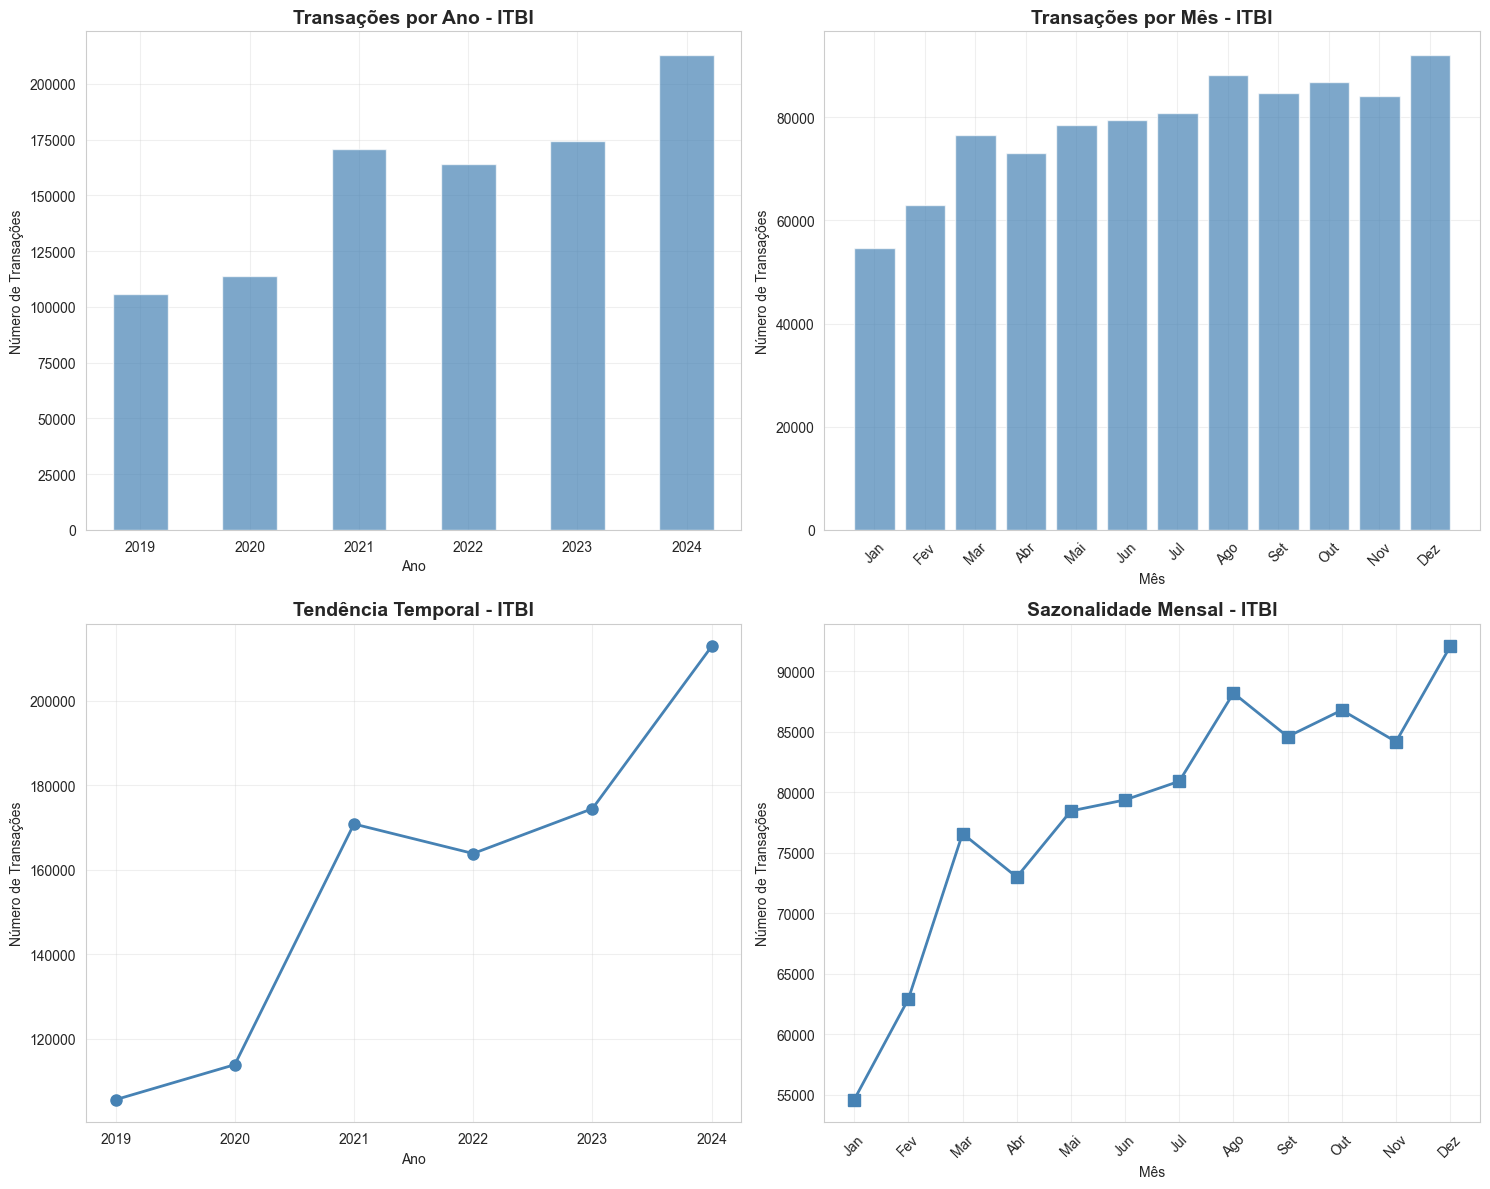

In [ ]:
print('='*80)
print('ANÁLISE TEMPORAL - ITBI'.center(80))
print('='*80)

# Transações por ano - ITBI
transacoes_itbi_ano = df_itbi['Ano da Transacao'].value_counts().sort_index()
print('\n📅 TRANSAÇÕES POR ANO - ITBI:')
print(transacoes_itbi_ano)

# Transações por mês - ITBI
transacoes_itbi_mes = df_itbi['Mes da Transacao'].value_counts().sort_index()
print('\n📅 TRANSAÇÕES POR MÊS - ITBI:')
print(transacoes_itbi_mes)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ITBI por ano
transacoes_itbi_ano.plot(kind='bar', ax=axes[0,0], color='steelblue', alpha=0.7)
axes[0,0].set_title('Transações por Ano - ITBI', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Ano')
axes[0,0].set_ylabel('Número de Transações')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=0)

# ITBI por mês
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
axes[0,1].bar(range(1, 13), [transacoes_itbi_mes.get(i, 0) for i in range(1, 13)], 
              alpha=0.7, color='steelblue')
axes[0,1].set_title('Transações por Mês - ITBI', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Mês')
axes[0,1].set_ylabel('Número de Transações')
axes[0,1].set_xticks(range(1, 13))
axes[0,1].set_xticklabels(meses, rotation=45)
axes[0,1].grid(True, alpha=0.3)

# Linha do tempo ITBI
axes[1,0].plot(transacoes_itbi_ano.index, transacoes_itbi_ano.values, 
               marker='o', linewidth=2, markersize=8, color='steelblue')
axes[1,0].set_title('Tendência Temporal - ITBI', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Ano')
axes[1,0].set_ylabel('Número de Transações')
axes[1,0].grid(True, alpha=0.3)

# Sazonalidade ITBI
axes[1,1].plot(transacoes_itbi_mes.index, transacoes_itbi_mes.values, 
               marker='s', linewidth=2, markersize=8, color='steelblue')
axes[1,1].set_title('Sazonalidade Mensal - ITBI', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Mês')
axes[1,1].set_ylabel('Número de Transações')
axes[1,1].set_xticks(range(1, 13))
axes[1,1].set_xticklabels(meses, rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 7.4. Análise Temporal - IPTU (Apenas Ano)

                            ANÁLISE TEMPORAL - IPTU                             

📅 TRANSAÇÕES POR ANO - IPTU:
ANO DO EXERCICIO
2019    3447112
2020    3498644
2021    3489273
2022    3588319
2023    3644459
2024    3649504
Name: count, dtype: int64


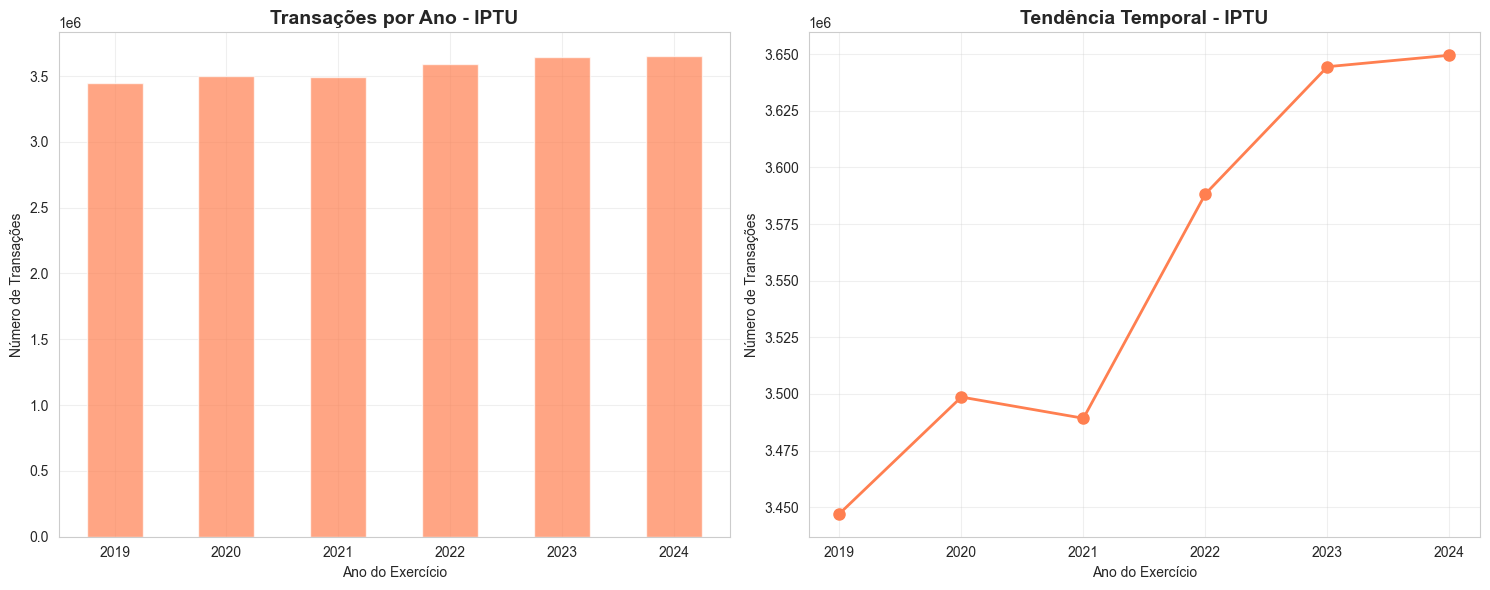

In [ ]:
print('='*80)
print('ANÁLISE TEMPORAL - IPTU'.center(80))
print('='*80)

# Transações por ano - IPTU
transacoes_iptu_ano = df_iptu['ANO DO EXERCICIO'].value_counts().sort_index()
print('\n📅 TRANSAÇÕES POR ANO - IPTU:')
print(transacoes_iptu_ano)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# IPTU por ano
transacoes_iptu_ano.plot(kind='bar', ax=axes[0], color='coral', alpha=0.7)
axes[0].set_title('Transações por Ano - IPTU', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Ano do Exercício')
axes[0].set_ylabel('Número de Transações')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=0)

# Linha do tempo IPTU
axes[1].plot(transacoes_iptu_ano.index, transacoes_iptu_ano.values, 
             marker='o', linewidth=2, markersize=8, color='coral')
axes[1].set_title('Tendência Temporal - IPTU', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Ano do Exercício')
axes[1].set_ylabel('Número de Transações')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 7.5. Comparação Temporal - ITBI vs IPTU

                       COMPARAÇÃO TEMPORAL - ITBI vs IPTU                       

📊 Anos comuns: [2019, 2020, 2021, 2022, 2023, 2024]
   ITBI: {2019, 2020, 2021, 2022, 2023, 2024}
   IPTU: {2019, 2020, 2021, 2022, 2023, 2024}

📋 COMPARAÇÃO POR ANO:


Ano    ITBI     IPTU
0  2019  105593  3447112
1  2020  113880  3498644
2  2021  170873  3489273
3  2022  163881  3588319
4  2023  174494  3644459
5  2024  212902  3649504

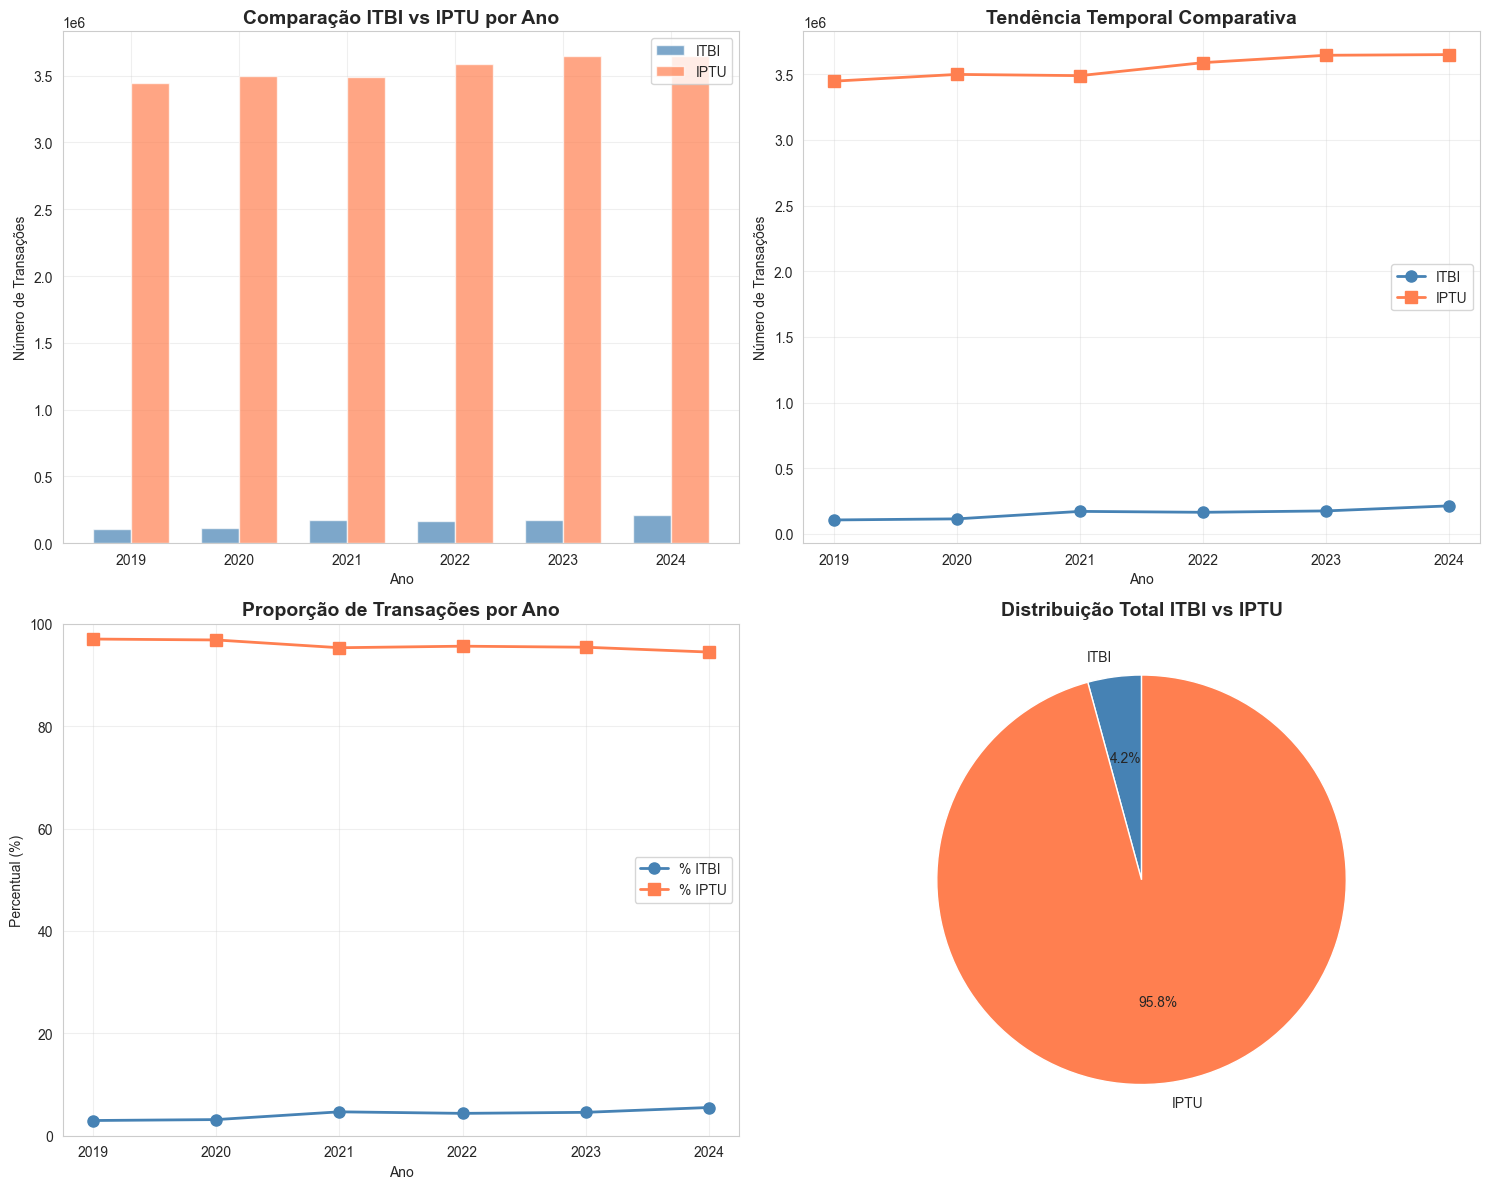

In [ ]:
print('='*80)
print('COMPARAÇÃO TEMPORAL - ITBI vs IPTU'.center(80))
print('='*80)

# Comparação por ano
anos_itbi = set(transacoes_itbi_ano.index)
anos_iptu = set(transacoes_iptu_ano.index)
anos_comuns = sorted(anos_itbi.intersection(anos_iptu))

print(f'\n📊 Anos comuns: {anos_comuns}')
print(f'   ITBI: {anos_itbi}')
print(f'   IPTU: {anos_iptu}')

# Criar DataFrame comparativo
comparacao_anos = pd.DataFrame({
    'Ano': anos_comuns,
    'ITBI': [transacoes_itbi_ano.get(ano, 0) for ano in anos_comuns],
    'IPTU': [transacoes_iptu_ano.get(ano, 0) for ano in anos_comuns]
})

print('\n📋 COMPARAÇÃO POR ANO:')
display(comparacao_anos)

# Visualização comparativa
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico de barras comparativo
x = np.arange(len(anos_comuns))
width = 0.35

axes[0,0].bar(x - width/2, comparacao_anos['ITBI'], width, label='ITBI', alpha=0.7, color='steelblue')
axes[0,0].bar(x + width/2, comparacao_anos['IPTU'], width, label='IPTU', alpha=0.7, color='coral')
axes[0,0].set_title('Comparação ITBI vs IPTU por Ano', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Ano')
axes[0,0].set_ylabel('Número de Transações')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(anos_comuns)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Linha do tempo comparativa
axes[0,1].plot(anos_comuns, comparacao_anos['ITBI'], marker='o', linewidth=2, markersize=8, label='ITBI', color='steelblue')
axes[0,1].plot(anos_comuns, comparacao_anos['IPTU'], marker='s', linewidth=2, markersize=8, label='IPTU', color='coral')
axes[0,1].set_title('Tendência Temporal Comparativa', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Ano')
axes[0,1].set_ylabel('Número de Transações')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Proporção ITBI
total_por_ano = comparacao_anos['ITBI'] + comparacao_anos['IPTU']
proporcao_itbi = (comparacao_anos['ITBI'] / total_por_ano) * 100
proporcao_iptu = (comparacao_anos['IPTU'] / total_por_ano) * 100

axes[1,0].plot(anos_comuns, proporcao_itbi, marker='o', linewidth=2, markersize=8, label='% ITBI', color='steelblue')
axes[1,0].plot(anos_comuns, proporcao_iptu, marker='s', linewidth=2, markersize=8, label='% IPTU', color='coral')
axes[1,0].set_title('Proporção de Transações por Ano', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Ano')
axes[1,0].set_ylabel('Percentual (%)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_ylim(0, 100)

# Gráfico de pizza da distribuição total
total_itbi = comparacao_anos['ITBI'].sum()
total_iptu = comparacao_anos['IPTU'].sum()
axes[1,1].pie([total_itbi, total_iptu], labels=['ITBI', 'IPTU'], autopct='%1.1f%%', 
              colors=['steelblue', 'coral'], startangle=90)
axes[1,1].set_title('Distribuição Total ITBI vs IPTU', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 8. Heatmap de Transações - ITBI (Ano x Mês)

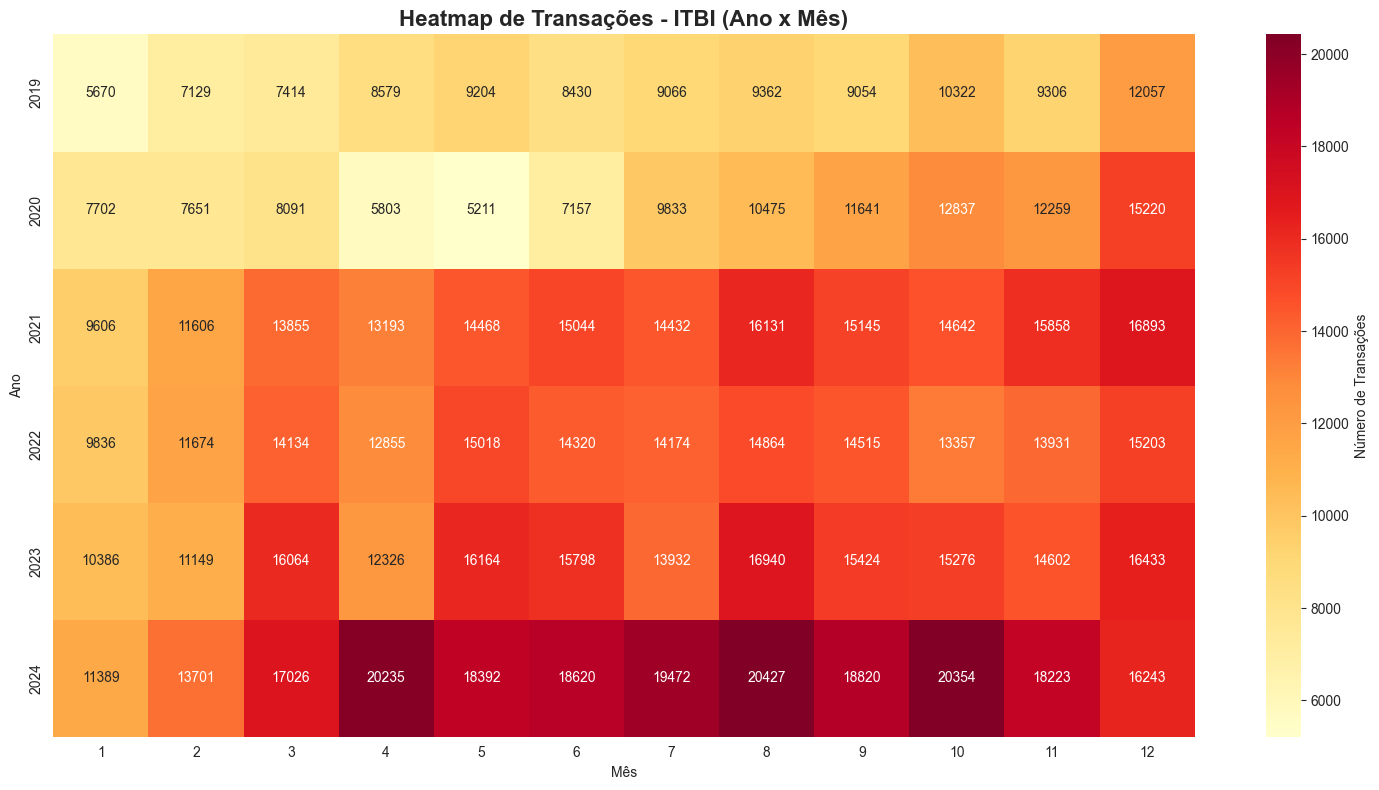

In [ ]:
# Heatmap ITBI (Ano x Mês)
pivot_itbi = df_itbi.groupby(['Ano da Transacao', 'Mes da Transacao']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_itbi, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Número de Transações'})
plt.title('Heatmap de Transações - ITBI (Ano x Mês)', fontsize=16, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.tight_layout()
plt.show()

## 9. Análise de Valores de Transação

In [ ]:
print('='*80)
print('ANÁLISE DE VALORES DE TRANSAÇÃO'.center(80))
print('='*80)

# ITBI - Valor de Transação
valor_col_itbi = 'Valor de Transação (declarado pelo contribuinte)'
if valor_col_itbi in df_itbi.columns:
    print('\n💰 ESTATÍSTICAS DE VALORES - ITBI:')
    print(f'   Média: R$ {df_itbi[valor_col_itbi].mean():,.2f}')
    print(f'   Mediana: R$ {df_itbi[valor_col_itbi].median():,.2f}')
    print(f'   Desvio Padrão: R$ {df_itbi[valor_col_itbi].std():,.2f}')
    print(f'   Mínimo: R$ {df_itbi[valor_col_itbi].min():,.2f}')
    print(f'   Máximo: R$ {df_itbi[valor_col_itbi].max():,.2f}')

# IPTU - Valor do M2 do Terreno
valor_col_iptu = 'VALOR DO M2 DO TERRENO'
if valor_col_iptu in df_iptu.columns:
    print('\n💰 ESTATÍSTICAS DE VALORES - IPTU (M2 Terreno):')
    print(f'   Média: R$ {df_iptu[valor_col_iptu].mean():,.2f}')
    print(f'   Mediana: R$ {df_iptu[valor_col_iptu].median():,.2f}')
    print(f'   Desvio Padrão: R$ {df_iptu[valor_col_iptu].std():,.2f}')
    print(f'   Mínimo: R$ {df_iptu[valor_col_iptu].min():,.2f}')
    print(f'   Máximo: R$ {df_iptu[valor_col_iptu].max():,.2f}')

                        ANÁLISE DE VALORES DE TRANSAÇÃO                         

💰 ESTATÍSTICAS DE VALORES - ITBI:
   Média: R$ 626,010.21
   Mediana: R$ 307,600.00
   Desvio Padrão: R$ 2,860,635.82
   Mínimo: R$ 0.00
   Máximo: R$ 729,435,080.10

💰 ESTATÍSTICAS DE VALORES - IPTU (M2 Terreno):
   Média: R$ 2,462.21
   Mediana: R$ 1,331.00
   Desvio Padrão: R$ 3,144.23
   Mínimo: R$ 45.00
   Máximo: R$ 32,871.00


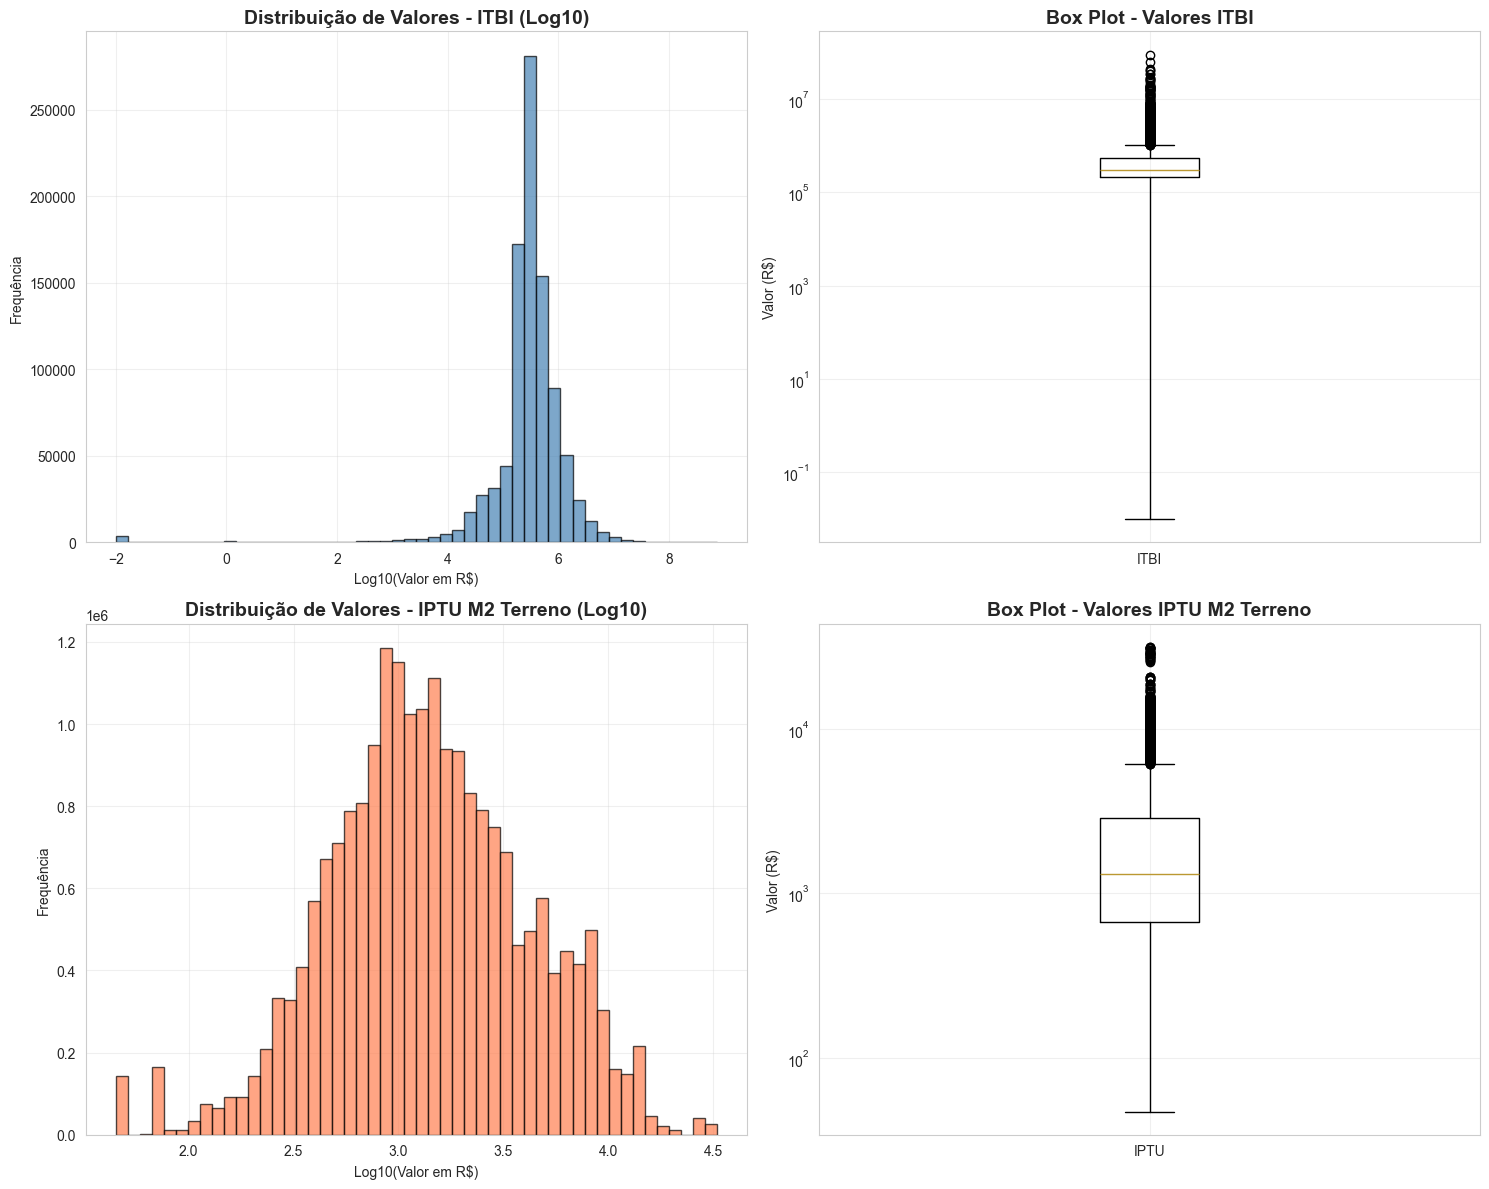

In [ ]:
# Visualização de distribuição de valores
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ITBI - Valor de Transação
if valor_col_itbi in df_itbi.columns:
    valores_itbi = df_itbi[valor_col_itbi].dropna()
    valores_itbi_log = np.log10(valores_itbi[valores_itbi > 0])
    
    axes[0,0].hist(valores_itbi_log, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[0,0].set_title('Distribuição de Valores - ITBI (Log10)', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Log10(Valor em R$)')
    axes[0,0].set_ylabel('Frequência')
    axes[0,0].grid(True, alpha=0.3)
    
    # Box plot ITBI
    sample_size = min(10000, len(valores_itbi))
    valores_itbi_sample = valores_itbi.sample(sample_size, random_state=42)
    axes[0,1].boxplot([valores_itbi_sample], labels=['ITBI'])
    axes[0,1].set_title('Box Plot - Valores ITBI', fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('Valor (R$)')
    axes[0,1].set_yscale('log')
    axes[0,1].grid(True, alpha=0.3)

# IPTU - Valor do M2 do Terreno
if valor_col_iptu in df_iptu.columns:
    valores_iptu = df_iptu[valor_col_iptu].dropna()
    valores_iptu_log = np.log10(valores_iptu[valores_iptu > 0])
    
    axes[1,0].hist(valores_iptu_log, bins=50, alpha=0.7, color='coral', edgecolor='black')
    axes[1,0].set_title('Distribuição de Valores - IPTU M2 Terreno (Log10)', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Log10(Valor em R$)')
    axes[1,0].set_ylabel('Frequência')
    axes[1,0].grid(True, alpha=0.3)
    
    # Box plot IPTU
    sample_size = min(10000, len(valores_iptu))
    valores_iptu_sample = valores_iptu.sample(sample_size, random_state=42)
    axes[1,1].boxplot([valores_iptu_sample], labels=['IPTU'])
    axes[1,1].set_title('Box Plot - Valores IPTU M2 Terreno', fontsize=14, fontweight='bold')
    axes[1,1].set_ylabel('Valor (R$)')
    axes[1,1].set_yscale('log')
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Análise de Natureza de Transação (ITBI)

                    ANÁLISE DE NATUREZA DE TRANSAÇÃO - ITBI                     

📋 DISTRIBUIÇÃO POR NATUREZA:


Quantidade  Percentual (%)
Natureza de Transação                                                         
1.Compra e venda                                        850479       90.320542
12.Dação em pagamento por escritura pública              21319        2.264070
20.Realização ou integralização de capital               12025        1.277050
2.Cessão de direitos relativos a compromisso de...        9211        0.978205
15.Permuta por escritura pública                          8751        0.929353
4.Arrematação (em leilão ou hasta pública)                8396        0.891652
17.Resolução da alienação fiduciária por inadim...        7814        0.829844
33.Demais atos onerosos translativos                      6140        0.652066
3.Adjudicação (vinculada a processo de execução...        3279        0.348229
26.Cessão de direitos sobre o imóvel com aliena...        2696        0.286314
8.Cessão de direitos hereditários (ou sucessórios)        1958        0.207939
5.Adjudicação compulsória                                 1808        0.192009
29.Excesso de meação na partilha (separação / d...        1149        0.122023
27.Excesso de quinhão ou quota-parte na divisão...        1141        0.121174
34.Demais sentenças judiciais                             1084        0.115120
5.Excesso de meação ou quinhão na partilha                 905        0.096111
23.Cisão total ou parcial                                  895        0.095049
24.Extinção de pessoa jurídica                             697        0.074021
40.Excesso na integralização de capital                    547        0.058091
28.Excesso de meação ou quinhão na partilha (su...         275        0.029205
21.Incorporação                                            261        0.027718
35.Demais transações de direitos de compromisso...         198        0.021028
30.Excesso de meação na partilha (dissolução da...         169        0.017948
25.Desincorporação do bem imóvel pertencente à ...         121        0.012850
9.Cessão dos direitos do adjudicatário                      57        0.006053
11.Cessão de direitos de superfície                         53        0.005629
19.Usufruto                                                 52        0.005522
31.Rejeição dos embargos à arrematação                      47        0.004991
14.Mandato em causa própria                                 23        0.002443
10.Cessão dos direitos do arrematante                       22        0.002336
7.Cessão de benfeitorias e construções em terre...          22        0.002336
18.Uso                                                      10        0.001062
5.Adjudicação Compulsória                                    7        0.000743
6.Cessão de benfeitorias e construções em terre...           7        0.000743
16.Remição                                                   4        0.000425
5. Excesso de meação ou quinhão na partilha                  1        0.000106

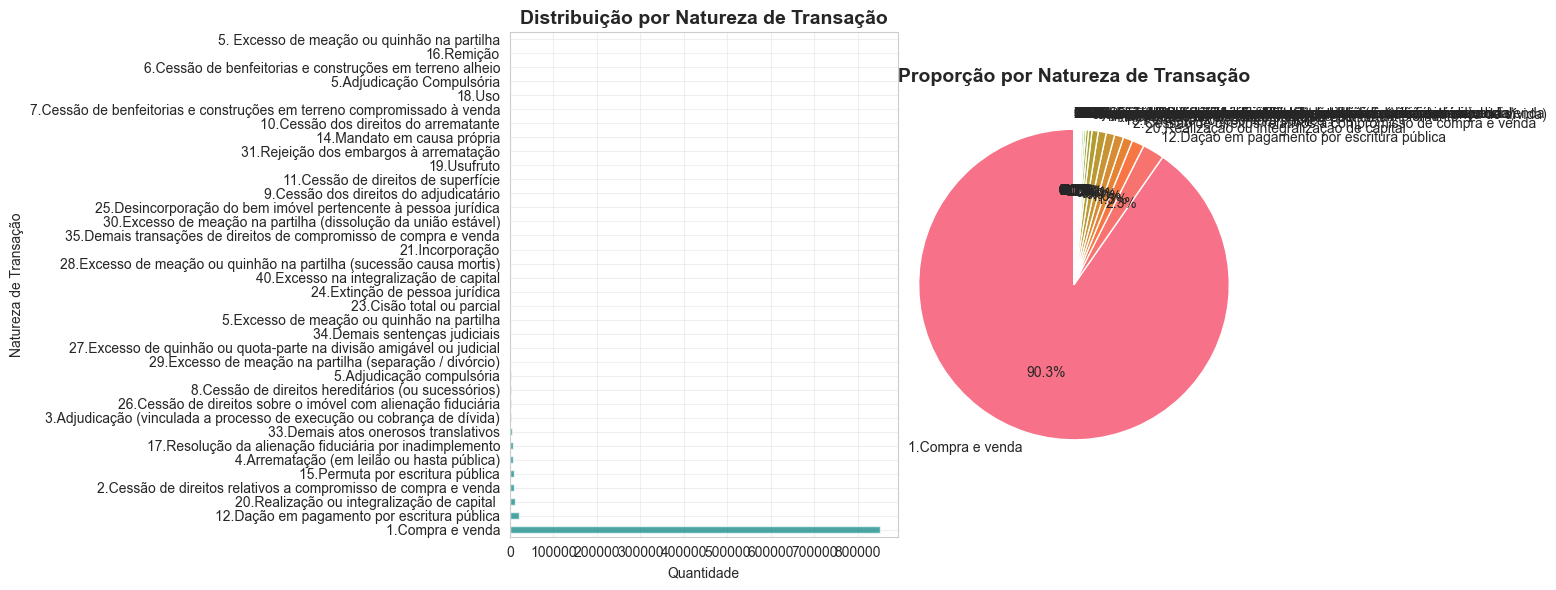

In [ ]:
if 'Natureza de Transação' in df_itbi.columns:
    print('='*80)
    print('ANÁLISE DE NATUREZA DE TRANSAÇÃO - ITBI'.center(80))
    print('='*80)
    
    natureza_counts = df_itbi['Natureza de Transação'].value_counts()
    natureza_percent = (natureza_counts / len(df_itbi)) * 100
    
    natureza_df = pd.DataFrame({
        'Quantidade': natureza_counts,
        'Percentual (%)': natureza_percent
    })
    
    print('\n📋 DISTRIBUIÇÃO POR NATUREZA:')
    display(natureza_df)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    natureza_counts.plot(kind='barh', ax=axes[0], color='teal', alpha=0.7)
    axes[0].set_title('Distribuição por Natureza de Transação', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Quantidade')
    axes[0].grid(True, alpha=0.3)
    
    axes[1].pie(natureza_counts.values, labels=natureza_counts.index, autopct='%1.1f%%', 
                startangle=90, colors=sns.color_palette('husl', len(natureza_counts)))
    axes[1].set_title('Proporção por Natureza de Transação', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## 11. Análise de Tipo de Uso do Imóvel (IPTU)

                    ANÁLISE DE TIPO DE USO DO IMÓVEL - IPTU                     

📋 DISTRIBUIÇÃO POR TIPO DE USO:


Quantidade  Percentual (%)
TIPO DE USO DO IMOVEL                                                         
Apartamento em condomínio                              8521073       39.972551
Residência                                             6491698       30.452706
Residência coletiva, exclusive cortiço (mais de...     1225981        5.751105
Garagem (unidade autônoma) em edifício em condo...     1185071        5.559196
Escritório/consultório em condomínio (unidade a...      831480        3.900492
Terreno                                                 628525        2.948425
Residência e outro uso (predominância residencial)      512335        2.403375
Loja                                                    324601        1.522711
Loja e residência (predominância comercial)             266636        1.250796
Garagem (unidade autônoma) em edifício em condo...      227966        1.069394

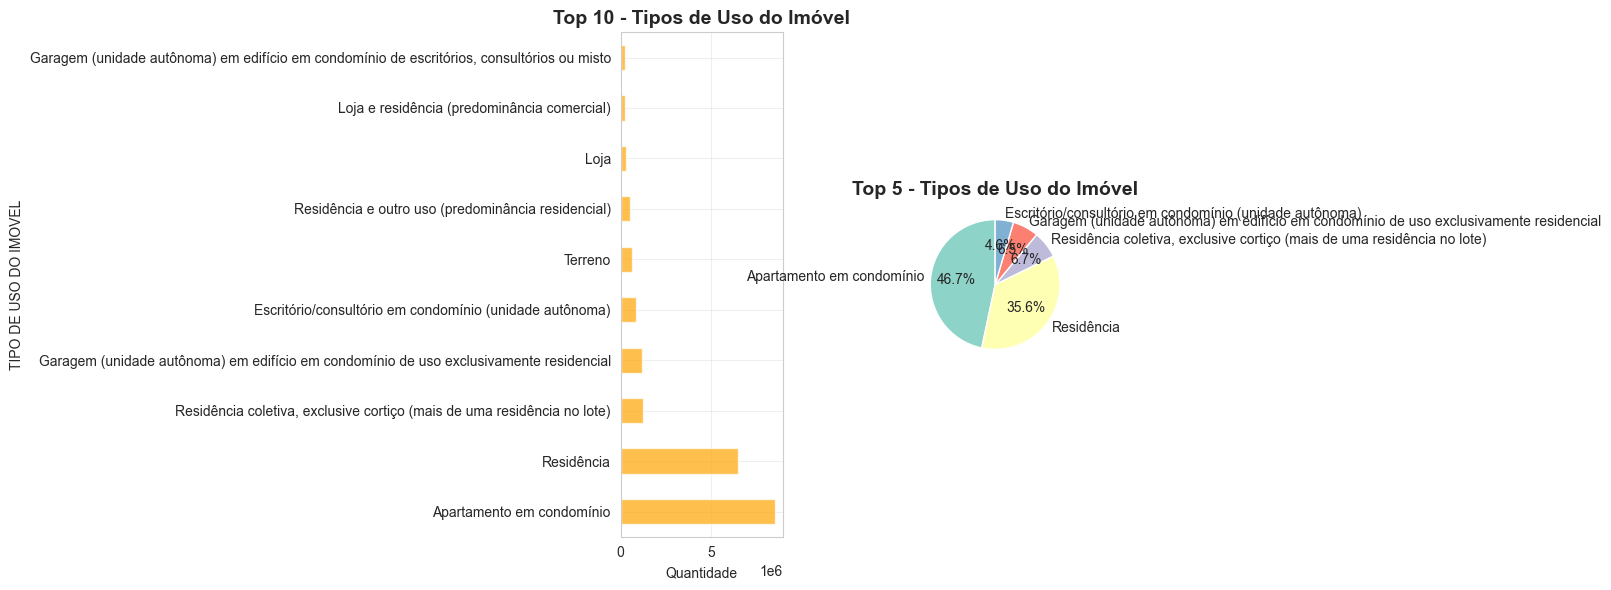

In [ ]:
if 'TIPO DE USO DO IMOVEL' in df_iptu.columns:
    print('='*80)
    print('ANÁLISE DE TIPO DE USO DO IMÓVEL - IPTU'.center(80))
    print('='*80)
    
    uso_counts = df_iptu['TIPO DE USO DO IMOVEL'].value_counts()
    uso_percent = (uso_counts / len(df_iptu)) * 100
    
    uso_df = pd.DataFrame({
        'Quantidade': uso_counts,
        'Percentual (%)': uso_percent
    })
    
    print('\n📋 DISTRIBUIÇÃO POR TIPO DE USO:')
    display(uso_df.head(10))  # Mostrar apenas os 10 principais
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Top 10 tipos de uso
    top_10_uso = uso_counts.head(10)
    top_10_uso.plot(kind='barh', ax=axes[0], color='orange', alpha=0.7)
    axes[0].set_title('Top 10 - Tipos de Uso do Imóvel', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Quantidade')
    axes[0].grid(True, alpha=0.3)
    
    # Gráfico de pizza dos top 5
    top_5_uso = uso_counts.head(5)
    axes[1].pie(top_5_uso.values, labels=top_5_uso.index, autopct='%1.1f%%', 
                startangle=90, colors=sns.color_palette('Set3', len(top_5_uso)))
    axes[1].set_title('Top 5 - Tipos de Uso do Imóvel', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## 14. Análise de Crescimento de Arrecadação por Uso do Imóvel

Esta seção analisa como a arrecadação (baseada nos valores de m²) evolui ao longo do tempo para diferentes tipos de uso do imóvel no IPTU.

            ANÁLISE DE CRESCIMENTO DE ARRECADAÇÃO POR USO DO IMÓVEL             

✅ Todas as colunas necessárias encontradas!

📊 Registros válidos para análise: 21,317,311

📋 RESUMO POR ANO E TIPO DE USO:


Ano                                           Tipo_Uso  Valor_Total_Sum  \
0   2019                          Apartamento em condomínio     1.175997e+13   
1   2019                        Armazéns gerais e depósitos     1.799519e+10   
2   2019     Asilo, orfanato, creche, seminário ou convento     1.944634e+09   
3   2019  Cinema, teatro, casa de diversão, clube ou con...     5.140334e+09   
4   2019                                    Clube esportivo     9.934798e+09   
5   2019                                            Cortiço     5.615784e+08   
6   2019                                             Escola     2.421190e+10   
7   2019  Escritório/consultório em condomínio (unidade ...     2.213740e+12   
8   2019  Estação radioemissora, de televisão ou empresa...     9.226366e+08   
9   2019         Flat de uso comercial (semelhante a hotel)     3.514910e+11   
10  2019                     Flat residencial em condomínio     4.348714e+10   
11  2019        Garagem (exclusive em prédio em condomínio)     4.600581e+09   
12  2019   Garagem (unidade autônoma) de prédio de garagens     3.226303e+10   
13  2019  Garagem (unidade autônoma) em edifício em cond...     2.568530e+12   
14  2019  Garagem (unidade autônoma) em edifício em cond...     2.172263e+12   
15  2019  Hospital, ambulatório, casa de saúde e assemel...     7.503173e+09   
16  2019                        Hotel, pensão ou hospedaria     2.790256e+10   
17  2019                                          Indústria     2.326032e+10   
18  2019                                               Loja     5.075085e+10   
19  2019        Loja e residência (predominância comercial)     1.373305e+10   

    Valor_Total_Mean  Quantidade    Area_Total  Valor_M2_Mean  
0         8866281.49     1326370  9.650645e+09        2218.47  
1         2114344.44        8511  2.510356e+07         976.26  
2         2258576.41         861  2.430671e+06        1126.40  
3         9018129.13         570  3.202874e+06        2555.51  
4        17804297.96         558  7.355092e+06        1244.41  
5          315139.38        1782  8.761190e+05         838.27  
6         3534583.40        6850  1.921033e+07        1555.76  
7        16484156.14      134295  4.832743e+08        5417.78  
8         1890648.69         488  9.751340e+05        1090.72  
9        14667458.12       23964  9.210356e+07        5799.13  
10        9048510.05        4806  8.336916e+06        5363.47  
11        1710889.35        2689  2.826014e+06        2222.43  
12        3545387.93        9100  7.881558e+06        4054.97  
13       69521184.99       36946  1.035874e+09        7569.20  
14       11179883.79      194301  9.936456e+08        2886.93  
15        5816413.28        1290  3.880116e+06        2423.24  
16        7617405.50        3663  1.086536e+07        2994.78  
17        1745615.00       13325  2.997123e+07        1012.22  
18         938318.86       54087  2.607207e+07        2146.42  
19         303124.27       45305  1.265696e+07        1215.69


🏢 Top 10 tipos de uso: ['Apartamento em condomínio', 'Residência', 'Residência coletiva, exclusive cortiço (mais de uma residência no lote)', 'Garagem (unidade autônoma) em edifício em condomínio de uso exclusivamente residencial', 'Escritório/consultório em condomínio (unidade autônoma)', 'Terreno', 'Residência e outro uso (predominância residencial)', 'Loja', 'Loja e residência (predominância comercial)', 'Garagem (unidade autônoma) em edifício em condomínio de escritórios, consultórios ou misto']

📈 ANÁLISE DE CRESCIMENTO:

Apartamento em condomínio:
   Valor total: R$ 20,889,472,395,642.00 (último ano)
   Quantidade: 1,515,151 imóveis
   Crescimento médio anual: 13.86%

Residência:
   Valor total: R$ 1,136,132,005,987.00 (último ano)
   Quantidade: 1,083,578 imóveis
   Crescimento médio anual: 9.39%

Residência coletiva, exclusive cortiço (mais de uma residência no lote):
   Valor total: R$ 140,861,457,979.00 (último ano)
   Quantidade: 205,815 imóveis
   Crescimento médio anual: 

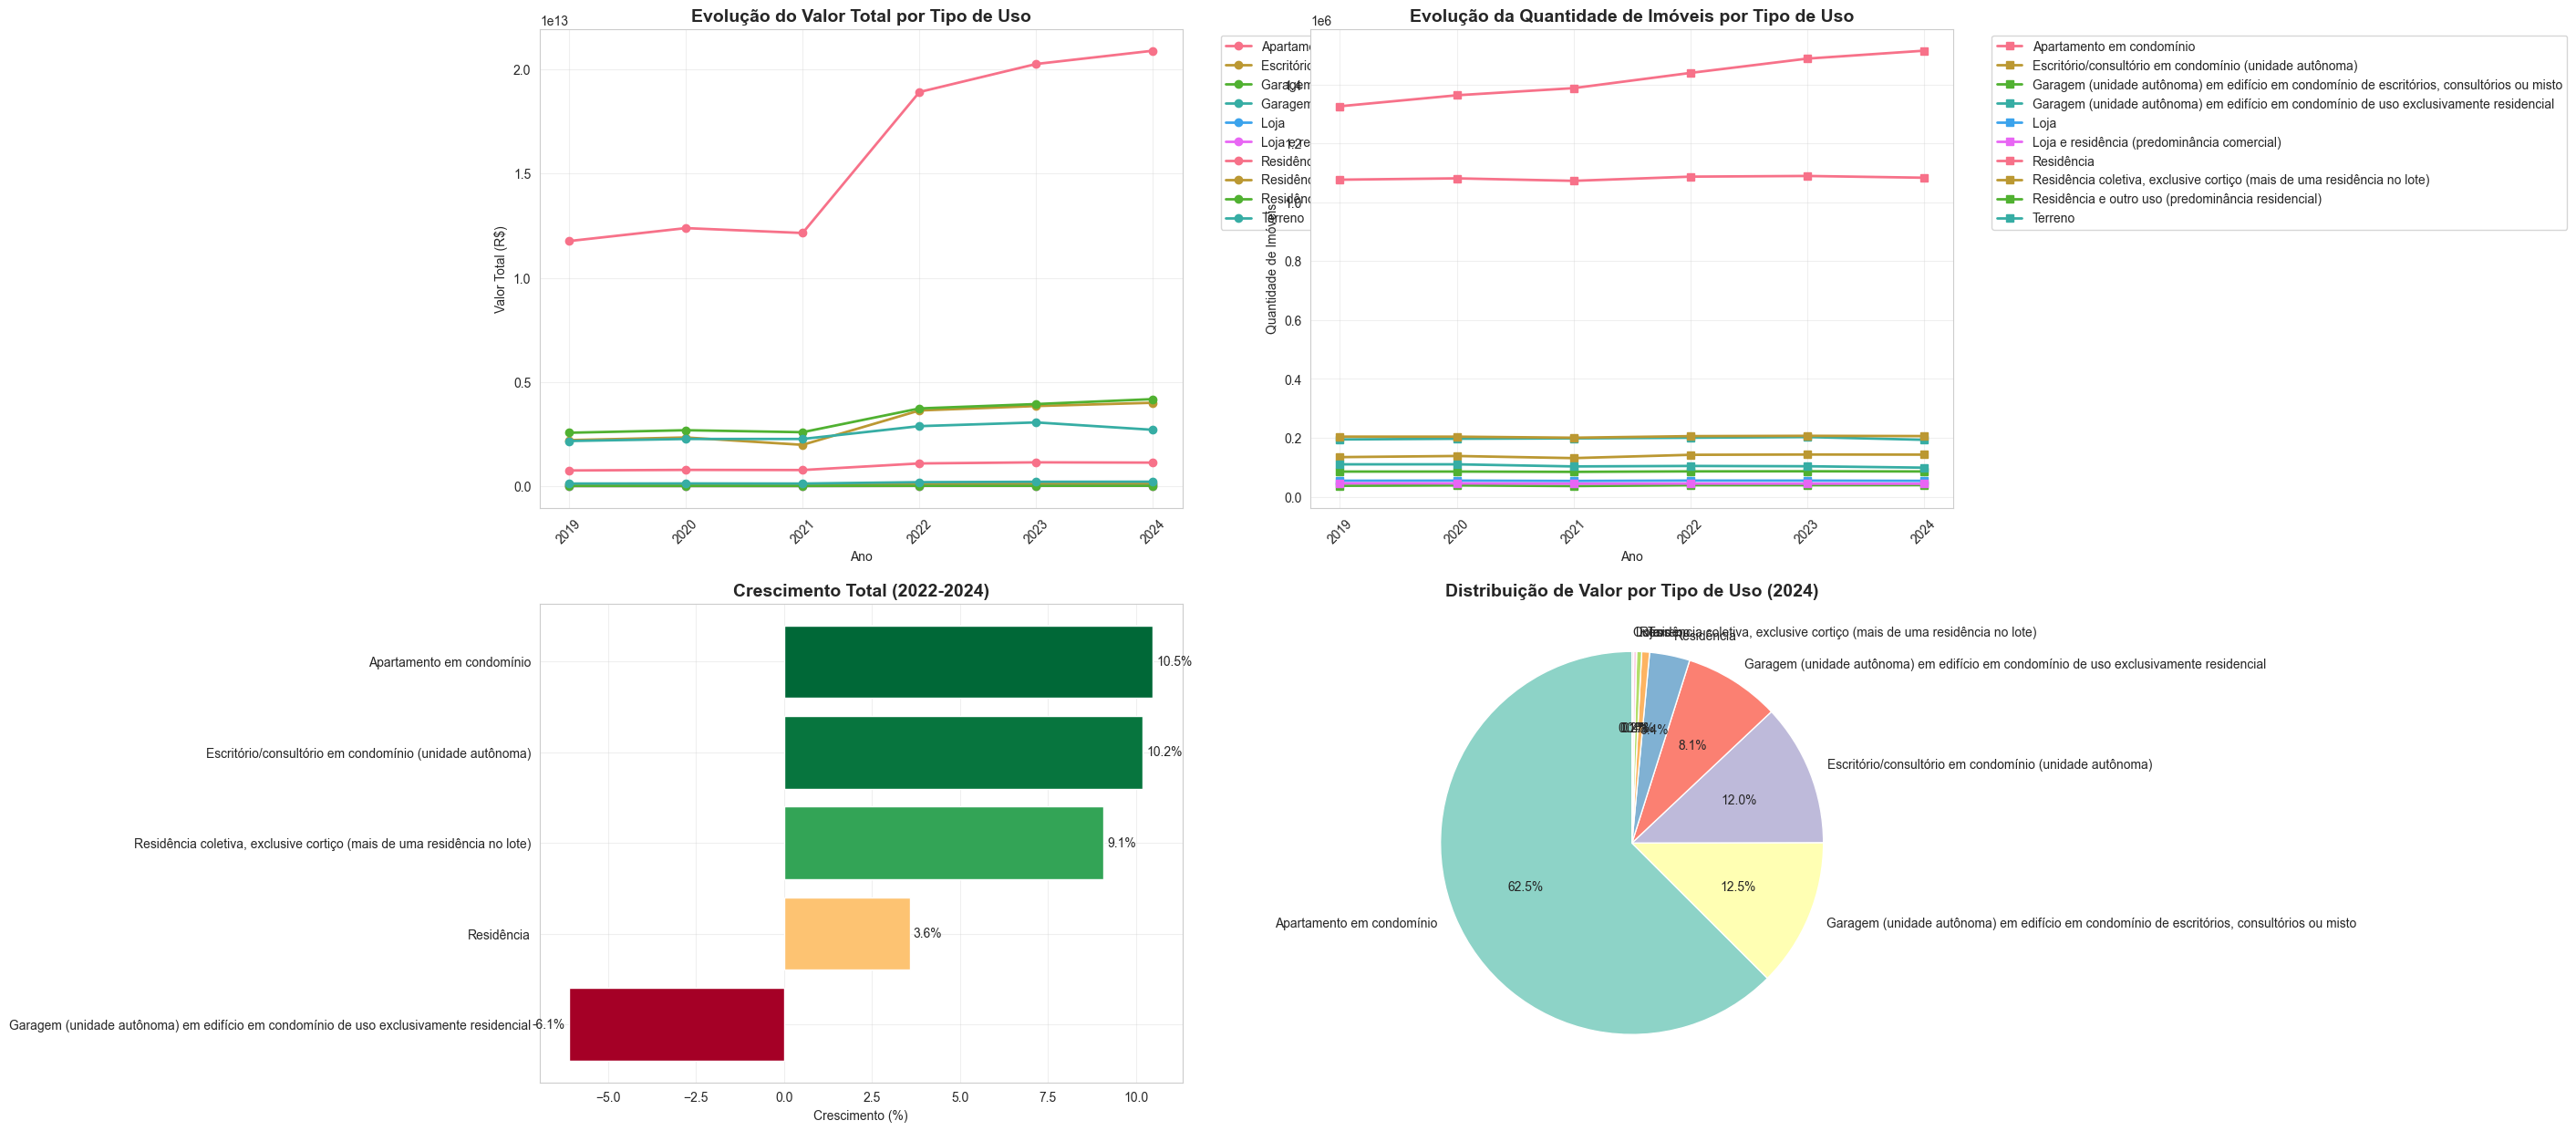


📊 ANÁLISE DE CORRELAÇÃO:

Correlação entre quantidade de imóveis e valor total:


Tipo_Uso  Correlacao
0                          Apartamento em condomínio    0.951706
4  Escritório/consultório em condomínio (unidade ...    0.935946
1                                         Residência    0.854404
9  Garagem (unidade autônoma) em edifício em cond...    0.848384
2  Residência coletiva, exclusive cortiço (mais d...    0.797341
6  Residência e outro uso (predominância residenc...    0.772895
3  Garagem (unidade autônoma) em edifício em cond...    0.617229
7                                               Loja    0.332262
8        Loja e residência (predominância comercial)   -0.571256
5                                            Terreno   -0.712796

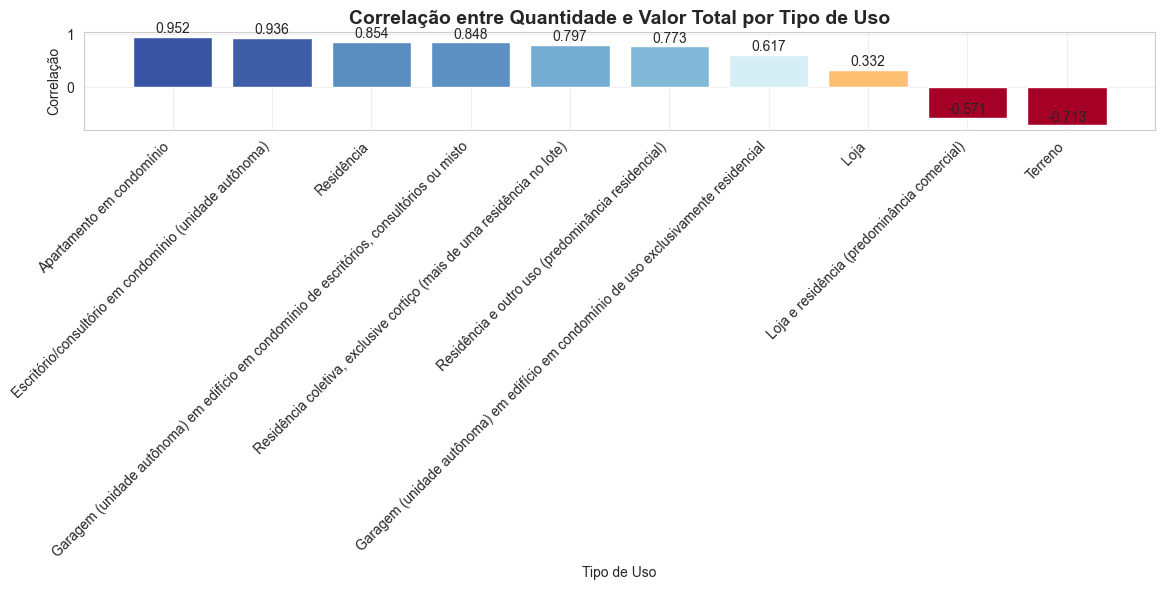


💾 Dados salvos em: dados_processados/arrecadacao_por_uso_ano.csv


In [ ]:
print('='*80)
print('ANÁLISE DE CRESCIMENTO DE ARRECADAÇÃO POR USO DO IMÓVEL'.center(80))
print('='*80)

# Verificar se as colunas necessárias existem
colunas_necessarias = ['ANO DO EXERCICIO', 'TIPO DE USO DO IMOVEL', 'VALOR DO M2 DO TERRENO', 'AREA DO TERRENO']
colunas_existentes = [col for col in colunas_necessarias if col in df_iptu.columns]

if len(colunas_existentes) == len(colunas_necessarias):
    print('\n✅ Todas as colunas necessárias encontradas!')
    
    # Criar DataFrame para análise
    df_arrecadacao = df_iptu[colunas_necessarias].copy()
    
    # Calcular valor total por imóvel (m² * valor do m²)
    df_arrecadacao['VALOR_TOTAL_TERRENO'] = df_arrecadacao['AREA DO TERRENO'] * df_arrecadacao['VALOR DO M2 DO TERRENO']
    
    # Remover registros com valores inválidos
    df_arrecadacao = df_arrecadacao.dropna()
    df_arrecadacao = df_arrecadacao[df_arrecadacao['VALOR_TOTAL_TERRENO'] > 0]
    
    print(f'\n📊 Registros válidos para análise: {len(df_arrecadacao):,}')
    
    # Análise por ano e tipo de uso
    arrecadacao_por_uso_ano = df_arrecadacao.groupby(['ANO DO EXERCICIO', 'TIPO DE USO DO IMOVEL']).agg({
        'VALOR_TOTAL_TERRENO': ['sum', 'mean', 'count'],
        'AREA DO TERRENO': 'sum',
        'VALOR DO M2 DO TERRENO': 'mean'
    }).round(2)
    
    # Flatten das colunas
    arrecadacao_por_uso_ano.columns = ['_'.join(col).strip() for col in arrecadacao_por_uso_ano.columns]
    arrecadacao_por_uso_ano = arrecadacao_por_uso_ano.reset_index()
    
    # Renomear colunas para facilitar
    arrecadacao_por_uso_ano.columns = ['Ano', 'Tipo_Uso', 'Valor_Total_Sum', 'Valor_Total_Mean', 'Quantidade', 'Area_Total', 'Valor_M2_Mean']
    
    print('\n📋 RESUMO POR ANO E TIPO DE USO:')
    display(arrecadacao_por_uso_ano.head(20))
    
    # Análise dos principais tipos de uso
    tipos_principais = df_arrecadacao['TIPO DE USO DO IMOVEL'].value_counts().head(10).index.tolist()
    print(f'\n🏢 Top 10 tipos de uso: {tipos_principais}')
    
    # Filtrar apenas os principais tipos
    df_principais = arrecadacao_por_uso_ano[arrecadacao_por_uso_ano['Tipo_Uso'].isin(tipos_principais)]
    
    # Calcular crescimento ano a ano
    print('\n📈 ANÁLISE DE CRESCIMENTO:')
    crescimento_por_tipo = {}
    
    for tipo in tipos_principais:
        df_tipo = df_principais[df_principais['Tipo_Uso'] == tipo].sort_values('Ano')
        if len(df_tipo) > 1:
            # Calcular crescimento percentual
            df_tipo['Crescimento_Valor'] = df_tipo['Valor_Total_Sum'].pct_change() * 100
            df_tipo['Crescimento_Quantidade'] = df_tipo['Quantidade'].pct_change() * 100
            df_tipo['Crescimento_Area'] = df_tipo['Area_Total'].pct_change() * 100
            
            crescimento_por_tipo[tipo] = df_tipo[['Ano', 'Valor_Total_Sum', 'Crescimento_Valor', 'Quantidade', 'Crescimento_Quantidade']].copy()
            
            print(f'\n{tipo}:')
            print(f'   Valor total: R$ {df_tipo["Valor_Total_Sum"].iloc[-1]:,.2f} (último ano)')
            print(f'   Quantidade: {df_tipo["Quantidade"].iloc[-1]:,} imóveis')
            if not df_tipo['Crescimento_Valor'].isna().all():
                crescimento_medio = df_tipo['Crescimento_Valor'].mean()
                print(f'   Crescimento médio anual: {crescimento_medio:.2f}%')
    
    # Visualizações
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    
    # 1. Evolução do valor total por tipo de uso
    pivot_valor = df_principais.pivot(index='Ano', columns='Tipo_Uso', values='Valor_Total_Sum')
    pivot_valor.plot(kind='line', ax=axes[0,0], marker='o', linewidth=2, markersize=6)
    axes[0,0].set_title('Evolução do Valor Total por Tipo de Uso', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Ano')
    axes[0,0].set_ylabel('Valor Total (R$)')
    axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. Evolução da quantidade de imóveis por tipo de uso
    pivot_quantidade = df_principais.pivot(index='Ano', columns='Tipo_Uso', values='Quantidade')
    pivot_quantidade.plot(kind='line', ax=axes[0,1], marker='s', linewidth=2, markersize=6)
    axes[0,1].set_title('Evolução da Quantidade de Imóveis por Tipo de Uso', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Ano')
    axes[0,1].set_ylabel('Quantidade de Imóveis')
    axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. Crescimento percentual por tipo de uso (últimos anos)
    anos_analise = sorted(df_principais['Ano'].unique())[-3:]  # Últimos 3 anos
    df_ultimos_anos = df_principais[df_principais['Ano'].isin(anos_analise)]
    
    # Calcular crescimento para os últimos anos
    crescimento_data = []
    for tipo in tipos_principais[:5]:  # Top 5 para não poluir o gráfico
        df_tipo = df_ultimos_anos[df_ultimos_anos['Tipo_Uso'] == tipo].sort_values('Ano')
        if len(df_tipo) > 1:
            crescimento = ((df_tipo['Valor_Total_Sum'].iloc[-1] - df_tipo['Valor_Total_Sum'].iloc[0]) / df_tipo['Valor_Total_Sum'].iloc[0]) * 100
            crescimento_data.append({'Tipo_Uso': tipo, 'Crescimento_%': crescimento})
    
    if crescimento_data:
        df_crescimento = pd.DataFrame(crescimento_data)
        df_crescimento = df_crescimento.sort_values('Crescimento_%', ascending=True)
        
        bars = axes[1,0].barh(df_crescimento['Tipo_Uso'], df_crescimento['Crescimento_%'], 
                              color=plt.cm.RdYlGn(df_crescimento['Crescimento_%'] / df_crescimento['Crescimento_%'].abs().max()))
        axes[1,0].set_title(f'Crescimento Total ({anos_analise[0]}-{anos_analise[-1]})', fontsize=14, fontweight='bold')
        axes[1,0].set_xlabel('Crescimento (%)')
        axes[1,0].grid(True, alpha=0.3)
        
        # Adicionar valores nas barras
        for i, bar in enumerate(bars):
            width = bar.get_width()
            axes[1,0].text(width + (0.1 if width >= 0 else -0.1), bar.get_y() + bar.get_height()/2, 
                          f'{width:.1f}%', ha='left' if width >= 0 else 'right', va='center')
    
    # 4. Distribuição de valor por tipo de uso (último ano)
    ultimo_ano = df_principais['Ano'].max()
    df_ultimo_ano = df_principais[df_principais['Ano'] == ultimo_ano]
    
    # Top 8 tipos para o gráfico de pizza
    top_8_ultimo = df_ultimo_ano.nlargest(8, 'Valor_Total_Sum')
    outros_valor = df_ultimo_ano[~df_ultimo_ano['Tipo_Uso'].isin(top_8_ultimo['Tipo_Uso'])]['Valor_Total_Sum'].sum()
    
    if outros_valor > 0:
        top_8_ultimo = pd.concat([top_8_ultimo, pd.DataFrame([{
            'Tipo_Uso': 'Outros', 'Valor_Total_Sum': outros_valor
        }])], ignore_index=True)
    
    axes[1,1].pie(top_8_ultimo['Valor_Total_Sum'], labels=top_8_ultimo['Tipo_Uso'], 
                  autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3(range(len(top_8_ultimo))))
    axes[1,1].set_title(f'Distribuição de Valor por Tipo de Uso ({ultimo_ano})', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Análise de correlação entre crescimento de quantidade e valor
    print('\n📊 ANÁLISE DE CORRELAÇÃO:')
    correlacoes = []
    for tipo in tipos_principais:
        df_tipo = df_principais[df_principais['Tipo_Uso'] == tipo].sort_values('Ano')
        if len(df_tipo) > 2:
            corr = df_tipo['Quantidade'].corr(df_tipo['Valor_Total_Sum'])
            correlacoes.append({'Tipo_Uso': tipo, 'Correlacao': corr})
    
    if correlacoes:
        df_corr = pd.DataFrame(correlacoes).sort_values('Correlacao', ascending=False)
        print('\nCorrelação entre quantidade de imóveis e valor total:')
        display(df_corr)
        
        # Gráfico de correlação
        plt.figure(figsize=(12, 6))
        bars = plt.bar(df_corr['Tipo_Uso'], df_corr['Correlacao'], 
                       color=plt.cm.RdYlBu(df_corr['Correlacao']))
        plt.title('Correlação entre Quantidade e Valor Total por Tipo de Uso', fontsize=14, fontweight='bold')
        plt.xlabel('Tipo de Uso')
        plt.ylabel('Correlação')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        
        # Adicionar valores nas barras
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, 
                    f'{height:.3f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
    
    # Salvar dados processados
    output_dir = 'dados_processados'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    arrecadacao_por_uso_ano.to_csv(f'{output_dir}/arrecadacao_por_uso_ano.csv', index=False)
    print(f'\n💾 Dados salvos em: {output_dir}/arrecadacao_por_uso_ano.csv')
    
else:
    print('\n❌ Colunas necessárias não encontradas!')
    print(f'Colunas existentes: {df_iptu.columns.tolist()}')
    print(f'Colunas necessárias: {colunas_necessarias}')

## 15. Análise Comparativa ITBI vs IPTU - Valores de Mercado vs Valores Estimados

Esta seção realiza uma análise abrangente que relaciona os valores de transação imobiliária (ITBI) com os valores estimados pela prefeitura (IPTU), identificando divergências entre valores reais de transação (VALOR REAL calculado) e valores venais estimados (IPTU).

### Objetivos:
- **Identificar divergências sistemáticas**: Comparar valores reais de transação do ITBI com valores venais estimados pelo IPTU
- **Análise geográfica**: Avaliar padrões de divergência por bairro e setor urbano
- **Análise temporal**: Investigar a evolução temporal das divergências entre valores reais e estimados
- **Identificar outliers**: Detectar transações com anomalias significativas nos valores
- **Análise por faixas de valor**: Avaliar como as divergências variam conforme faixas de valor do imóvel
- **Métricas estatísticas**: Calcular desvios médios, percentuais, e outras métricas descritivas para quantificar as divergências

### Metodologia:
1. **Filtros aplicados aos dados ITBI**:
   - Apenas registros com 'Proporção Transmitida (%)' > 1 (transações completas ou parciais do imóvel)
   - Cálculo de 'VALOR REAL' = (Base de Cálculo adotada / Proporção Transmitida (%) * 100)
   - Apenas registros com 'VALOR REAL' > 1 após cálculo

2. **Relacionamento dos datasets**:
   - Merge 1:N entre ITBI e IPTU usando 'N° do Cadastro (SQL)' + 'Ano da Transacao' ↔ 'NUMERO DO CONTRIBUINTE' + 'ANO DO EXERCICIO'

3. **Métricas estatísticas calculadas**:
   - Desvio médio absoluto (MAD)
   - Desvio percentual médio
   - Coeficiente de correlação
   - Razão entre valor real e venal
   - Identificação de outliers usando IQR (Interquartile Range)

4. **Análises realizadas**:
   - **Geográfica**: Agregação por bairro e setor, identificando áreas com maiores divergências
   - **Temporal**: Evolução anual/mensal das divergências médias
   - **Por faixas de valor**: Análise da divergência conforme faixas de VALOR REAL
   - **Outliers**: Detecção de valores extremos que indicam possíveis erros ou anomalias

In [ ]:
df_iptu["NUMERO DO CONTRIBUINTE"] = df_iptu["NUMERO DO CONTRIBUINTE"].astype("object")
df_iptu["ANO DO EXERCICIO"] = df_iptu["ANO DO EXERCICIO"].astype("object")

In [ ]:
df_itbi['N° do Cadastro (SQL)'] = df_itbi['N° do Cadastro (SQL)'].astype("object")
df_itbi['Ano da Transacao'] = df_itbi['Ano da Transacao'].astype("object")

In [ ]:
df_itbi = df_itbi[df_itbi['Proporção Transmitida (%)'] > 1]

In [ ]:
df_itbi['VALOR REAL'] = df_itbi.apply(lambda row: row['Base de Cálculo adotada'] / row['Proporção Transmitida (%)'] * 100, axis=1)
df_itbi = df_itbi[df_itbi['VALOR REAL'] > 1]

   ANÁLISE COMPARATIVA ITBI vs IPTU - VALORES DE MERCADO vs VALORES ESTIMADOS   
           ANÁLISE COMPARATIVA ITBI vs IPTU - VALORES REAIS vs VENAIS           

🔍 ETAPA 1: PREPARAÇÃO E FILTROS DOS DADOS ITBI

📋 Colunas ITBI disponíveis: ['N° do Cadastro (SQL)', 'Natureza de Transação', 'Valor de Transação (declarado pelo contribuinte)', 'Data de Transação', 'Valor Venal de Referência', 'Proporção Transmitida (%)', 'Valor Venal de Referência (proporcional)', 'Base de Cálculo adotada', 'Tipo de Financiamento', 'Valor Financiado', 'Situação do SQL', 'Ano da Transacao', 'Mes da Transacao', 'Ano/Mes da Transacao', 'setor', 'quadra', 'lote', 'bairro', 'VALOR REAL']
📋 Colunas IPTU disponíveis: ['NUMERO DO CONTRIBUINTE', 'ANO DO EXERCICIO', 'NOME DE LOGRADOURO DO IMOVEL', 'NUMERO DO IMOVEL', 'AREA DO TERRENO', 'AREA CONSTRUIDA', 'AREA OCUPADA', 'VALOR DO M2 DO TERRENO', 'VALOR DO M2 DE CONSTRUCAO', 'TIPO DE USO DO IMOVEL', 'TIPO DE PADRAO DA CONSTRUCAO', 'VALOR VENAL']

🔹 Filtrando registros

Count  Div_Media  Div_Mediana  Div_Std  DivAbs_Mean  \
bairro                                                                 
SAUDE            29713     133.24        54.06   618.77   1523340.93   
TATUAPE          24923     121.96        49.59   622.40   1073907.69   
SANTO AMARO      23171     114.82        65.25   451.60    976770.47   
BUTANTA          22308     102.54        62.22   361.80   1812436.50   
CERQUEIRA CESAR  21370     102.26        55.15   352.24   1186751.34   
INDIANOPOLIS     19770     200.57        57.90  1012.33   4633942.37   
PERDIZES         18131     207.50        63.66   994.39   2562661.45   
PINHEIROS        17377     196.17        67.42   912.39   5252229.02   
BELA VISTA       16820     112.74        54.59   349.77   1253076.81   
BROOKLIN         16516     137.90        55.54   808.31   2378697.27   
MORUMBI          15577      92.27        50.02   708.90    354673.75   
LAPA             14865     201.99        63.43  1429.50   2118131.24   
SANTA CECILIA    14706     123.11        66.58   463.69    875730.88   
SANTANA          14580     211.19        45.20   969.77   1440670.73   
IPIRANGA         13325     100.39        65.97   269.09    353855.29   

                 Razao_Media  ValorReal_Mean  ValorReal_Mediana  \
bairro                                                            
SAUDE                   2.33      2187483.67          502900.00   
TATUAPE                 2.22      1840063.97          506912.50   
SANTO AMARO             2.15      1730143.81          560000.00   
BUTANTA                 2.03      2414443.96          441611.50   
CERQUEIRA CESAR         2.02      2059575.35          543718.00   
INDIANOPOLIS            3.01      5719638.41          761797.26   
PERDIZES                3.08      3222207.11          662071.00   
PINHEIROS               2.96      6932931.93          806336.00   
BELA VISTA              2.13      1913462.37          370000.00   
BROOKLIN                2.38      3886722.83          745000.00   
MORUMBI                 1.92       738116.87          449255.40   
LAPA                    3.02      2842445.63          713202.00   
SANTA CECILIA           2.23      1558458.19          414036.00   
SANTANA                 3.11      2027767.15          518403.02   
IPIRANGA                2.00       775894.59          410000.00   

                 ValorVenal_Mean  ValorVenal_Mediana  
bairro                                                
SAUDE                  664142.74           306138.90  
TATUAPE                766156.28           311436.80  
SANTO AMARO            753373.34           309671.50  
BUTANTA                602007.47           263958.55  
CERQUEIRA CESAR        872824.01           346466.61  
INDIANOPOLIS          1085696.03           430825.23  
PERDIZES               659545.67           375007.57  
PINHEIROS             1680702.91           446428.47  
BELA VISTA             660385.56           224817.55  
BROOKLIN              1508025.55           420828.99  
MORUMBI                383443.12           278312.17  
LAPA                   724314.39           397685.57  
SANTA CECILIA          682727.31           231735.89  
SANTANA                587096.42           330505.00  
IPIRANGA               422039.31           231355.84


   Top 10 bairros com MAIOR superavaliação (Valor Real > Venal):


Count  Div_Media  Div_Mediana  Div_Std  DivAbs_Mean  \
bairro                                                                     
C H BRIG ED GOMES      183     857.63       361.57  3074.42    242097.49   
VL IOLANDA             297     711.43       148.03  1116.85   4934351.02   
JARDIM ALADIM           21     556.01       249.78   570.38    137390.94   
JD CAPELA II            11     469.33       116.30   628.56     94767.72   
VL MADALENA           7132     432.33        72.19  2401.93   5618332.41   
CIDADE A E CARVALHO   1245     409.68        75.94  1351.23   1070427.30   
JD NOVO HORIZONTE      177     408.37       150.18   596.13     84225.11   
JD ZILDA               127     398.61       159.37   569.36    159459.81   
VILA MARIANA          9534     363.87        55.29  2213.32   4990855.73   
CIDADE JARDIM          608     327.90        42.25  1440.45  10672305.24   

                     Razao_Media  ValorReal_Mean  ValorReal_Mediana  \
bairro                                                                
C H BRIG ED GOMES           9.58       276437.94           160000.0   
VL IOLANDA                  8.11      5223134.34           240000.0   
JARDIM ALADIM               6.56       203285.17           200000.0   
JD CAPELA II                5.69       264935.00           250000.0   
VL MADALENA                 5.32      6508450.86           960000.0   
CIDADE A E CARVALHO         5.10      1349048.09           293116.0   
JD NOVO HORIZONTE           5.08       136292.82           100000.0   
JD ZILDA                    4.99       262923.40           230000.0   
VILA MARIANA                4.64      5872281.10           709533.0   
CIDADE JARDIM               4.28     14128364.30          3910076.5   

                     ValorVenal_Mean  ValorVenal_Mediana  
bairro                                                    
C H BRIG ED GOMES           34340.45            22726.72  
VL IOLANDA                 288783.32           119998.71  
JARDIM ALADIM               65894.22            37341.50  
JD CAPELA II               170167.28            52636.00  
VL MADALENA                890118.45           530280.71  
CIDADE A E CARVALHO        278620.78           147081.56  
JD NOVO HORIZONTE           52067.71            32625.00  
JD ZILDA                   103463.59            63919.60  
VILA MARIANA               881425.36           410584.60  
CIDADE JARDIM             3456059.06          2564376.34


   Top 10 bairros com MAIOR subavaliação (Valor Real < Venal):


Count  Div_Media  Div_Mediana  Div_Std  DivAbs_Mean  \
bairro                                                                        
LAGOA GRANDE                4     -22.59       -19.64    58.98   -133618.68   
PRQ FLORESTAL               3      28.34        28.35     0.02     92896.26   
JD ORIENTAL                16      28.80        28.57    45.66    -36066.93   
BALNEARIO ST AGOSTINHO      3      36.96        28.44    14.76     86372.83   
COCAIA                      7      37.27        28.93    14.74     50675.07   
JD S FRANCISCO            103      38.89        30.12    18.67     62550.59   
VL YOLANDA                 66      39.06        28.55    25.85     62455.81   
JD DOS EUCALIPTOS           6      39.71        39.21    12.43     89392.76   
JD BORBA GATO               7      42.44        50.88    11.52     44445.98   
JARDIM MAR LUNE             6      44.22        40.03    19.57     41177.25   

                        Razao_Media  ValorReal_Mean  ValorReal_Mediana  \
bairro                                                                   
LAGOA GRANDE                   0.77       527084.75          418288.00   
PRQ FLORESTAL                  1.28       420713.66          380645.98   
JD ORIENTAL                    1.29        96371.00           43960.00   
BALNEARIO ST AGOSTINHO         1.37       376093.00          484445.00   
COCAIA                         1.37       202560.86          150000.00   
JD S FRANCISCO                 1.39       244272.90          231701.00   
VL YOLANDA                     1.39       239058.17          243666.00   
JD DOS EUCALIPTOS              1.40       378908.50          350148.50   
JD BORBA GATO                  1.42       170413.57          103671.00   
JARDIM MAR LUNE                1.44       161354.83          148500.00   

                        ValorVenal_Mean  ValorVenal_Mediana  
bairro                                                       
LAGOA GRANDE                  660703.43           654958.95  
PRQ FLORESTAL                 327817.40           296656.79  
JD ORIENTAL                   132437.93            34230.00  
BALNEARIO ST AGOSTINHO        289720.17           377225.71  
COCAIA                        151885.78            97072.40  
JD S FRANCISCO                181722.31           172623.99  
VL YOLANDA                    176602.35           168422.96  
JD DOS EUCALIPTOS             289515.74           265783.03  
JD BORBA GATO                 125967.59            68712.00  
JARDIM MAR LUNE               120177.58           106649.67


🔍 ETAPA 7: ANÁLISE GEOGRÁFICA POR SETOR

📊 ANÁLISE POR SETOR:

   Top 15 setores por volume de transações:


Count  Div_Media  Div_Mediana  Div_Std  Razao_Media  ValorReal_Mean
setor                                                                     
85     16516     137.90        55.54   808.31         2.38      3886722.83
41     14449     215.41        59.81  1061.35         3.15      6737832.07
10     13806     100.43        54.75   354.32         2.00      1495314.57
299    10831     137.26        55.36   542.26         2.37      6574286.35
171    10803      99.85        54.32   812.35         2.00       760104.95
87     10466      95.34        62.19   319.01         1.95      1837180.54
86      9498     160.73        59.33   926.73         2.61      4420863.73
9       9407     104.82        54.24   388.32         2.05      3067972.05
54      9253      72.11        42.73   332.95         1.72      1665231.00
16      9156     137.37        59.73   674.28         2.37      4388447.28
101     8337     106.97        56.43   397.47         2.07      2669536.54
7       8138     138.15        75.43   469.56         2.38      1288518.62
89      7892     166.81        61.10   922.83         2.67      1577273.94
90      7805     142.32        66.70   535.40         2.42      1404548.39
47      7776     133.19        50.54   529.68         2.33      1624771.47


   Top 10 setores com MAIOR superavaliação:


Count  Div_Media  Div_Mediana  Div_Std  Razao_Media  ValorReal_Mean
setor                                                                     
215      183     857.63       361.57  3074.42         9.58       276437.94
193      297     711.43       148.03  1116.85         8.11      5223134.34
273       21     556.01       249.78   570.38         6.56       203285.17
200      518     531.66        65.16  1529.39         6.32     40595103.87
254       11     469.33       116.30   628.56         5.69       264935.00
81      7132     432.33        72.19  2401.93         5.32      6508450.86
142     1245     409.68        75.94  1351.23         5.10      1349048.09
267      177     408.37       150.18   596.13         5.08       136292.82
261      127     398.61       159.37   569.36         4.99       262923.40
37      5210     375.43        71.77  1744.99         4.75      6985078.96


🔍 ETAPA 8: ANÁLISE TEMPORAL

📅 EVOLUÇÃO ANUAL DAS DIVERGÊNCIAS:


Count  Div_Media  Div_Mediana  Div_Std  DivAbs_Mean  \
Ano da Transacao                                                         
2019               93968     112.97        67.65   377.68    501050.16   
2020               95657     128.74        73.01   531.42    564392.32   
2021              133034     193.12        86.82   969.65   1476404.87   
2022              113614     151.20        42.97   933.76   1868318.27   
2023              110889     133.80        40.97   691.91   1757535.97   
2024              123105     130.12        45.20   629.85   1954334.69   

                  Razao_Media  ValorReal_Mean  ValorVenal_Mean  
Ano da Transacao                                                
2019                     2.13      1008231.66        507181.50  
2020                     2.29      1034656.59        470264.27  
2021                     2.93      1975779.32        499374.45  
2022                     2.51      2634521.99        766203.73  
2023                     2.34      2603965.69        846429.73  
2024                     2.30      2775991.80        821657.11


💾 Gráfico temporal salvo em: dados_processados/evolucao_temporal_divergencias.png


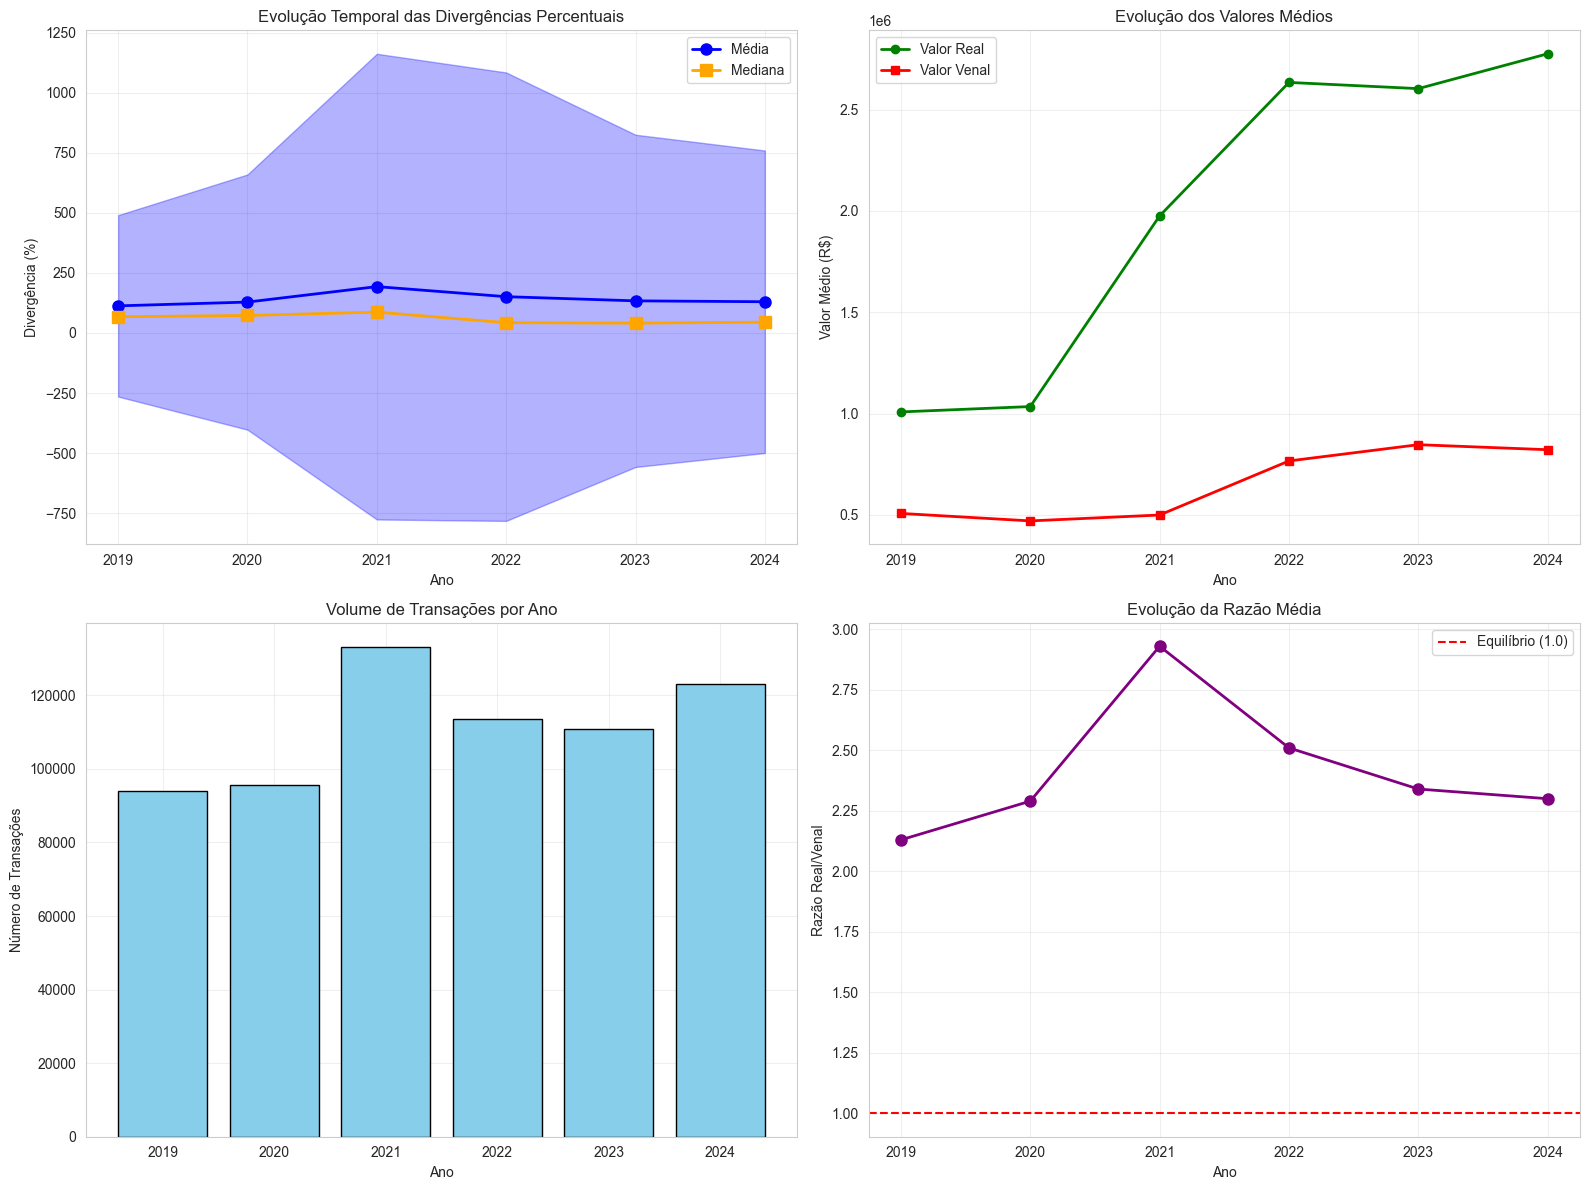


🔍 ETAPA 9: ANÁLISE POR FAIXAS DE VALOR

📊 ANÁLISE POR FAIXAS DE VALOR REAL:


Count  Div_Media  Div_Mediana  Div_Std  DivAbs_Mean  \
FAIXA_VALOR                                                          
1. 0-100k      43249      64.64        43.40   230.12     -3162.90   
2. 100k-200k   57256      75.63        47.70   106.91     44138.97   
3. 200k-300k  106225      87.90        58.12    99.60     86419.31   
4. 300k-400k  101618      86.08        59.60    99.31    131568.66   
5. 400k-500k   71201      86.97        64.05    88.00    174697.50   
6. 500k-1M    152580      88.14        67.96    94.79    272922.87   
7. 1M-5M      110579     127.61        77.46   269.96    864239.68   
8. 5M+         27559    1367.67       234.18  3347.21  27963339.02   

              Razao_Media  ValorReal_Mean  ValorVenal_Mean  
FAIXA_VALOR                                                 
1. 0-100k            1.65        62250.10         65413.01  
2. 100k-200k         1.76       150846.62        106707.65  
3. 200k-300k         1.88       249750.85        163331.54  
4. 300k-400k         1.86       344025.39        212456.73  
5. 400k-500k         1.87       442293.10        267595.60  
6. 500k-1M           1.88       685644.24        412721.37  
7. 1M-5M             2.28      1940545.11       1076305.43  
8. 5M+              14.68     34938087.60       6974748.58


💾 Gráfico de faixas salvo em: dados_processados/divergencias_por_faixa_valor.png


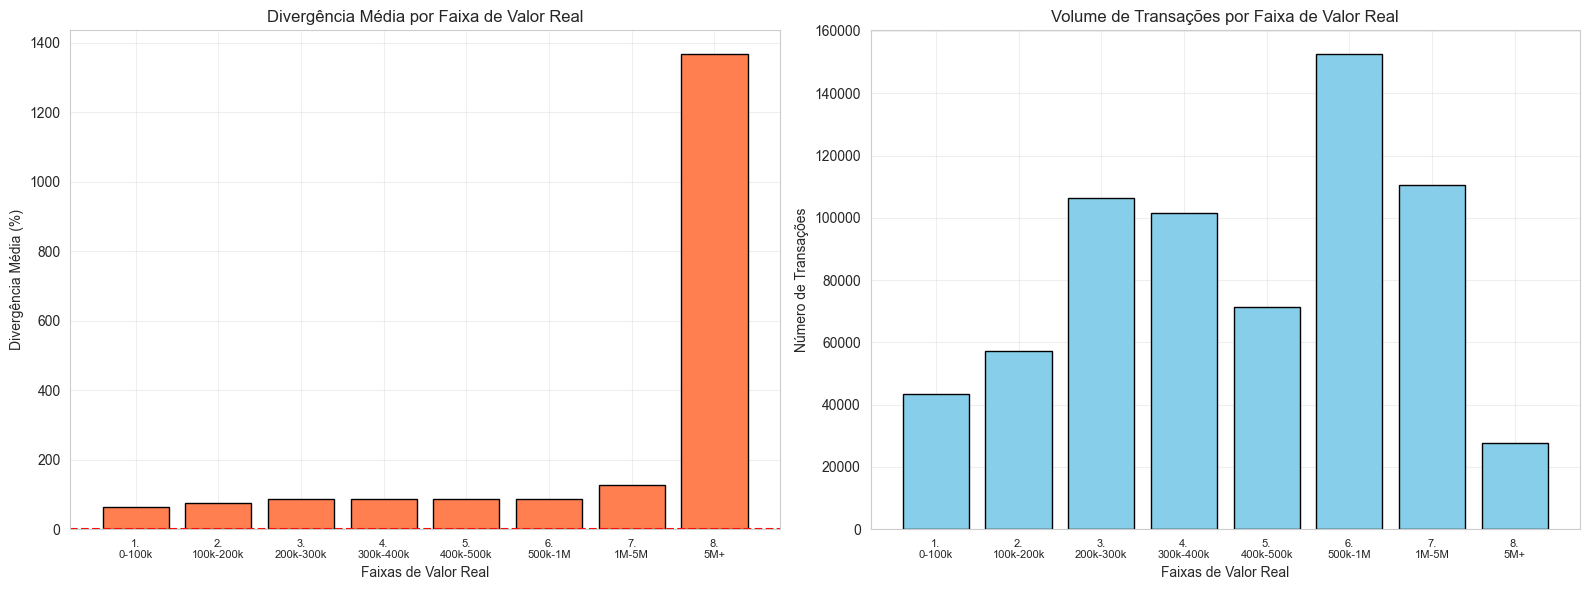


🔍 ETAPA 10: DETECÇÃO DE OUTLIERS

📊 DETECÇÃO DE OUTLIERS (Método IQR):
   Limite inferior: -87.15%
   Limite superior: 236.66%
   Total de outliers detectados: 50,274 (7.50%)

   Outliers - Estatísticas:
      Média: 1034.27%
      Mínimo: -100.00%
      Máximo: 81728.85%

   Top 10 Maiores Superavaliações:


VALOR REAL   VALOR VENAL  DIVERGENCIA_PERCENTUAL
296126  2.067979e+08  2.527200e+05            81728.854859
115487  2.684564e+07  4.112614e+04            65176.328681
235994  2.229698e+06  3.995564e+03            55704.328861
294312  2.377049e+07  4.970311e+04            47724.956601
506415  2.833714e+08  6.115242e+05            46238.548473
249730  3.870968e+07  8.971499e+04            43047.389884
333870  1.880000e+07  4.672159e+04            40138.358761
305328  1.144578e+07  2.851172e+04            40044.137318
293729  4.126984e+08  1.035950e+06            39737.692171
255481  4.137920e+08  1.112343e+06            37100.035392


   Top 10 Maiores Subavaliações:


VALOR REAL   VALOR VENAL  DIVERGENCIA_PERCENTUAL
645445     2.000000  1.607554e+06              -99.999876
645446     2.000000  1.607554e+06              -99.999876
655950     2.000000  1.607554e+06              -99.999876
655951     2.000000  1.607554e+06              -99.999876
655952     2.000000  1.607554e+06              -99.999876
645959     2.000000  6.204414e+05              -99.999678
645960     2.000000  6.204414e+05              -99.999678
9859       1.530153  3.405293e+05              -99.999551
524042  1896.000000  1.317061e+07              -99.985604
633755   953.360000  5.751705e+06              -99.983425


🔍 ETAPA 11: VISUALIZAÇÕES GERAIS

💾 Gráfico completo salvo em: dados_processados/analise_comparativa_completa.png


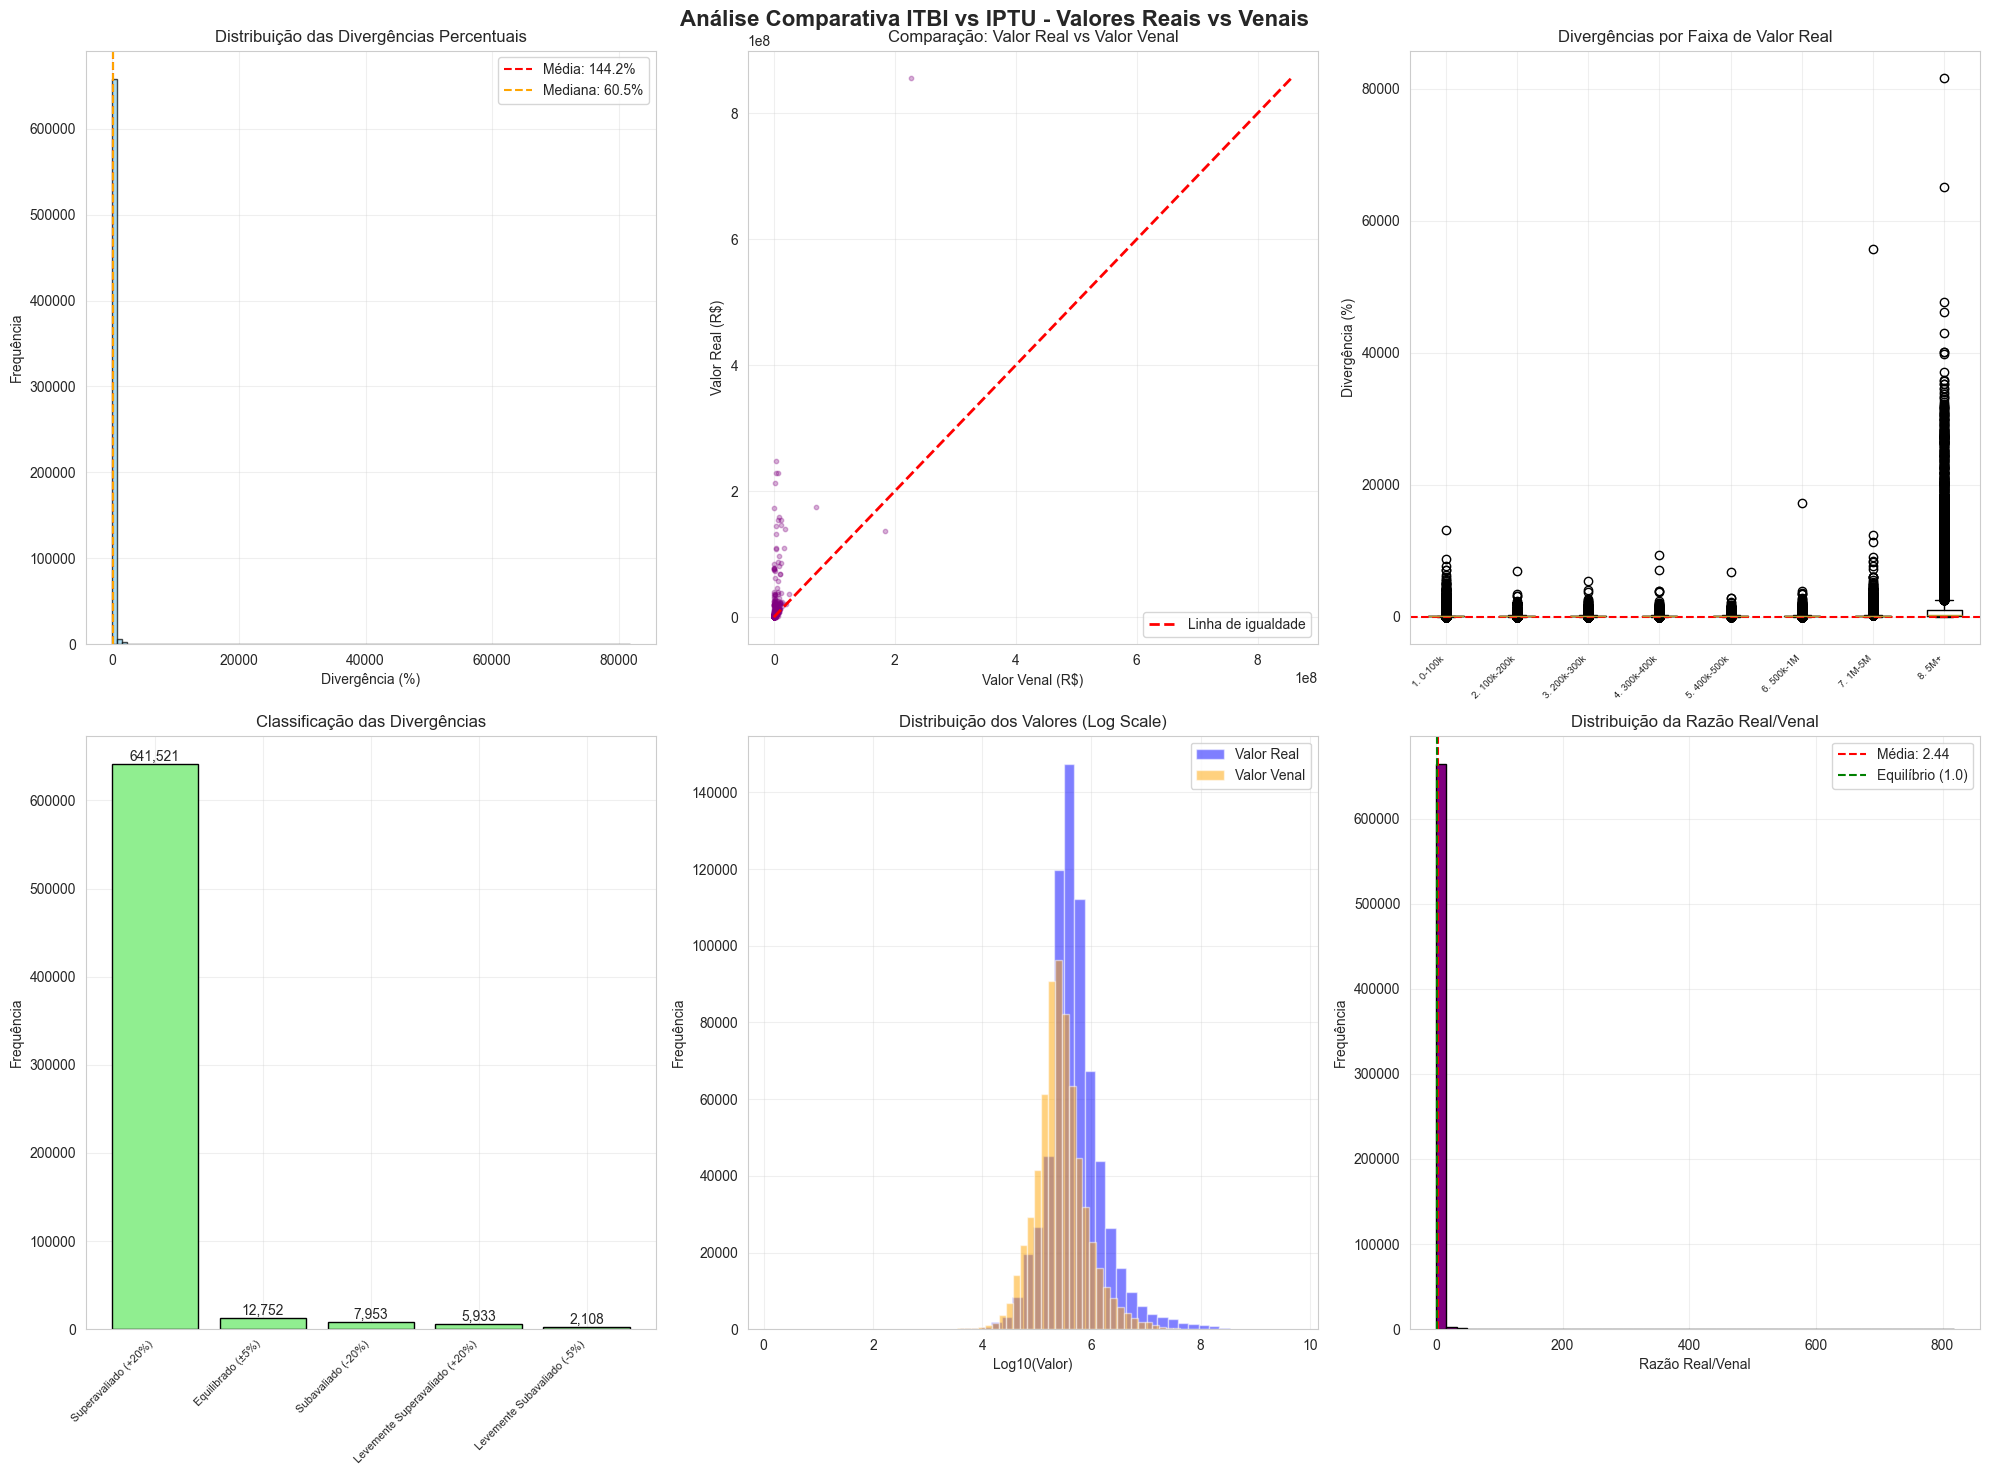


🔍 ETAPA 12: SALVAMENTO DOS RESULTADOS
✅ Dataset completo salvo em: dados_processados/dataset_completo_itbi_iptu.csv
✅ Análise por bairro salva em: dados_processados/analise_por_bairro.csv
✅ Análise por setor salva em: dados_processados/analise_por_setor.csv
✅ Análise temporal salva em: dados_processados/analise_temporal.csv
✅ Análise por faixa salva em: dados_processados/analise_por_faixa_valor.csv
✅ Outliers detectados salvos em: dados_processados/outliers_detectados.csv

                 ✅ ANÁLISE COMPARATIVA ITBI vs IPTU CONCLUÍDA!                  


In [ ]:
# 14. ANÁLISE COMPARATIVA ITBI vs IPTU
print('='*80)
print('ANÁLISE COMPARATIVA ITBI vs IPTU - VALORES DE MERCADO vs VALORES ESTIMADOS'.center(80))
print('='*80)

# Verificar colunas de relacionamento
# ============================================================================
# ANÁLISE COMPARATIVA ITBI vs IPTU - ANÁLISE COMPLETA
# ============================================================================

print('='*80)
print('ANÁLISE COMPARATIVA ITBI vs IPTU - VALORES REAIS vs VENAIS'.center(80))
print('='*80)

# ----------------------------------------------------------------------------
# 1. PREPARAÇÃO E FILTROS DOS DADOS ITBI
# ----------------------------------------------------------------------------

print('\n🔍 ETAPA 1: PREPARAÇÃO E FILTROS DOS DADOS ITBI')

# Verificar colunas existentes
print(f'\n📋 Colunas ITBI disponíveis: {list(df_itbi.columns)}')
print(f'📋 Colunas IPTU disponíveis: {list(df_iptu.columns)}')

# Filtro 1: Apenas registros com 'Proporção Transmitida (%)' > 1
print('\n🔹 Filtrando registros com Proporção Transmitida (%) > 1...')
count_before = len(df_itbi)
df_itbi_filtered = df_itbi[df_itbi['Proporção Transmitida (%)'] > 1].copy()
print(f'   Registros antes do filtro: {count_before:,}')
print(f'   Registros após filtro: {len(df_itbi_filtered):,}')
print(f'   Registros removidos: {count_before - len(df_itbi_filtered):,} ({(count_before - len(df_itbi_filtered))/count_before*100:.2f}%)')

# Cálculo do VALOR REAL
print('\n🔹 Calculando VALOR REAL...')
df_itbi_filtered['VALOR REAL'] = df_itbi_filtered.apply(
    lambda row: row['Base de Cálculo adotada'] / row['Proporção Transmitida (%)'] * 100, 
    axis=1
)

# Filtro 2: Apenas registros com 'VALOR REAL' > 1
count_before_valor = len(df_itbi_filtered)
df_itbi_filtered = df_itbi_filtered[df_itbi_filtered['VALOR REAL'] > 1].copy()
print(f'\n   Registros antes do filtro VALOR REAL > 1: {count_before_valor:,}')
print(f'   Registros após filtro: {len(df_itbi_filtered):,}')
print(f'   Registros removidos: {count_before_valor - len(df_itbi_filtered):,} ({(count_before_valor - len(df_itbi_filtered))/count_before_valor*100:.2f}%)')

# Estatísticas do VALOR REAL
print(f'\n📊 ESTATÍSTICAS DO VALOR REAL (ITBI):')
print(f'   Total de registros válidos: {len(df_itbi_filtered):,}')
print(f'   Valor mínimo: R$ {df_itbi_filtered["VALOR REAL"].min():,.2f}')
print(f'   Valor máximo: R$ {df_itbi_filtered["VALOR REAL"].max():,.2f}')
print(f'   Valor médio: R$ {df_itbi_filtered["VALOR REAL"].mean():,.2f}')
print(f'   Valor mediano: R$ {df_itbi_filtered["VALOR REAL"].median():,.2f}')
print(f'   Desvio padrão: R$ {df_itbi_filtered["VALOR REAL"].std():,.2f}')

# ----------------------------------------------------------------------------
# 2. PREPARAÇÃO DOS DADOS IPTU
# ----------------------------------------------------------------------------

print('\n🔍 ETAPA 2: PREPARAÇÃO DOS DADOS IPTU')

# Garantir que VALOR VENAL existe e é numérico
if 'VALOR VENAL' in df_iptu.columns:
    df_iptu['VALOR VENAL'] = pd.to_numeric(df_iptu['VALOR VENAL'], errors='coerce')
    
    # Remover registros com VALOR VENAL inválido
    df_iptu_filtered = df_iptu[df_iptu['VALOR VENAL'].notna() & (df_iptu['VALOR VENAL'] > 0)].copy()
    
    print(f'\n📊 ESTATÍSTICAS DO VALOR VENAL (IPTU):')
    print(f'   Total de registros válidos: {len(df_iptu_filtered):,}')
    print(f'   Valor mínimo: R$ {df_iptu_filtered["VALOR VENAL"].min():,.2f}')
    print(f'   Valor máximo: R$ {df_iptu_filtered["VALOR VENAL"].max():,.2f}')
    print(f'   Valor médio: R$ {df_iptu_filtered["VALOR VENAL"].mean():,.2f}')
    print(f'   Valor mediano: R$ {df_iptu_filtered["VALOR VENAL"].median():,.2f}')
    print(f'   Desvio padrão: R$ {df_iptu_filtered["VALOR VENAL"].std():,.2f}')
else:
    print('\n❌ Coluna VALOR VENAL não encontrada no IPTU!')
    df_iptu_filtered = df_iptu.copy()

# ----------------------------------------------------------------------------
# 3. REALIZAÇÃO DO MERGE
# ----------------------------------------------------------------------------

print('\n🔍 ETAPA 3: REALIZAÇÃO DO MERGE')

# Garantir tipos corretos para o merge
df_itbi_filtered['N° do Cadastro (SQL)'] = df_itbi_filtered['N° do Cadastro (SQL)'].astype(str)
df_itbi_filtered['Ano da Transacao'] = df_itbi_filtered['Ano da Transacao'].astype(str)

df_iptu_filtered['NUMERO DO CONTRIBUINTE'] = df_iptu_filtered['NUMERO DO CONTRIBUINTE'].astype(str)
df_iptu_filtered['ANO DO EXERCICIO'] = df_iptu_filtered['ANO DO EXERCICIO'].astype(str)

# Realizar merge 1:N
print('\n🔄 Realizando merge 1:N...')
print(f'   Registros ITBI a processar: {len(df_itbi_filtered):,}')
print(f'   Registros IPTU a processar: {len(df_iptu_filtered):,}')

df_merged = pd.merge(
    df_itbi_filtered,
    df_iptu_filtered,
    left_on=['N° do Cadastro (SQL)', 'Ano da Transacao'],
    right_on=['NUMERO DO CONTRIBUINTE', 'ANO DO EXERCICIO'],
    how='inner',
    suffixes=('_ITBI', '_IPTU')
)

print(f'\n✅ Merge realizado com sucesso!')
print(f'   Registros após merge: {len(df_merged):,}')
print(f'   Taxa de match: {len(df_merged)/len(df_itbi_filtered)*100:.2f}% dos registros ITBI')

# Remover registros com valores inválidos no merge
df_merged_clean = df_merged[
    df_merged['VALOR REAL'].notna() & 
    df_merged['VALOR VENAL'].notna() &
    (df_merged['VALOR REAL'] > 0) &
    (df_merged['VALOR VENAL'] > 0)
].copy()

print(f'\n   Registros após limpeza: {len(df_merged_clean):,}')
print(f'   Registros removidos por valores inválidos: {len(df_merged) - len(df_merged_clean):,}')

# ----------------------------------------------------------------------------
# 4. ANÁLISE DE DIVERGÊNCIAS
# ----------------------------------------------------------------------------

print('\n🔍 ETAPA 4: ANÁLISE DE DIVERGÊNCIAS')

# Função para calcular faixas de valor
def get_faixa(val):
    if val < 100000:
        return '1. 0-100k'
    elif val < 200000:
        return '2. 100k-200k'
    elif val < 300000:
        return '3. 200k-300k'
    elif val < 400000:
        return '4. 300k-400k'
    elif val < 500000:
        return '5. 400k-500k'
    elif val < 1000000:
        return '6. 500k-1M'
    elif val < 5000000:
        return '7. 1M-5M'
    else:
        return '8. 5M+'

# Aplicar faixas
df_merged_clean['FAIXA_VALOR'] = df_merged_clean['VALOR REAL'].apply(get_faixa)

# Calcular divergências absolutas e percentuais
df_merged_clean['DIVERGENCIA_ABSOLUTA'] = df_merged_clean['VALOR REAL'] - df_merged_clean['VALOR VENAL']
df_merged_clean['DIVERGENCIA_PERCENTUAL'] = ((df_merged_clean['VALOR REAL'] - df_merged_clean['VALOR VENAL']) / df_merged_clean['VALOR VENAL'] * 100)
df_merged_clean['RAZAO_REAL_VENAL'] = df_merged_clean['VALOR REAL'] / df_merged_clean['VALOR VENAL']

# ----------------------------------------------------------------------------
# 5. MÉTRICAS ESTATÍSTICAS
# ----------------------------------------------------------------------------

print('\n📊 ETAPA 5: MÉTRICAS ESTATÍSTICAS')

# Calcular métricas
mad = df_merged_clean['DIVERGENCIA_ABSOLUTA'].abs().mean()
mape = (df_merged_clean['DIVERGENCIA_PERCENTUAL'].abs()).mean()
correlation = df_merged_clean['VALOR REAL'].corr(df_merged_clean['VALOR VENAL'])

print(f'\n📈 MÉTRICAS GLOBAIS:')
print(f'   Total de registros analisados: {len(df_merged_clean):,}')
print(f'   Desvio Médio Absoluto (MAD): R$ {mad:,.2f}')
print(f'   Erro Percentual Médio Absoluto (MAPE): {mape:.2f}%')
print(f'   Correlação entre Valor Real e Venal: {correlation:.4f}')
print(f'   Razão média (Real/Venal): {df_merged_clean["RAZAO_REAL_VENAL"].mean():.3f}')

# Estatísticas das divergências
print(f'\n📊 ESTATÍSTICAS DAS DIVERGÊNCIAS:')
print(f'   Divergência percentual média: {df_merged_clean["DIVERGENCIA_PERCENTUAL"].mean():.2f}%')
print(f'   Divergência percentual mediana: {df_merged_clean["DIVERGENCIA_PERCENTUAL"].median():.2f}%')
print(f'   Divergência percentual mínima: {df_merged_clean["DIVERGENCIA_PERCENTUAL"].min():.2f}%')
print(f'   Divergência percentual máxima: {df_merged_clean["DIVERGENCIA_PERCENTUAL"].max():.2f}%')
print(f'   Desvio padrão: {df_merged_clean["DIVERGENCIA_PERCENTUAL"].std():.2f}%')

# Classificação das divergências
df_merged_clean['CLASSIFICACAO'] = pd.cut(
    df_merged_clean['DIVERGENCIA_PERCENTUAL'],
    bins=[-np.inf, -20, -5, 5, 20, np.inf],
    labels=['Subavaliado (-20%)', 'Levemente Subavaliado (-5%)', 'Equilibrado (±5%)', 'Levemente Superavaliado (+20%)', 'Superavaliado (+20%)']
)

print(f'\n📋 CLASSIFICAÇÃO DAS DIVERGÊNCIAS:')
classificacao = df_merged_clean['CLASSIFICACAO'].value_counts()
for cat, count in classificacao.items():
    pct = count / len(df_merged_clean) * 100
    print(f'   {cat}: {count:,} ({pct:.2f}%)')

# ----------------------------------------------------------------------------
# 6. ANÁLISE GEOGRÁFICA POR BAIRRO
# ----------------------------------------------------------------------------

print('\n🔍 ETAPA 6: ANÁLISE GEOGRÁFICA POR BAIRRO')

if 'bairro_ITBI' in df_merged_clean.columns or 'bairro' in df_merged_clean.columns:
    bairro_col = 'bairro_ITBI' if 'bairro_ITBI' in df_merged_clean.columns else 'bairro'
    
    print(f'\n📊 ANÁLISE POR BAIRRO:')
    
    # Estatísticas por bairro
    stats_bairro = df_merged_clean.groupby(bairro_col).agg({
        'DIVERGENCIA_PERCENTUAL': ['count', 'mean', 'median', 'std'],
        'DIVERGENCIA_ABSOLUTA': 'mean',
        'RAZAO_REAL_VENAL': 'mean',
        'VALOR REAL': ['mean', 'median'],
        'VALOR VENAL': ['mean', 'median']
    }).round(2)
    
    stats_bairro.columns = ['Count', 'Div_Media', 'Div_Mediana', 'Div_Std', 'DivAbs_Mean', 'Razao_Media', 'ValorReal_Mean', 'ValorReal_Mediana', 'ValorVenal_Mean', 'ValorVenal_Mediana']
    stats_bairro = stats_bairro.sort_values('Count', ascending=False)
    
    print(f'\n   Top 15 bairros por volume de transações:')
    display(stats_bairro.head(15))
    
    # Top bairros com maiores divergências (superavaliação)
    stats_bairro_sorted = stats_bairro.sort_values('Div_Media', ascending=False)
    print(f'\n   Top 10 bairros com MAIOR superavaliação (Valor Real > Venal):')
    display(stats_bairro_sorted.head(10))
    
    # Top bairros com menores divergências (subavaliação)
    stats_bairro_sorted_min = stats_bairro.sort_values('Div_Media')
    print(f'\n   Top 10 bairros com MAIOR subavaliação (Valor Real < Venal):')
    display(stats_bairro_sorted_min.head(10))

# ----------------------------------------------------------------------------
# 7. ANÁLISE GEOGRÁFICA POR SETOR
# ----------------------------------------------------------------------------

print('\n🔍 ETAPA 7: ANÁLISE GEOGRÁFICA POR SETOR')

if 'setor_ITBI' in df_merged_clean.columns or 'setor' in df_merged_clean.columns:
    setor_col = 'setor_ITBI' if 'setor_ITBI' in df_merged_clean.columns else 'setor'
    
    print(f'\n📊 ANÁLISE POR SETOR:')
    
    # Estatísticas por setor
    stats_setor = df_merged_clean.groupby(setor_col).agg({
        'DIVERGENCIA_PERCENTUAL': ['count', 'mean', 'median', 'std'],
        'RAZAO_REAL_VENAL': 'mean',
        'VALOR REAL': 'mean'
    }).round(2)
    
    stats_setor.columns = ['Count', 'Div_Media', 'Div_Mediana', 'Div_Std', 'Razao_Media', 'ValorReal_Mean']
    stats_setor = stats_setor.sort_values('Count', ascending=False)
    
    print(f'\n   Top 15 setores por volume de transações:')
    display(stats_setor.head(15))
    
    # Top setores com maiores divergências
    stats_setor_sorted = stats_setor.sort_values('Div_Media', ascending=False)
    print(f'\n   Top 10 setores com MAIOR superavaliação:')
    display(stats_setor_sorted.head(10))

# ----------------------------------------------------------------------------
# 8. ANÁLISE TEMPORAL
# ----------------------------------------------------------------------------

print('\n🔍 ETAPA 8: ANÁLISE TEMPORAL')

if 'Ano da Transacao' in df_merged_clean.columns:
    # Análise por ano
    print(f'\n📅 EVOLUÇÃO ANUAL DAS DIVERGÊNCIAS:')
    
    stats_ano = df_merged_clean.groupby('Ano da Transacao').agg({
        'DIVERGENCIA_PERCENTUAL': ['count', 'mean', 'median', 'std'],
        'DIVERGENCIA_ABSOLUTA': 'mean',
        'RAZAO_REAL_VENAL': 'mean',
        'VALOR REAL': 'mean',
        'VALOR VENAL': 'mean'
    }).round(2)
    
    stats_ano.columns = ['Count', 'Div_Media', 'Div_Mediana', 'Div_Std', 'DivAbs_Mean', 'Razao_Media', 'ValorReal_Mean', 'ValorVenal_Mean']
    
    display(stats_ano)
    
    # Visualização temporal
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Gráfico 1: Evolução das divergências médias
    axes[0,0].plot(stats_ano.index, stats_ano['Div_Media'], marker='o', linewidth=2, markersize=8, label='Média', color='blue')
    axes[0,0].plot(stats_ano.index, stats_ano['Div_Mediana'], marker='s', linewidth=2, markersize=8, label='Mediana', color='orange')
    axes[0,0].fill_between(stats_ano.index, 
                          stats_ano['Div_Media'] - stats_ano['Div_Std'],
                          stats_ano['Div_Media'] + stats_ano['Div_Std'],
                          alpha=0.3, color='blue')
    axes[0,0].set_xlabel('Ano')
    axes[0,0].set_ylabel('Divergência (%)')
    axes[0,0].set_title('Evolução Temporal das Divergências Percentuais')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Gráfico 2: Evolução dos valores
    axes[0,1].plot(stats_ano.index, stats_ano['ValorReal_Mean'], marker='o', linewidth=2, label='Valor Real', color='green')
    axes[0,1].plot(stats_ano.index, stats_ano['ValorVenal_Mean'], marker='s', linewidth=2, label='Valor Venal', color='red')
    axes[0,1].set_xlabel('Ano')
    axes[0,1].set_ylabel('Valor Médio (R$)')
    axes[0,1].set_title('Evolução dos Valores Médios')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Gráfico 3: Volume de transações
    axes[1,0].bar(stats_ano.index, stats_ano['Count'], color='skyblue', edgecolor='black')
    axes[1,0].set_xlabel('Ano')
    axes[1,0].set_ylabel('Número de Transações')
    axes[1,0].set_title('Volume de Transações por Ano')
    axes[1,0].grid(True, alpha=0.3)
    
    # Gráfico 4: Razão média
    axes[1,1].plot(stats_ano.index, stats_ano['Razao_Media'], marker='o', linewidth=2, markersize=8, color='purple')
    axes[1,1].axhline(y=1, color='red', linestyle='--', label='Equilíbrio (1.0)')
    axes[1,1].set_xlabel('Ano')
    axes[1,1].set_ylabel('Razão Real/Venal')
    axes[1,1].set_title('Evolução da Razão Média')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('dados_processados/evolucao_temporal_divergencias.png', dpi=300, bbox_inches='tight')
    print(f'\n💾 Gráfico temporal salvo em: dados_processados/evolucao_temporal_divergencias.png')
    plt.show()

# ----------------------------------------------------------------------------
# 9. ANÁLISE POR FAIXAS DE VALOR
# ----------------------------------------------------------------------------

print('\n🔍 ETAPA 9: ANÁLISE POR FAIXAS DE VALOR')

print(f'\n📊 ANÁLISE POR FAIXAS DE VALOR REAL:')

# Estatísticas por faixa
stats_faixa = df_merged_clean.groupby('FAIXA_VALOR').agg({
    'DIVERGENCIA_PERCENTUAL': ['count', 'mean', 'median', 'std'],
    'DIVERGENCIA_ABSOLUTA': 'mean',
    'RAZAO_REAL_VENAL': 'mean',
    'VALOR REAL': 'mean',
    'VALOR VENAL': 'mean'
}).round(2)

stats_faixa.columns = ['Count', 'Div_Media', 'Div_Mediana', 'Div_Std', 'DivAbs_Mean', 'Razao_Media', 'ValorReal_Mean', 'ValorVenal_Mean']
stats_faixa = stats_faixa.sort_index()

display(stats_faixa)

# Visualização por faixas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Divergência média por faixa
faixas_ordem = stats_faixa.index.tolist()
axes[0].bar(range(len(faixas_ordem)), stats_faixa['Div_Media'], color='coral', edgecolor='black')
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xticks(range(len(faixas_ordem)))
axes[0].set_xticklabels([f.replace(' ', '\n') for f in faixas_ordem], rotation=0, ha='center', fontsize=8)
axes[0].set_xlabel('Faixas de Valor Real')
axes[0].set_ylabel('Divergência Média (%)')
axes[0].set_title('Divergência Média por Faixa de Valor Real')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Volume de transações por faixa
axes[1].bar(range(len(faixas_ordem)), stats_faixa['Count'], color='skyblue', edgecolor='black')
axes[1].set_xticks(range(len(faixas_ordem)))
axes[1].set_xticklabels([f.replace(' ', '\n') for f in faixas_ordem], rotation=0, ha='center', fontsize=8)
axes[1].set_xlabel('Faixas de Valor Real')
axes[1].set_ylabel('Número de Transações')
axes[1].set_title('Volume de Transações por Faixa de Valor Real')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('dados_processados/divergencias_por_faixa_valor.png', dpi=300, bbox_inches='tight')
print(f'\n💾 Gráfico de faixas salvo em: dados_processados/divergencias_por_faixa_valor.png')
plt.show()

# ----------------------------------------------------------------------------
# 10. DETECÇÃO DE OUTLIERS
# ----------------------------------------------------------------------------

print('\n🔍 ETAPA 10: DETECÇÃO DE OUTLIERS')

# Usar IQR para detectar outliers
Q1 = df_merged_clean['DIVERGENCIA_PERCENTUAL'].quantile(0.25)
Q3 = df_merged_clean['DIVERGENCIA_PERCENTUAL'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_merged_clean[
    (df_merged_clean['DIVERGENCIA_PERCENTUAL'] < lower_bound) | 
    (df_merged_clean['DIVERGENCIA_PERCENTUAL'] > upper_bound)
]

print(f'\n📊 DETECÇÃO DE OUTLIERS (Método IQR):')
print(f'   Limite inferior: {lower_bound:.2f}%')
print(f'   Limite superior: {upper_bound:.2f}%')
print(f'   Total de outliers detectados: {len(outliers):,} ({len(outliers)/len(df_merged_clean)*100:.2f}%)')

if len(outliers) > 0:
    print(f'\n   Outliers - Estatísticas:')
    print(f'      Média: {outliers["DIVERGENCIA_PERCENTUAL"].mean():.2f}%')
    print(f'      Mínimo: {outliers["DIVERGENCIA_PERCENTUAL"].min():.2f}%')
    print(f'      Máximo: {outliers["DIVERGENCIA_PERCENTUAL"].max():.2f}%')
    
    # Top outliers
    print(f'\n   Top 10 Maiores Superavaliações:')
    top_outliers = outliers.nlargest(10, 'DIVERGENCIA_PERCENTUAL')[['VALOR REAL', 'VALOR VENAL', 'DIVERGENCIA_PERCENTUAL']]
    display(top_outliers)
    
    print(f'\n   Top 10 Maiores Subavaliações:')
    bottom_outliers = outliers.nsmallest(10, 'DIVERGENCIA_PERCENTUAL')[['VALOR REAL', 'VALOR VENAL', 'DIVERGENCIA_PERCENTUAL']]
    display(bottom_outliers)

# ----------------------------------------------------------------------------
# 11. VISUALIZAÇÕES GERAIS
# ----------------------------------------------------------------------------

print('\n🔍 ETAPA 11: VISUALIZAÇÕES GERAIS')

# Criar figura com múltiplos gráficos
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Análise Comparativa ITBI vs IPTU - Valores Reais vs Venais', 
             fontsize=16, fontweight='bold', y=0.98)

# Gráfico 1: Distribuição das divergências
axes[0,0].hist(df_merged_clean['DIVERGENCIA_PERCENTUAL'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df_merged_clean['DIVERGENCIA_PERCENTUAL'].mean(), color='red', linestyle='--', 
                 label=f'Média: {df_merged_clean["DIVERGENCIA_PERCENTUAL"].mean():.1f}%')
axes[0,0].axvline(df_merged_clean['DIVERGENCIA_PERCENTUAL'].median(), color='orange', linestyle='--', 
                 label=f'Mediana: {df_merged_clean["DIVERGENCIA_PERCENTUAL"].median():.1f}%')
axes[0,0].set_xlabel('Divergência (%)')
axes[0,0].set_ylabel('Frequência')
axes[0,0].set_title('Distribuição das Divergências Percentuais')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Scatter plot Valor Real vs Venal (amostra)
sample_size = min(5000, len(df_merged_clean))
sample_data = df_merged_clean.sample(n=sample_size, random_state=42)
axes[0,1].scatter(sample_data['VALOR VENAL'], sample_data['VALOR REAL'], alpha=0.3, s=10, color='purple')
# Linha de igualdade
max_val = max(sample_data['VALOR REAL'].max(), sample_data['VALOR VENAL'].max())
axes[0,1].plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Linha de igualdade')
axes[0,1].set_xlabel('Valor Venal (R$)')
axes[0,1].set_ylabel('Valor Real (R$)')
axes[0,1].set_title('Comparação: Valor Real vs Valor Venal')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Gráfico 3: Box plot por faixa
if 'FAIXA_VALOR' in df_merged_clean.columns:
    faixas = sorted(df_merged_clean['FAIXA_VALOR'].unique())
    data_by_faixa = [df_merged_clean[df_merged_clean['FAIXA_VALOR'] == f]['DIVERGENCIA_PERCENTUAL'].values 
                     for f in faixas if len(df_merged_clean[df_merged_clean['FAIXA_VALOR'] == f]) > 0]
    faixas_display = [f for f in faixas if len(df_merged_clean[df_merged_clean['FAIXA_VALOR'] == f]) > 0]
    
    axes[0,2].boxplot(data_by_faixa, labels=faixas_display)
    axes[0,2].axhline(y=0, color='red', linestyle='--')
    axes[0,2].set_xticklabels(faixas_display, rotation=45, ha='right', fontsize=7)
    axes[0,2].set_ylabel('Divergência (%)')
    axes[0,2].set_title('Divergências por Faixa de Valor Real')
    axes[0,2].grid(True, alpha=0.3)

# Gráfico 4: Classificação das divergências
if 'CLASSIFICACAO' in df_merged_clean.columns:
    classificacao_counts = df_merged_clean['CLASSIFICACAO'].value_counts()
    axes[1,0].bar(range(len(classificacao_counts)), classificacao_counts.values, color='lightgreen', edgecolor='black')
    axes[1,0].set_xticks(range(len(classificacao_counts)))
    axes[1,0].set_xticklabels(classificacao_counts.index, rotation=45, ha='right', fontsize=8)
    axes[1,0].set_ylabel('Frequência')
    axes[1,0].set_title('Classificação das Divergências')
    axes[1,0].grid(True, alpha=0.3)
    
    # Adicionar valores nas barras
    for i, v in enumerate(classificacao_counts.values):
        axes[1,0].text(i, v, f'{v:,}', ha='center', va='bottom')

# Gráfico 5: Distribuição dos valores (log scale)
axes[1,1].hist(np.log10(df_merged_clean['VALOR REAL']), bins=50, alpha=0.5, label='Valor Real', color='blue')
axes[1,1].hist(np.log10(df_merged_clean['VALOR VENAL']), bins=50, alpha=0.5, label='Valor Venal', color='orange')
axes[1,1].set_xlabel('Log10(Valor)')
axes[1,1].set_ylabel('Frequência')
axes[1,1].set_title('Distribuição dos Valores (Log Scale)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Gráfico 6: Razão Real/Venal
axes[1,2].hist(df_merged_clean['RAZAO_REAL_VENAL'], bins=50, color='purple', edgecolor='black')
axes[1,2].axvline(df_merged_clean['RAZAO_REAL_VENAL'].mean(), color='red', linestyle='--', 
                 label=f'Média: {df_merged_clean["RAZAO_REAL_VENAL"].mean():.2f}')
axes[1,2].axvline(1, color='green', linestyle='--', label='Equilíbrio (1.0)')
axes[1,2].set_xlabel('Razão Real/Venal')
axes[1,2].set_ylabel('Frequência')
axes[1,2].set_title('Distribuição da Razão Real/Venal')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('dados_processados/analise_comparativa_completa.png', dpi=300, bbox_inches='tight')
print(f'\n💾 Gráfico completo salvo em: dados_processados/analise_comparativa_completa.png')
plt.show()

# ----------------------------------------------------------------------------
# 12. SALVAMENTO DOS RESULTADOS
# ----------------------------------------------------------------------------

print('\n🔍 ETAPA 12: SALVAMENTO DOS RESULTADOS')

# Criar diretório se não existir
output_dir = 'dados_processados'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Salvar dataset completo
df_merged_clean.to_csv(f'{output_dir}/dataset_completo_itbi_iptu.csv', index=False)
print(f'✅ Dataset completo salvo em: {output_dir}/dataset_completo_itbi_iptu.csv')

# Salvar análises por bairro
if 'bairro' in df_merged_clean.columns or 'bairro_ITBI' in df_merged_clean.columns:
    bairro_col = 'bairro_ITBI' if 'bairro_ITBI' in df_merged_clean.columns else 'bairro'
    stats_bairro.to_csv(f'{output_dir}/analise_por_bairro.csv')
    print(f'✅ Análise por bairro salva em: {output_dir}/analise_por_bairro.csv')

# Salvar análises por setor
if 'setor' in df_merged_clean.columns or 'setor_ITBI' in df_merged_clean.columns:
    setor_col = 'setor_ITBI' if 'setor_ITBI' in df_merged_clean.columns else 'setor'
    stats_setor.to_csv(f'{output_dir}/analise_por_setor.csv')
    print(f'✅ Análise por setor salva em: {output_dir}/analise_por_setor.csv')

# Salvar análises temporais
if 'Ano da Transacao' in df_merged_clean.columns:
    stats_ano.to_csv(f'{output_dir}/analise_temporal.csv')
    print(f'✅ Análise temporal salva em: {output_dir}/analise_temporal.csv')

# Salvar análises por faixa
stats_faixa.to_csv(f'{output_dir}/analise_por_faixa_valor.csv')
print(f'✅ Análise por faixa salva em: {output_dir}/analise_por_faixa_valor.csv')

# Salvar outliers
outliers.to_csv(f'{output_dir}/outliers_detectados.csv', index=False)
print(f'✅ Outliers detectados salvos em: {output_dir}/outliers_detectados.csv')

print('\n' + '='*80)
print('✅ ANÁLISE COMPARATIVA ITBI vs IPTU CONCLUÍDA!'.center(80))
print('='*80)


In [ ]:
df_merged = pd.merge(
        df_itbi,
        df_iptu,
        left_on=['N° do Cadastro (SQL)', 'Ano da Transacao'],
        right_on=['NUMERO DO CONTRIBUINTE', 'ANO DO EXERCICIO'],
        how='inner',
        suffixes=('_ITBI', '_IPTU')
    )

In [ ]:
df_merged[df_merged['NUMERO DO CONTRIBUINTE'].isna()][['N° do Cadastro (SQL)','Ano da Transacao','NUMERO DO CONTRIBUINTE', 'ANO DO EXERCICIO', 'VALOR VENAL']].head()

Empty DataFrame
Columns: [N° do Cadastro (SQL), Ano da Transacao, NUMERO DO CONTRIBUINTE, ANO DO EXERCICIO, VALOR VENAL]
Index: []

<Axes: xlabel='VALOR REAL', ylabel='VALOR VENAL'>

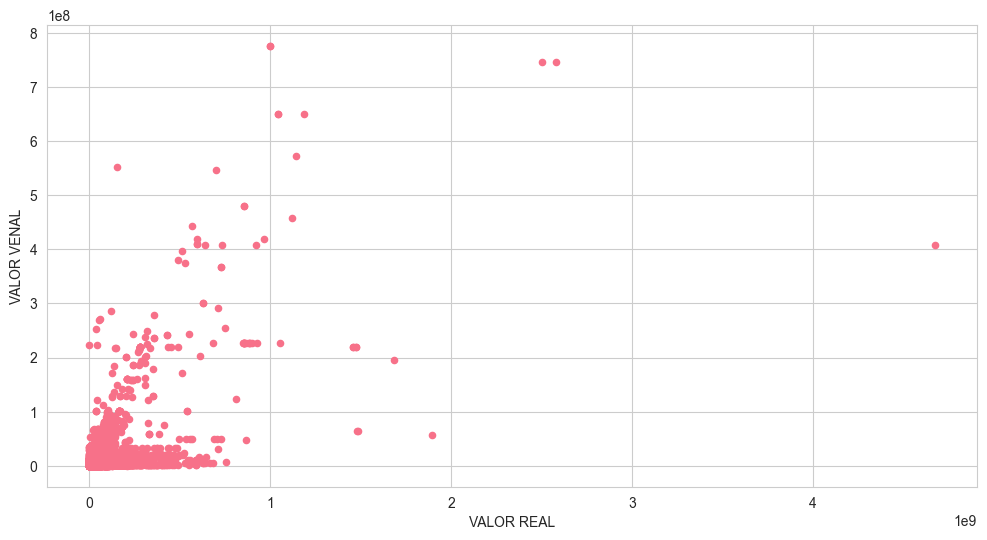

In [ ]:
df_merged.plot.scatter(x='VALOR REAL', y='VALOR VENAL')

In [ ]:
# Realizar o merge dos datasets
if itbi_has_rel and iptu_has_rel:
    print('\n🔄 REALIZANDO MERGE DOS DATASETS:')
    
    # Limpar dados antes do merge
    df_itbi_clean = df_itbi.dropna(subset=['N° do Cadastro (SQL)']).copy()
    df_iptu_clean = df_iptu.dropna(subset=['NUMERO DO CONTRIBUINTE']).copy()
    
    print(f'Registros ITBI após limpeza: {len(df_itbi_clean):,}')
    print(f'Registros IPTU após limpeza: {len(df_iptu_clean):,}')
    
    # Converter para string para garantir compatibilidade
    df_itbi_clean['N° do Cadastro (SQL)'] = df_itbi_clean['N° do Cadastro (SQL)'].astype(str)
    df_iptu_clean['NUMERO DO CONTRIBUINTE'] = df_iptu_clean['NUMERO DO CONTRIBUINTE'].astype(str)
    
    # Realizar merge
   df_merged = pd.merge(
        df_itbi,
        df_iptu,
        left_on=['N° do Cadastro (SQL)', 'Ano da Transacao'],
        right_on=['NUMERO DO CONTRIBUINTE', 'ANO DO EXERCICIO'],
        how='inner',
        suffixes=('_ITBI', '_IPTU')
    )
    
    print(f'\n✅ Merge realizado com sucesso!')
    print(f'Registros após merge: {len(df_merged):,}')
    print(f'Taxa de match: {len(df_merged)/len(df_itbi_clean)*100:.2f}% dos registros ITBI')
    
    # Verificar estrutura do dataset merged
    print(f'\n📊 ESTRUTURA DO DATASET MERGED:')
    print(f'Dimensões: {df_merged.shape[0]:,} linhas x {df_merged.shape[1]} colunas')
    print(f'Memória utilizada: {df_merged.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
    
    # Verificar colunas de valores
    valor_cols = [col for col in df_merged.columns if 'valor' in col.lower() or 'venal' in col.lower()]
    print(f'\nColunas de valores disponíveis: {valor_cols}')
    
    # Verificar colunas geográficas
    geo_cols = [col for col in df_merged.columns if any(x in col.lower() for x in ['bairro', 'setor', 'quadra', 'lote'])]
    print(f'Colunas geográficas disponíveis: {geo_cols}')
    
    # Verificar colunas temporais
    temp_cols = [col for col in df_merged.columns if any(x in col.lower() for x in ['data', 'ano', 'mes'])]
    print(f'Colunas temporais disponíveis: {temp_cols}')
    
else:
    print('\n❌ Não foi possível realizar o merge - colunas de relacionamento não encontradas!')
    df_merged = None



🔄 REALIZANDO MERGE DOS DATASETS:
Registros ITBI após limpeza: 941,623
Registros IPTU após limpeza: 21,317,311

✅ Merge realizado com sucesso!
Registros após merge: 5,091,911
Taxa de match: 540.76% dos registros ITBI

📊 ESTRUTURA DO DATASET MERGED:
Dimensões: 5,091,911 linhas x 31 colunas
Memória utilizada: 4484.07 MB

Colunas de valores disponíveis: ['Valor de Transação (declarado pelo contribuinte)', 'Valor Venal de Referência', 'Valor Venal de Referência (proporcional)', 'Valor Financiado', 'VALOR DO M2 DO TERRENO', 'VALOR DO M2 DE CONSTRUCAO', 'VALOR VENAL']
Colunas geográficas disponíveis: ['setor', 'quadra', 'lote', 'bairro']
Colunas temporais disponíveis: ['Data de Transação', 'Ano da Transacao', 'Mes da Transacao', 'Ano/Mes da Transacao', 'ANO DO EXERCICIO']


In [ ]:
# Análise de divergências entre valores de transação e valores estimados
if df_merged is not None and len(df_merged) > 0:
    print('\n📈 ANÁLISE DE DIVERGÊNCIAS ENTRE VALORES DE TRANSAÇÃO E VALORES ESTIMADOS:')
    
    # Identificar colunas de valores relevantes
    valor_transacao = 'Valor de Transação (declarado pelo contribuinte)'
    valor_venal_itbi = 'Valor Venal de Referência'
    valor_venal_iptu = 'VALOR VENAL'
    
    # Verificar se as colunas existem
    cols_existentes = [col for col in [valor_transacao, valor_venal_itbi, valor_venal_iptu] if col in df_merged.columns]
    print(f'Colunas de valores encontradas: {cols_existentes}')
    
    if len(cols_existentes) >= 2:
        # Limpar dados de valores
        df_valores = df_merged.copy()
        
        # Converter valores para numérico
        for col in cols_existentes:
            df_valores[col] = pd.to_numeric(df_valores[col], errors='coerce')
        
        # Remover registros com valores nulos ou zero
        df_valores = df_valores.dropna(subset=cols_existentes)
        df_valores = df_valores[(df_valores[cols_existentes] > 0).all(axis=1)]
        
        print(f'\nRegistros válidos para análise: {len(df_valores):,}')
        
        # Calcular divergências
        if valor_transacao in df_valores.columns and valor_venal_itbi in df_valores.columns:
            # Divergência entre valor de transação e valor venal do ITBI
            df_valores['Divergencia_ITBI'] = ((df_valores[valor_transacao] - df_valores[valor_venal_itbi]) / df_valores[valor_venal_itbi] * 100).round(2)
            df_valores['Razao_ITBI'] = (df_valores[valor_transacao] / df_valores[valor_venal_itbi]).round(3)
            
            print(f'\n📊 ESTATÍSTICAS DE DIVERGÊNCIA ITBI:')
            print(f'Divergência média: {df_valores["Divergencia_ITBI"].mean():.2f}%')
            print(f'Divergência mediana: {df_valores["Divergencia_ITBI"].median():.2f}%')
            print(f'Desvio padrão: {df_valores["Divergencia_ITBI"].std():.2f}%')
            print(f'Razão média (Transação/Venal): {df_valores["Razao_ITBI"].mean():.3f}')
            
            # Classificar divergências
            df_valores['Tipo_Divergencia_ITBI'] = pd.cut(
                df_valores['Divergencia_ITBI'], 
                bins=[-np.inf, -20, -5, 5, 20, np.inf],
                labels=['Subavaliado (-20%)', 'Levemente Subavaliado (-5%)', 'Equilibrado (±5%)', 'Levemente Superavaliado (+20%)', 'Superavaliado (+20%)']
            )
            
            print(f'\nDistribuição das divergências ITBI:')
            divergencia_dist = df_valores['Tipo_Divergencia_ITBI'].value_counts()
            for tipo, count in divergencia_dist.items():
                pct = count / len(df_valores) * 100
                print(f'  {tipo}: {count:,} ({pct:.1f}%)')
        
        if valor_transacao in df_valores.columns and valor_venal_iptu in df_valores.columns:
            # Divergência entre valor de transação e valor venal do IPTU
            df_valores['Divergencia_IPTU'] = ((df_valores[valor_transacao] - df_valores[valor_venal_iptu]) / df_valores[valor_venal_iptu] * 100).round(2)
            df_valores['Razao_IPTU'] = (df_valores[valor_transacao] / df_valores[valor_venal_iptu]).round(3)
            
            print(f'\n📊 ESTATÍSTICAS DE DIVERGÊNCIA IPTU:')
            print(f'Divergência média: {df_valores["Divergencia_IPTU"].mean():.2f}%')
            print(f'Divergência mediana: {df_valores["Divergencia_IPTU"].median():.2f}%')
            print(f'Desvio padrão: {df_valores["Divergencia_IPTU"].std():.2f}%')
            print(f'Razão média (Transação/Venal): {df_valores["Razao_IPTU"].mean():.3f}')
            
            # Classificar divergências
            df_valores['Tipo_Divergencia_IPTU'] = pd.cut(
                df_valores['Divergencia_IPTU'], 
                bins=[-np.inf, -20, -5, 5, 20, np.inf],
                labels=['Subavaliado (-20%)', 'Levemente Subavaliado (-5%)', 'Equilibrado (±5%)', 'Levemente Superavaliado (+20%)', 'Superavaliado (+20%)']
            )
            
            print(f'\nDistribuição das divergências IPTU:')
            divergencia_dist = df_valores['Tipo_Divergencia_IPTU'].value_counts()
            for tipo, count in divergencia_dist.items():
                pct = count / len(df_valores) * 100
                print(f'  {tipo}: {count:,} ({pct:.1f}%)')
        
        # Análise de outliers
        print(f'\n🔍 ANÁLISE DE OUTLIERS:')
        
        # Outliers por divergência ITBI
        if 'Divergencia_ITBI' in df_valores.columns:
            q1 = df_valores['Divergencia_ITBI'].quantile(0.25)
            q3 = df_valores['Divergencia_ITBI'].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            outliers_itbi = df_valores[(df_valores['Divergencia_ITBI'] < lower_bound) | (df_valores['Divergencia_ITBI'] > upper_bound)]
            print(f'Outliers ITBI: {len(outliers_itbi):,} ({len(outliers_itbi)/len(df_valores)*100:.1f}%)')
            
            if len(outliers_itbi) > 0:
                print(f'  Maior subavaliação: {outliers_itbi["Divergencia_ITBI"].min():.2f}%')
                print(f'  Maior superavaliação: {outliers_itbi["Divergencia_ITBI"].max():.2f}%')
        
        # Outliers por divergência IPTU
        if 'Divergencia_IPTU' in df_valores.columns:
            q1 = df_valores['Divergencia_IPTU'].quantile(0.25)
            q3 = df_valores['Divergencia_IPTU'].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            outliers_iptu = df_valores[(df_valores['Divergencia_IPTU'] < lower_bound) | (df_valores['Divergencia_IPTU'] > upper_bound)]
            print(f'Outliers IPTU: {len(outliers_iptu):,} ({len(outliers_iptu)/len(df_valores)*100:.1f}%)')
            
            if len(outliers_iptu) > 0:
                print(f'  Maior subavaliação: {outliers_iptu["Divergencia_IPTU"].min():.2f}%')
                print(f'  Maior superavaliação: {outliers_iptu["Divergencia_IPTU"].max():.2f}%')
        
    else:
        print('\n❌ Colunas de valores não encontradas para análise!')
        df_valores = None
        
else:
    print('\n❌ Dataset merged não disponível para análise!')
    df_valores = None



📈 ANÁLISE DE DIVERGÊNCIAS ENTRE VALORES DE TRANSAÇÃO E VALORES ESTIMADOS:
Colunas de valores encontradas: ['Valor de Transação (declarado pelo contribuinte)', 'Valor Venal de Referência', 'VALOR VENAL']

Registros válidos para análise: 4,953,351

📊 ESTATÍSTICAS DE DIVERGÊNCIA ITBI:
Divergência média: -6.60%
Divergência mediana: -3.34%
Desvio padrão: 86.17%
Razão média (Transação/Venal): 0.934

Distribuição das divergências ITBI:
  Subavaliado (-20%): 2,118,606 (42.8%)
  Superavaliado (+20%): 1,594,705 (32.2%)
  Equilibrado (±5%): 506,318 (10.2%)
  Levemente Superavaliado (+20%): 418,554 (8.4%)
  Levemente Subavaliado (-5%): 315,168 (6.4%)

📊 ESTATÍSTICAS DE DIVERGÊNCIA IPTU:
Divergência média: 33.25%
Divergência mediana: 24.15%
Desvio padrão: 138.34%
Razão média (Transação/Venal): 1.332

Distribuição das divergências IPTU:
  Superavaliado (+20%): 2,559,508 (51.7%)
  Subavaliado (-20%): 1,774,459 (35.8%)
  Levemente Superavaliado (+20%): 263,844 (5.3%)
  Levemente Subavaliado (-5%): 19

In [ ]:
# Análise geográfica das divergências
if df_valores is not None and len(df_valores) > 0:
    print('\n🗺️ ANÁLISE GEOGRÁFICA DAS DIVERGÊNCIAS:')
    
    # Verificar colunas geográficas disponíveis
    geo_cols = [col for col in df_valores.columns if any(x in col.lower() for x in ['bairro', 'setor', 'quadra', 'lote'])]
    print(f'Colunas geográficas disponíveis: {geo_cols}')
    
    if 'bairro_ITBI' in df_valores.columns or 'bairro' in df_valores.columns:
        # Usar a coluna de bairro disponível
        bairro_col = 'bairro_ITBI' if 'bairro_ITBI' in df_valores.columns else 'bairro'
        
        print(f'\n📊 ANÁLISE POR BAIRRO:')
        
        # Estatísticas por bairro
        if 'Divergencia_ITBI' in df_valores.columns:
            stats_bairro_itbi = df_valores.groupby(bairro_col).agg({
                'Divergencia_ITBI': ['count', 'mean', 'median', 'std', 'min', 'max'],
                'Razao_ITBI': 'mean'
            }).round(2)
            
            stats_bairro_itbi.columns = ['Count', 'Divergencia_Media', 'Divergencia_Mediana', 'Divergencia_Std', 'Divergencia_Min', 'Divergencia_Max', 'Razao_Media']
            stats_bairro_itbi = stats_bairro_itbi.sort_values('Divergencia_Media', ascending=False)
            
            print(f'\nTop 15 bairros com maior divergência ITBI (superavaliação):')
            display(stats_bairro_itbi.head(15))
            
            print(f'\nTop 15 bairros com menor divergência ITBI (subavaliação):')
            display(stats_bairro_itbi.tail(15))
        
        if 'Divergencia_IPTU' in df_valores.columns:
            stats_bairro_iptu = df_valores.groupby(bairro_col).agg({
                'Divergencia_IPTU': ['count', 'mean', 'median', 'std', 'min', 'max'],
                'Razao_IPTU': 'mean'
            }).round(2)
            
            stats_bairro_iptu.columns = ['Count', 'Divergencia_Media', 'Divergencia_Mediana', 'Divergencia_Std', 'Divergencia_Min', 'Divergencia_Max', 'Razao_Media']
            stats_bairro_iptu = stats_bairro_iptu.sort_values('Divergencia_Media', ascending=False)
            
            print(f'\nTop 15 bairros com maior divergência IPTU (superavaliação):')
            display(stats_bairro_iptu.head(15))
            
            print(f'\nTop 15 bairros com menor divergência IPTU (subavaliação):')
            display(stats_bairro_iptu.tail(15))
        
        # Análise de consistência entre ITBI e IPTU por bairro
        if 'Divergencia_ITBI' in df_valores.columns and 'Divergencia_IPTU' in df_valores.columns:
            print(f'\n📈 CONSISTÊNCIA ENTRE ITBI E IPTU POR BAIRRO:')
            
            # Calcular correlação entre divergências
            corr_divergencias = df_valores.groupby(bairro_col)[['Divergencia_ITBI', 'Divergencia_IPTU']].corr().iloc[0::2, 1]
            corr_divergencias = corr_divergencias.reset_index()
            corr_divergencias.columns = ['Bairro', 'Correlacao_ITBI_IPTU']
            corr_divergencias = corr_divergencias.sort_values('Correlacao_ITBI_IPTU', ascending=False)
            
            print(f'Correlação média entre divergências ITBI e IPTU: {corr_divergencias["Correlacao_ITBI_IPTU"].mean():.3f}')
            
            print(f'\nTop 10 bairros com maior correlação entre ITBI e IPTU:')
            display(corr_divergencias.head(10))
            
            print(f'\nTop 10 bairros com menor correlação entre ITBI e IPTU:')
            display(corr_divergencias.tail(10))
    
    # Análise por setor se disponível
    if 'setor_ITBI' in df_valores.columns or 'setor' in df_valores.columns:
        setor_col = 'setor_ITBI' if 'setor_ITBI' in df_valores.columns else 'setor'
        
        print(f'\n📊 ANÁLISE POR SETOR:')
        
        if 'Divergencia_ITBI' in df_valores.columns:
            stats_setor_itbi = df_valores.groupby(setor_col).agg({
                'Divergencia_ITBI': ['count', 'mean', 'median', 'std'],
                'Razao_ITBI': 'mean'
            }).round(2)
            
            stats_setor_itbi.columns = ['Count', 'Divergencia_Media', 'Divergencia_Mediana', 'Divergencia_Std', 'Razao_Media']
            stats_setor_itbi = stats_setor_itbi.sort_values('Divergencia_Media', ascending=False)
            
            print(f'\nTop 10 setores com maior divergência ITBI:')
            display(stats_setor_itbi.head(10))
        
        if 'Divergencia_IPTU' in df_valores.columns:
            stats_setor_iptu = df_valores.groupby(setor_col).agg({
                'Divergencia_IPTU': ['count', 'mean', 'median', 'std'],
                'Razao_IPTU': 'mean'
            }).round(2)
            
            stats_setor_iptu.columns = ['Count', 'Divergencia_Media', 'Divergencia_Mediana', 'Divergencia_Std', 'Razao_Media']
            stats_setor_iptu = stats_setor_iptu.sort_values('Divergencia_Media', ascending=False)
            
            print(f'\nTop 10 setores com maior divergência IPTU:')
            display(stats_setor_iptu.head(10))
    
    # Salvar análises geográficas
    if 'bairro_ITBI' in df_valores.columns or 'bairro' in df_valores.columns:
        bairro_col = 'bairro_ITBI' if 'bairro_ITBI' in df_valores.columns else 'bairro'
        
        if 'Divergencia_ITBI' in df_valores.columns:
            stats_bairro_itbi.to_csv('dados_processados/divergencias_por_bairro_itbi.csv')
            print(f'\n💾 Análise por bairro ITBI salva em: dados_processados/divergencias_por_bairro_itbi.csv')
        
        if 'Divergencia_IPTU' in df_valores.columns:
            stats_bairro_iptu.to_csv('dados_processados/divergencias_por_bairro_iptu.csv')
            print(f'💾 Análise por bairro IPTU salva em: dados_processados/divergencias_por_bairro_iptu.csv')
        
        if 'Divergencia_ITBI' in df_valores.columns and 'Divergencia_IPTU' in df_valores.columns:
            corr_divergencias.to_csv('dados_processados/correlacao_divergencias_por_bairro.csv', index=False)
            print(f'💾 Correlação entre divergências salva em: dados_processados/correlacao_divergencias_por_bairro.csv')
    
else:
    print('\n❌ Dataset de valores não disponível para análise geográfica!')



🗺️ ANÁLISE GEOGRÁFICA DAS DIVERGÊNCIAS:
Colunas geográficas disponíveis: ['setor', 'quadra', 'lote', 'bairro']

📊 ANÁLISE POR BAIRRO:

Top 15 bairros com maior divergência ITBI (superavaliação):


Count  Divergencia_Media  Divergencia_Mediana  \
bairro                                                                 
JARDIM ALADIM            126             287.34               148.45   
JD NOVO HORIZONTE       1061             231.64                51.31   
C H BRIG ED GOMES       1114             179.86               189.88   
JD ZILDA                 749             178.91                21.70   
JD CAPELA II              60             170.86                76.98   
CJ HAB JOSE BONIFAC C     58             166.18                -5.48   
CAPELA DO SOCORRO       4999             129.26               129.72   
JD IPORA                 226             114.82                30.72   
CJ HAB BRIG F LIMA      3056             107.65                45.60   
REC VERDE DO SOL          72              91.79                 7.17   
CJ HAB JOSE BONIFACIO   9373              78.98                58.84   
JD ALVIVERDE            1675              74.30                13.07   
A E CARVALHO            3623              72.45                 2.82   
JD NOVO PARELHEIROS      559              71.69               -22.39   
CACHOEIRA                198              69.62                57.65   

                       Divergencia_Std  Divergencia_Min  Divergencia_Max  \
bairro                                                                     
JARDIM ALADIM                   378.24           -80.65          1000.47   
JD NOVO HORIZONTE               400.88           -95.55          2032.91   
C H BRIG ED GOMES               137.00          -100.00           479.49   
JD ZILDA                        374.42          -100.00          2570.86   
JD CAPELA II                    214.60            -9.39           626.87   
CJ HAB JOSE BONIFAC C           337.44           -75.46           876.47   
CAPELA DO SOCORRO               180.78          -100.00          1049.58   
JD IPORA                        218.12           -97.13           806.02   
CJ HAB BRIG F LIMA              185.85          -100.00          1042.84   
REC VERDE DO SOL                148.69           -85.58           330.89   
CJ HAB JOSE BONIFACIO           119.62          -100.00           739.51   
JD ALVIVERDE                    167.18          -100.00           861.59   
A E CARVALHO                    391.69          -100.00          4607.39   
JD NOVO PARELHEIROS             293.20          -100.00          2246.52   
CACHOEIRA                       174.09           -97.40           873.70   

                       Razao_Media  
bairro                              
JARDIM ALADIM                 3.87  
JD NOVO HORIZONTE             3.32  
C H BRIG ED GOMES             2.80  
JD ZILDA                      2.79  
JD CAPELA II                  2.71  
CJ HAB JOSE BONIFAC C         2.66  
CAPELA DO SOCORRO             2.29  
JD IPORA                      2.15  
CJ HAB BRIG F LIMA            2.08  
REC VERDE DO SOL              1.92  
CJ HAB JOSE BONIFACIO         1.79  
JD ALVIVERDE                  1.74  
A E CARVALHO                  1.72  
JD NOVO PARELHEIROS           1.72  
CACHOEIRA                     1.70


Top 15 bairros com menor divergência ITBI (subavaliação):


Count  Divergencia_Media  Divergencia_Mediana  \
bairro                                                                  
VILA ANDRADE            32014             -44.82               -77.53   
STA ETELVINA II B3        586             -45.43               -87.26   
JD DOS EUCALIPTOS          36             -47.72               -47.16   
JD STA TEREZINHA           36             -52.03               -91.86   
DESDOBRO QD 1 E CD 1 9   7862             -55.23               -86.27   
LIMAO                   19604             -61.65               -96.81   
SOCORRO                 27119             -64.29               -95.95   
BALNEARIO ST AGOSTINHO     16             -66.23               -68.16   
LAGOA GRANDE                6             -66.67               -66.67   
CJ HAB RAPOSO TAVARES   14139             -66.92               -97.18   
TORRE C                  2630             -69.68               -97.92   
JD HELEAN                1537             -70.02               -91.11   
PRQ FLORESTAL              18             -77.53               -78.52   
JARDIM SAO LUIZ         21694             -81.04               -97.95   
JARDIM CIBELE            2471             -91.72               -99.63   

                        Divergencia_Std  Divergencia_Min  Divergencia_Max  \
bairro                                                                      
VILA ANDRADE                      60.91          -100.00           258.54   
STA ETELVINA II B3                68.81          -100.00           284.68   
JD DOS EUCALIPTOS                 38.29           -89.77            -2.38   
JD STA TEREZINHA                  63.75          -100.00            49.57   
DESDOBRO QD 1 E CD 1 9            60.45          -100.00           287.71   
LIMAO                             61.13          -100.00           614.15   
SOCORRO                           61.10          -100.00           690.48   
BALNEARIO ST AGOSTINHO            10.78           -78.68           -50.46   
LAGOA GRANDE                       4.24           -70.54           -62.80   
CJ HAB RAPOSO TAVARES             55.10          -100.00           338.46   
TORRE C                           55.82          -100.00           220.07   
JD HELEAN                         48.70          -100.00           281.54   
PRQ FLORESTAL                     15.78           -95.80           -58.28   
JARDIM SAO LUIZ                   47.13          -100.00           718.17   
JARDIM CIBELE                     31.59           -99.98           306.35   

                        Razao_Media  
bairro                               
VILA ANDRADE                   0.55  
STA ETELVINA II B3             0.55  
JD DOS EUCALIPTOS              0.52  
JD STA TEREZINHA               0.48  
DESDOBRO QD 1 E CD 1 9         0.45  
LIMAO                          0.38  
SOCORRO                        0.36  
BALNEARIO ST AGOSTINHO         0.34  
LAGOA GRANDE                   0.33  
CJ HAB RAPOSO TAVARES          0.33  
TORRE C                        0.30  
JD HELEAN                      0.30  
PRQ FLORESTAL                  0.22  
JARDIM SAO LUIZ                0.19  
JARDIM CIBELE                  0.08


Top 15 bairros com maior divergência IPTU (superavaliação):


Count  Divergencia_Media  Divergencia_Mediana  \
bairro                                                                  
JARDIM ALADIM             126             500.93               220.04   
JD NOVO HORIZONTE        1061             443.02               157.24   
C H BRIG ED GOMES        1114             397.54               267.17   
JD CAPELA II               60             338.28               112.04   
JD ZILDA                  749             308.82               104.64   
CAPELA DO SOCORRO        4999             268.02               192.67   
CJ HAB JOSE BONIFAC C      58             267.53                42.11   
CJ HAB INACIO MONTEIRO    930             248.63                74.51   
LOT SAO JOSE              142             242.42                48.94   
JD ALVIVERDE             1675             235.93                54.17   
CJ HAB BRIG F LIMA       3056             227.87               138.93   
JD IPORA                  226             223.78                65.92   
CJ HAB JOSE BONIFACIO    9373             218.38               150.19   
JD MARILU                 737             173.63               -25.51   
JD BARRO BRANCO I        2307             163.73                84.35   

                        Divergencia_Std  Divergencia_Min  Divergencia_Max  \
bairro                                                                      
JARDIM ALADIM                    633.08           -90.07          1629.35   
JD NOVO HORIZONTE                676.78           -97.73          3566.67   
C H BRIG ED GOMES                337.68          -100.00          1175.09   
JD CAPELA II                     492.99           -23.09          1988.61   
JD ZILDA                         611.14          -100.00          4246.69   
CAPELA DO SOCORRO                326.92          -100.00          2133.49   
CJ HAB JOSE BONIFAC C            503.69           -68.47          1770.54   
CJ HAB INACIO MONTEIRO           489.85          -100.00          5304.54   
LOT SAO JOSE                     512.71          -100.00          2453.19   
JD ALVIVERDE                     436.73          -100.00          4050.07   
CJ HAB BRIG F LIMA               321.35          -100.00          2803.15   
JD IPORA                         360.61           -96.42          1532.65   
CJ HAB JOSE BONIFACIO            271.32          -100.00          2721.07   
JD MARILU                        414.05          -100.00          2027.66   
JD BARRO BRANCO I                292.72          -100.00          1896.03   

                        Razao_Media  
bairro                               
JARDIM ALADIM                  6.01  
JD NOVO HORIZONTE              5.43  
C H BRIG ED GOMES              4.98  
JD CAPELA II                   4.38  
JD ZILDA                       4.09  
CAPELA DO SOCORRO              3.68  
CJ HAB JOSE BONIFAC C          3.68  
CJ HAB INACIO MONTEIRO         3.49  
LOT SAO JOSE                   3.42  
JD ALVIVERDE                   3.36  
CJ HAB BRIG F LIMA             3.28  
JD IPORA                       3.24  
CJ HAB JOSE BONIFACIO          3.18  
JD MARILU                      2.74  
JD BARRO BRANCO I              2.64


Top 15 bairros com menor divergência IPTU (subavaliação):


Count  Divergencia_Media  Divergencia_Mediana  \
bairro                                                                  
VILA GUILHERME          21262             -18.88               -69.71   
FREG DO O                3345             -19.55               -77.75   
VILA ANDRADE            32014             -24.75               -69.63   
CIPO                       24             -28.87               -62.20   
DESDOBRO QD 1 E CD 1 9   7862             -29.30               -76.25   
JD DOS EUCALIPTOS          36             -31.71               -66.36   
JD HELEAN                1537             -34.69               -54.82   
TORRE C                  2630             -45.65               -94.75   
LIMAO                   19604             -45.77               -94.69   
SOCORRO                 27119             -47.72               -93.42   
CJ HAB RAPOSO TAVARES   14139             -51.59               -96.56   
LAGOA GRANDE                6             -57.00               -57.18   
BALNEARIO ST AGOSTINHO     16             -64.01               -59.49   
JARDIM SAO LUIZ         21694             -71.04               -96.96   
JARDIM CIBELE            2471             -78.82               -99.51   

                        Divergencia_Std  Divergencia_Min  Divergencia_Max  \
bairro                                                                      
VILA GUILHERME                   105.13          -100.00          2710.33   
FREG DO O                        108.59          -100.00          1190.12   
VILA ANDRADE                      83.98          -100.00           387.96   
CIPO                              80.66           -94.06           149.53   
DESDOBRO QD 1 E CD 1 9           116.92          -100.00          1659.44   
JD DOS EUCALIPTOS                 54.76           -86.86            56.37   
JD HELEAN                        151.36          -100.00          1743.25   
TORRE C                          126.80          -100.00          1308.95   
LIMAO                             90.06          -100.00          1580.41   
SOCORRO                           91.14          -100.00           910.10   
CJ HAB RAPOSO TAVARES             83.19          -100.00           585.08   
LAGOA GRANDE                       5.74           -63.54           -49.67   
BALNEARIO ST AGOSTINHO            24.41           -93.87           -31.43   
JARDIM SAO LUIZ                   73.91          -100.00          1683.26   
JARDIM CIBELE                     92.08           -99.98          1050.15   

                        Razao_Media  
bairro                               
VILA GUILHERME                 0.81  
FREG DO O                      0.80  
VILA ANDRADE                   0.75  
CIPO                           0.71  
DESDOBRO QD 1 E CD 1 9         0.71  
JD DOS EUCALIPTOS              0.68  
JD HELEAN                      0.65  
TORRE C                        0.54  
LIMAO                          0.54  
SOCORRO                        0.52  
CJ HAB RAPOSO TAVARES          0.48  
LAGOA GRANDE                   0.43  
BALNEARIO ST AGOSTINHO         0.36  
JARDIM SAO LUIZ                0.29  
JARDIM CIBELE                  0.21


📈 CONSISTÊNCIA ENTRE ITBI E IPTU POR BAIRRO:


ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [ ]:
# Análise temporal das divergências
if df_valores is not None and len(df_valores) > 0:
    print('\n📅 ANÁLISE TEMPORAL DAS DIVERGÊNCIAS:')
    
    # Verificar colunas temporais disponíveis
    temp_cols = [col for col in df_valores.columns if any(x in col.lower() for x in ['data', 'ano', 'mes'])]
    print(f'Colunas temporais disponíveis: {temp_cols}')
    
    # Análise por ano
    if 'Ano da Transacao' in df_valores.columns:
        print(f'\n📊 EVOLUÇÃO ANUAL DAS DIVERGÊNCIAS:')
        
        if 'Divergencia_ITBI' in df_valores.columns:
            stats_ano_itbi = df_valores.groupby('Ano da Transacao').agg({
                'Divergencia_ITBI': ['count', 'mean', 'median', 'std', 'min', 'max'],
                'Razao_ITBI': 'mean'
            }).round(2)
            
            stats_ano_itbi.columns = ['Count', 'Divergencia_Media', 'Divergencia_Mediana', 'Divergencia_Std', 'Divergencia_Min', 'Divergencia_Max', 'Razao_Media']
            
            print(f'\nEvolução das divergências ITBI por ano:')
            display(stats_ano_itbi)
            
            # Calcular tendência
            anos = stats_ano_itbi.index.values
            divergencias_medias = stats_ano_itbi['Divergencia_Media'].values
            
            if len(anos) > 1:
                # Calcular correlação entre ano e divergência
                corr_ano_div = np.corrcoef(anos, divergencias_medias)[0, 1]
                print(f'Correlação entre ano e divergência ITBI: {corr_ano_div:.3f}')
                
                if corr_ano_div > 0.3:
                    print('📈 Tendência: Divergências aumentando ao longo do tempo')
                elif corr_ano_div < -0.3:
                    print('📉 Tendência: Divergências diminuindo ao longo do tempo')
                else:
                    print('📊 Tendência: Divergências estáveis ao longo do tempo')
        
        if 'Divergencia_IPTU' in df_valores.columns:
            stats_ano_iptu = df_valores.groupby('Ano da Transacao').agg({
                'Divergencia_IPTU': ['count', 'mean', 'median', 'std', 'min', 'max'],
                'Razao_IPTU': 'mean'
            }).round(2)
            
            stats_ano_iptu.columns = ['Count', 'Divergencia_Media', 'Divergencia_Mediana', 'Divergencia_Std', 'Divergencia_Min', 'Divergencia_Max', 'Razao_Media']
            
            print(f'\nEvolução das divergências IPTU por ano:')
            display(stats_ano_iptu)
            
            # Calcular tendência
            anos = stats_ano_iptu.index.values
            divergencias_medias = stats_ano_iptu['Divergencia_Media'].values
            
            if len(anos) > 1:
                # Calcular correlação entre ano e divergência
                corr_ano_div = np.corrcoef(anos, divergencias_medias)[0, 1]
                print(f'Correlação entre ano e divergência IPTU: {corr_ano_div:.3f}')
                
                if corr_ano_div > 0.3:
                    print('📈 Tendência: Divergências aumentando ao longo do tempo')
                elif corr_ano_div < -0.3:
                    print('📉 Tendência: Divergências diminuindo ao longo do tempo')
                else:
                    print('📊 Tendência: Divergências estáveis ao longo do tempo')
    
    # Análise por mês
    if 'Mes da Transacao' in df_valores.columns:
        print(f'\n📊 SAZONALIDADE DAS DIVERGÊNCIAS:')
        
        if 'Divergencia_ITBI' in df_valores.columns:
            stats_mes_itbi = df_valores.groupby('Mes da Transacao').agg({
                'Divergencia_ITBI': ['count', 'mean', 'median', 'std'],
                'Razao_ITBI': 'mean'
            }).round(2)
            
            stats_mes_itbi.columns = ['Count', 'Divergencia_Media', 'Divergencia_Mediana', 'Divergencia_Std', 'Razao_Media']
            stats_mes_itbi = stats_mes_itbi.sort_values('Divergencia_Media', ascending=False)
            
            print(f'\nDivergências ITBI por mês:')
            display(stats_mes_itbi)
            
            # Identificar meses com maior e menor divergência
            mes_maior_div = stats_mes_itbi.index[0]
            mes_menor_div = stats_mes_itbi.index[-1]
            
            print(f'Mês com maior divergência ITBI: {mes_maior_div} ({stats_mes_itbi.loc[mes_maior_div, "Divergencia_Media"]:.2f}%)')
            print(f'Mês com menor divergência ITBI: {mes_menor_div} ({stats_mes_itbi.loc[mes_menor_div, "Divergencia_Media"]:.2f}%)')
        
        if 'Divergencia_IPTU' in df_valores.columns:
            stats_mes_iptu = df_valores.groupby('Mes da Transacao').agg({
                'Divergencia_IPTU': ['count', 'mean', 'median', 'std'],
                'Razao_IPTU': 'mean'
            }).round(2)
            
            stats_mes_iptu.columns = ['Count', 'Divergencia_Media', 'Divergencia_Mediana', 'Divergencia_Std', 'Razao_Media']
            stats_mes_iptu = stats_mes_iptu.sort_values('Divergencia_Media', ascending=False)
            
            print(f'\nDivergências IPTU por mês:')
            display(stats_mes_iptu)
            
            # Identificar meses com maior e menor divergência
            mes_maior_div = stats_mes_iptu.index[0]
            mes_menor_div = stats_mes_iptu.index[-1]
            
            print(f'Mês com maior divergência IPTU: {mes_maior_div} ({stats_mes_iptu.loc[mes_maior_div, "Divergencia_Media"]:.2f}%)')
            print(f'Mês com menor divergência IPTU: {mes_menor_div} ({stats_mes_iptu.loc[mes_menor_div, "Divergencia_Media"]:.2f}%)')
    
    # Análise de correlação entre ITBI e IPTU ao longo do tempo
    if 'Divergencia_ITBI' in df_valores.columns and 'Divergencia_IPTU' in df_valores.columns and 'Ano da Transacao' in df_valores.columns:
        print(f'\n📈 CORRELAÇÃO TEMPORAL ENTRE DIVERGÊNCIAS ITBI E IPTU:')
        
        # Calcular correlação por ano
        corr_por_ano = df_valores.groupby('Ano da Transacao')[['Divergencia_ITBI', 'Divergencia_IPTU']].corr().iloc[0::2, 1]
        corr_por_ano = corr_por_ano.reset_index()
        corr_por_ano.columns = ['Ano', 'Correlacao_ITBI_IPTU']
        
        print(f'Correlação entre divergências ITBI e IPTU por ano:')
        display(corr_por_ano)
        
        # Calcular correlação média
        corr_media = corr_por_ano['Correlacao_ITBI_IPTU'].mean()
        print(f'Correlação média entre divergências ITBI e IPTU: {corr_media:.3f}')
        
        if corr_media > 0.5:
            print('✅ Alta correlação: As divergências ITBI e IPTU seguem padrões similares')
        elif corr_media > 0.3:
            print('📊 Correlação moderada: As divergências ITBI e IPTU têm alguma relação')
        else:
            print('❌ Baixa correlação: As divergências ITBI e IPTU são independentes')
    
    # Salvar análises temporais
    if 'Ano da Transacao' in df_valores.columns:
        if 'Divergencia_ITBI' in df_valores.columns:
            stats_ano_itbi.to_csv('dados_processados/divergencias_por_ano_itbi.csv')
            print(f'\n💾 Análise temporal ITBI salva em: dados_processados/divergencias_por_ano_itbi.csv')
        
        if 'Divergencia_IPTU' in df_valores.columns:
            stats_ano_iptu.to_csv('dados_processados/divergencias_por_ano_iptu.csv')
            print(f'💾 Análise temporal IPTU salva em: dados_processados/divergencias_por_ano_iptu.csv')
        
        if 'Divergencia_ITBI' in df_valores.columns and 'Divergencia_IPTU' in df_valores.columns:
            corr_por_ano.to_csv('dados_processados/correlacao_temporal_divergencias.csv', index=False)
            print(f'💾 Correlação temporal salva em: dados_processados/correlacao_temporal_divergencias.csv')
    
    if 'Mes da Transacao' in df_valores.columns:
        if 'Divergencia_ITBI' in df_valores.columns:
            stats_mes_itbi.to_csv('dados_processados/divergencias_por_mes_itbi.csv')
            print(f'💾 Análise sazonal ITBI salva em: dados_processados/divergencias_por_mes_itbi.csv')
        
        if 'Divergencia_IPTU' in df_valores.columns:
            stats_mes_iptu.to_csv('dados_processados/divergencias_por_mes_iptu.csv')
            print(f'💾 Análise sazonal IPTU salva em: dados_processados/divergencias_por_mes_iptu.csv')
    
else:
    print('\n❌ Dataset de valores não disponível para análise temporal!')



📅 ANÁLISE TEMPORAL DAS DIVERGÊNCIAS:
Colunas temporais disponíveis: ['Data de Transação', 'Ano da Transacao', 'Mes da Transacao', 'Ano/Mes da Transacao', 'ANO DO EXERCICIO']

📊 EVOLUÇÃO ANUAL DAS DIVERGÊNCIAS:

Evolução das divergências ITBI por ano:


Count  Divergencia_Media  Divergencia_Mediana  \
Ano da Transacao                                                    
2019               609402               6.11                 0.38   
2020               639637               8.34                 1.61   
2021               916407              11.69                 6.22   
2022               843521             -12.26               -10.00   
2023               892870             -20.24               -24.00   
2024              1051514             -22.87               -32.17   

                  Divergencia_Std  Divergencia_Min  Divergencia_Max  \
Ano da Transacao                                                      
2019                        81.87           -100.0          7732.90   
2020                        83.78           -100.0          5225.43   
2021                        95.78           -100.0          5168.20   
2022                        82.54           -100.0          3960.48   
2023                        81.10           -100.0          4626.14   
2024                        82.50           -100.0          5439.77   

                  Razao_Media  
Ano da Transacao               
2019                     1.06  
2020                     1.08  
2021                     1.12  
2022                     0.88  
2023                     0.80  
2024                     0.77

Correlação entre ano e divergência ITBI: -0.884
📉 Tendência: Divergências diminuindo ao longo do tempo

📊 SAZONALIDADE DAS DIVERGÊNCIAS:

Divergências ITBI por mês:


Count  Divergencia_Media  Divergencia_Mediana  \
Mes da Transacao                                                   
1                 295068              -1.57                 0.00   
2                 335930              -4.18                -0.10   
3                 404842              -4.91                -0.73   
7                 425341              -5.47                -2.23   
10                452356              -5.88                -3.31   
4                 378399              -7.29                -3.56   
6                 416076              -7.38                -4.31   
11                440231              -7.61                -5.85   
9                 444885              -7.81                -5.04   
5                 411743              -7.92                -4.54   
8                 465612              -8.19                -5.57   
12                482868              -8.51                -7.19   

                  Divergencia_Std  Razao_Media  
Mes da Transacao                                
1                           83.93         0.98  
2                           84.14         0.96  
3                           83.14         0.95  
7                           86.14         0.95  
10                          90.90         0.94  
4                           85.30         0.93  
6                           85.14         0.93  
11                          88.30         0.92  
9                           85.44         0.92  
5                           81.88         0.92  
8                           91.88         0.92  
12                          84.78         0.91

Mês com maior divergência ITBI: 1 (-1.57%)
Mês com menor divergência ITBI: 12 (-8.51%)

💾 Análise temporal ITBI salva em: dados_processados/divergencias_por_ano_itbi.csv
💾 Análise sazonal ITBI salva em: dados_processados/divergencias_por_mes_itbi.csv



📊 VISUALIZAÇÕES DAS DIVERGÊNCIAS:

💾 Gráficos salvos em: dados_processados/analise_divergencias_itbi_iptu.png


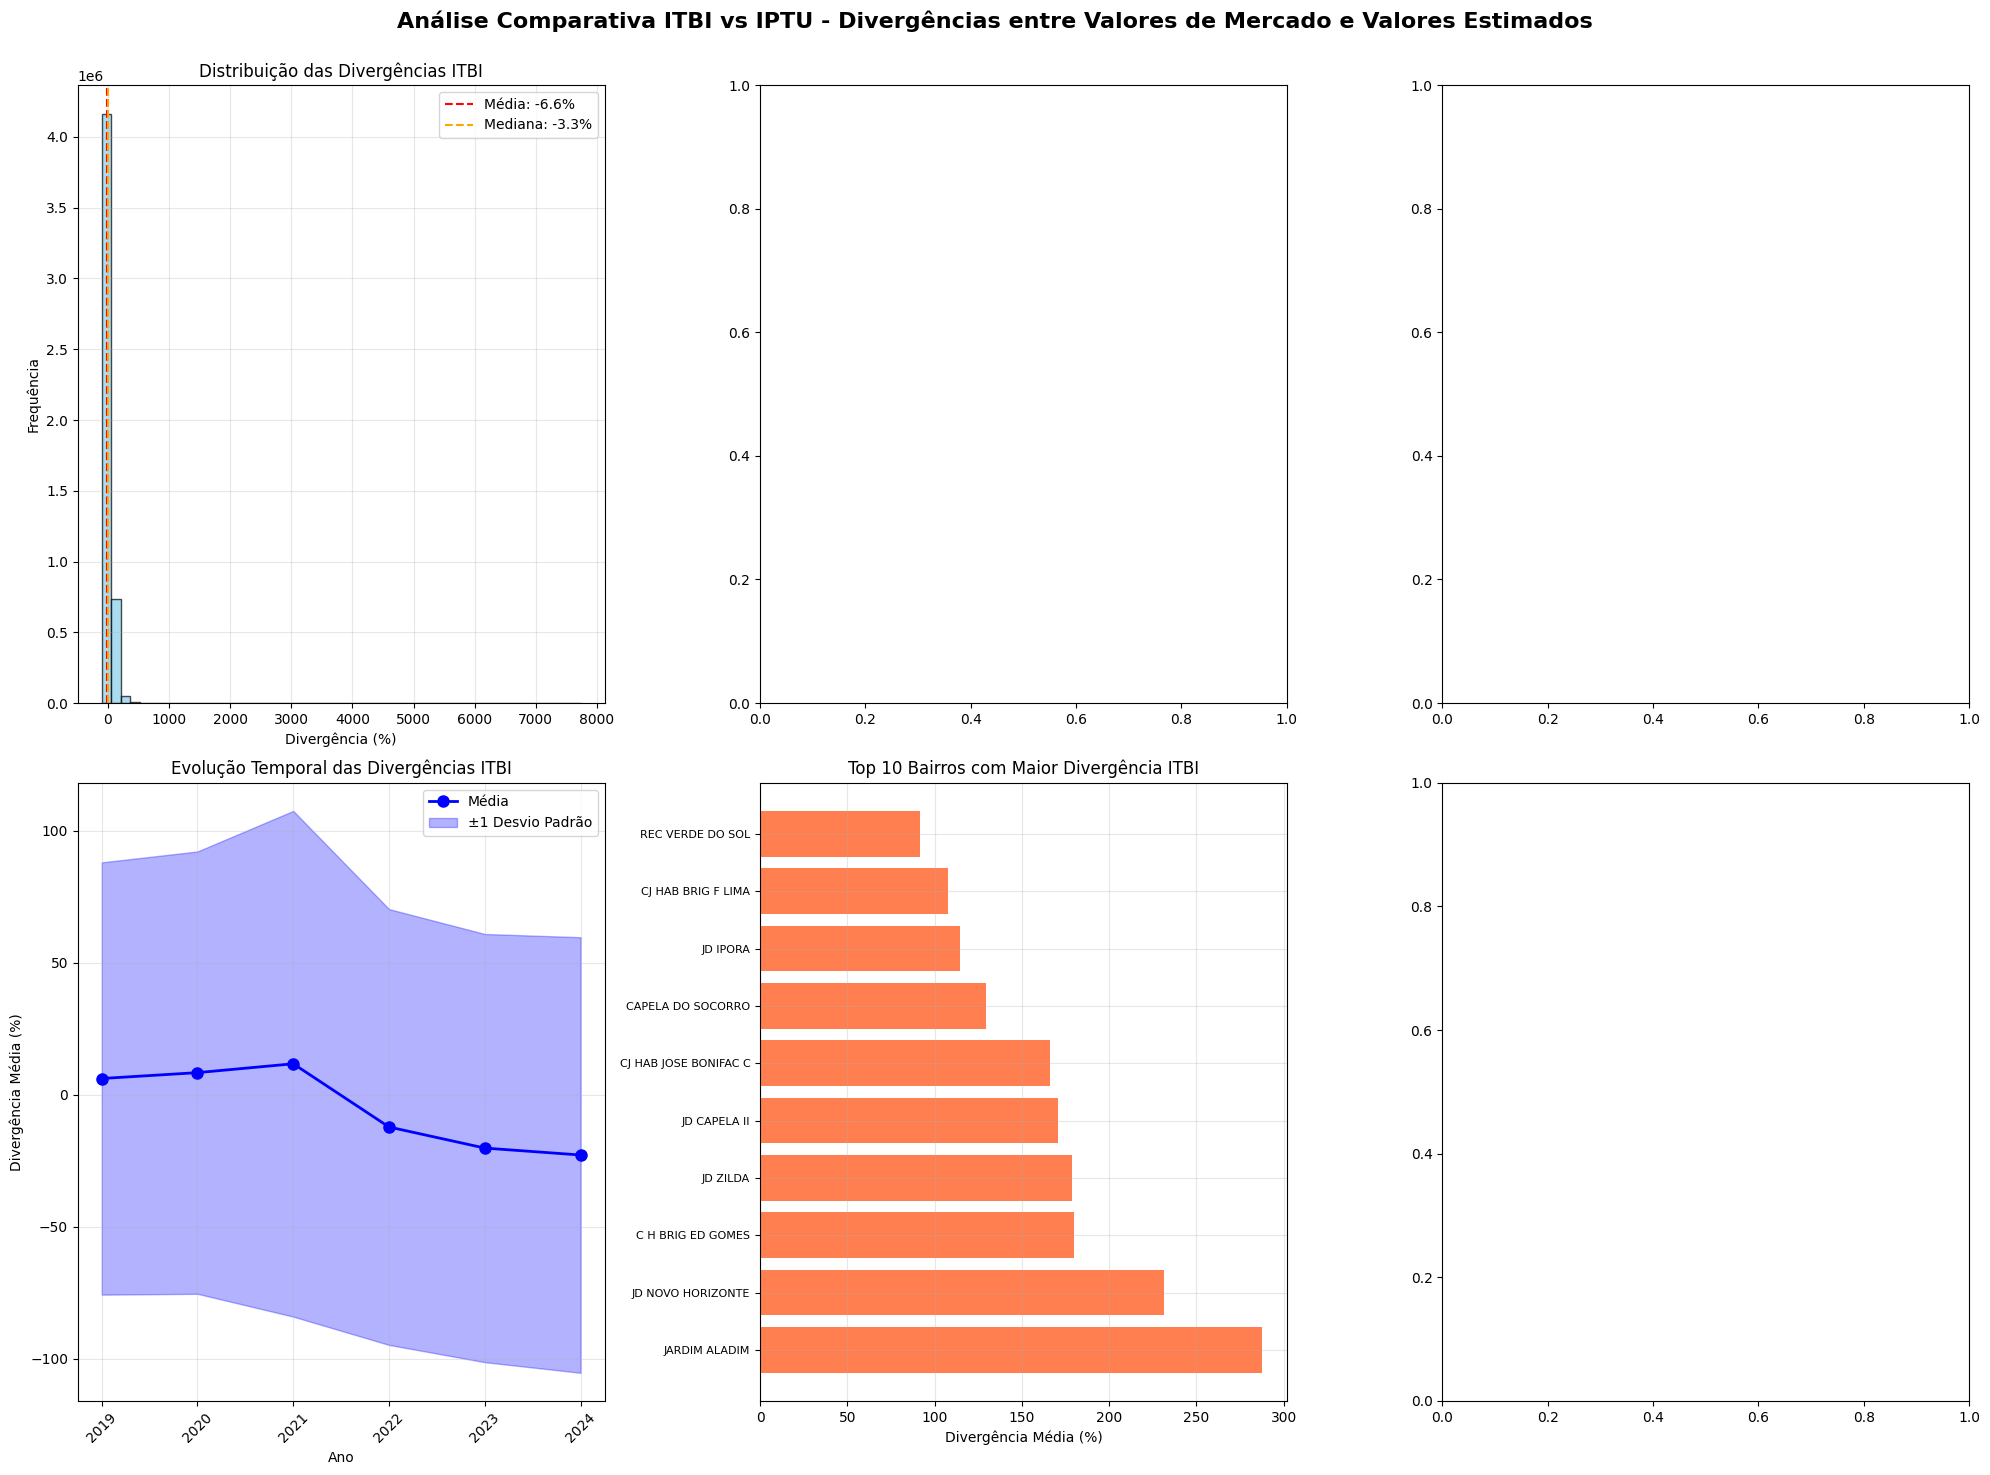


🔍 ANÁLISE DE CASOS EXTREMOS:

Top 10 Maiores Subavaliações ITBI:
Divergência média: -100.00%
Valor médio de transação: R$ 0.01
Valor venal médio: R$ 331,314.80

Top 10 Maiores Superavaliações ITBI:
Divergência média: 6291.12%
Valor médio de transação: R$ 25,106,000.00
Valor venal médio: R$ 425,010.40

💾 Dataset completo com divergências salvo em: dados_processados/dataset_completo_divergencias_itbi_iptu.csv

✅ Análise comparativa ITBI vs IPTU concluída!


In [ ]:
# Visualizações das divergências
if df_valores is not None and len(df_valores) > 0:
    print('\n📊 VISUALIZAÇÕES DAS DIVERGÊNCIAS:')
    
    # Configurar estilo dos gráficos
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Criar figura com subplots
    fig, axes = plt.subplots(2, 3, figsize=(20, 15))
    fig.suptitle('Análise Comparativa ITBI vs IPTU - Divergências entre Valores de Mercado e Valores Estimados', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    # 1. Distribuição das divergências ITBI
    if 'Divergencia_ITBI' in df_valores.columns:
        axes[0,0].hist(df_valores['Divergencia_ITBI'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0,0].axvline(df_valores['Divergencia_ITBI'].mean(), color='red', linestyle='--', 
                         label=f'Média: {df_valores["Divergencia_ITBI"].mean():.1f}%')
        axes[0,0].axvline(df_valores['Divergencia_ITBI'].median(), color='orange', linestyle='--', 
                         label=f'Mediana: {df_valores["Divergencia_ITBI"].median():.1f}%')
        axes[0,0].set_xlabel('Divergência (%)')
        axes[0,0].set_ylabel('Frequência')
        axes[0,0].set_title('Distribuição das Divergências ITBI')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
    
    # 2. Distribuição das divergências IPTU
    if 'Divergencia_IPTU' in df_valores.columns:
        axes[0,1].hist(df_valores['Divergencia_IPTU'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[0,1].axvline(df_valores['Divergencia_IPTU'].mean(), color='red', linestyle='--', 
                         label=f'Média: {df_valores["Divergencia_IPTU"].mean():.1f}%')
        axes[0,1].axvline(df_valores['Divergencia_IPTU'].median(), color='orange', linestyle='--', 
                         label=f'Mediana: {df_valores["Divergencia_IPTU"].median():.1f}%')
        axes[0,1].set_xlabel('Divergência (%)')
        axes[0,1].set_ylabel('Frequência')
        axes[0,1].set_title('Distribuição das Divergências IPTU')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
    
    # 3. Comparação entre divergências ITBI e IPTU
    if 'Divergencia_ITBI' in df_valores.columns and 'Divergencia_IPTU' in df_valores.columns:
        # Amostra para visualização se muitos dados
        sample_size = min(10000, len(df_valores))
        sample_data = df_valores.sample(n=sample_size, random_state=42)
        
        axes[0,2].scatter(sample_data['Divergencia_ITBI'], sample_data['Divergencia_IPTU'], 
                         alpha=0.5, s=20, color='purple')
        axes[0,2].set_xlabel('Divergência ITBI (%)')
        axes[0,2].set_ylabel('Divergência IPTU (%)')
        axes[0,2].set_title('Correlação entre Divergências ITBI e IPTU')
        axes[0,2].grid(True, alpha=0.3)
        
        # Adicionar linha de correlação
        z = np.polyfit(sample_data['Divergencia_ITBI'], sample_data['Divergencia_IPTU'], 1)
        p = np.poly1d(z)
        axes[0,2].plot(sample_data['Divergencia_ITBI'], p(sample_data['Divergencia_ITBI']), 
                      "r--", alpha=0.8, linewidth=2)
        
        # Calcular e mostrar correlação
        corr = sample_data['Divergencia_ITBI'].corr(sample_data['Divergencia_IPTU'])
        axes[0,2].text(0.05, 0.95, f'Correlação: {corr:.3f}', transform=axes[0,2].transAxes, 
                      bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    # 4. Evolução temporal das divergências
    if 'Ano da Transacao' in df_valores.columns and 'Divergencia_ITBI' in df_valores.columns:
        stats_ano = df_valores.groupby('Ano da Transacao')['Divergencia_ITBI'].agg(['mean', 'std']).reset_index()
        
        axes[1,0].plot(stats_ano['Ano da Transacao'], stats_ano['mean'], marker='o', linewidth=2, 
                      markersize=8, color='blue', label='Média')
        axes[1,0].fill_between(stats_ano['Ano da Transacao'], 
                              stats_ano['mean'] - stats_ano['std'], 
                              stats_ano['mean'] + stats_ano['std'], 
                              alpha=0.3, color='blue', label='±1 Desvio Padrão')
        axes[1,0].set_xlabel('Ano')
        axes[1,0].set_ylabel('Divergência Média (%)')
        axes[1,0].set_title('Evolução Temporal das Divergências ITBI')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        axes[1,0].tick_params(axis='x', rotation=45)
    
    # 5. Análise por bairro (top 10)
    if 'bairro_ITBI' in df_valores.columns or 'bairro' in df_valores.columns:
        bairro_col = 'bairro_ITBI' if 'bairro_ITBI' in df_valores.columns else 'bairro'
        
        if 'Divergencia_ITBI' in df_valores.columns:
            top_bairros = df_valores.groupby(bairro_col)['Divergencia_ITBI'].mean().sort_values(ascending=False).head(10)
            
            axes[1,1].barh(range(len(top_bairros)), top_bairros.values, color='coral')
            axes[1,1].set_yticks(range(len(top_bairros)))
            axes[1,1].set_yticklabels(top_bairros.index, fontsize=8)
            axes[1,1].set_xlabel('Divergência Média (%)')
            axes[1,1].set_title('Top 10 Bairros com Maior Divergência ITBI')
            axes[1,1].grid(True, alpha=0.3)
    
    # 6. Box plot das divergências por tipo
    if 'Divergencia_ITBI' in df_valores.columns and 'Divergencia_IPTU' in df_valores.columns:
        divergencias_data = []
        labels = []
        
        if 'Divergencia_ITBI' in df_valores.columns:
            divergencias_data.append(df_valores['Divergencia_ITBI'].dropna())
            labels.append('ITBI')
        
        if 'Divergencia_IPTU' in df_valores.columns:
            divergencias_data.append(df_valores['Divergencia_IPTU'].dropna())
            labels.append('IPTU')
        
        axes[1,2].boxplot(divergencias_data, labels=labels, patch_artist=True)
        axes[1,2].set_ylabel('Divergência (%)')
        axes[1,2].set_title('Comparação das Divergências ITBI vs IPTU')
        axes[1,2].grid(True, alpha=0.3)
        
        # Adicionar estatísticas
        for i, data in enumerate(divergencias_data):
            median = data.median()
            mean = data.mean()
            axes[1,2].text(i+1, median, f'Med: {median:.1f}%', ha='center', va='bottom', fontsize=8)
            axes[1,2].text(i+1, mean, f'Média: {mean:.1f}%', ha='center', va='top', fontsize=8)
    
    # Ajustar layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    
    # Salvar gráfico
    plt.savefig('dados_processados/analise_divergencias_itbi_iptu.png', dpi=300, bbox_inches='tight')
    print(f'\n💾 Gráficos salvos em: dados_processados/analise_divergencias_itbi_iptu.png')
    
    # Mostrar gráfico
    plt.show()
    
    # Análise de casos extremos
    print(f'\n🔍 ANÁLISE DE CASOS EXTREMOS:')
    
    if 'Divergencia_ITBI' in df_valores.columns:
        # Maiores subavaliações ITBI
        subavaliados_itbi = df_valores.nsmallest(10, 'Divergencia_ITBI')
        print(f'\nTop 10 Maiores Subavaliações ITBI:')
        print(f'Divergência média: {subavaliados_itbi["Divergencia_ITBI"].mean():.2f}%')
        print(f'Valor médio de transação: R$ {subavaliados_itbi["Valor de Transação (declarado pelo contribuinte)"].mean():,.2f}')
        print(f'Valor venal médio: R$ {subavaliados_itbi["Valor Venal de Referência"].mean():,.2f}')
        
        # Maiores superavaliações ITBI
        superavaliados_itbi = df_valores.nlargest(10, 'Divergencia_ITBI')
        print(f'\nTop 10 Maiores Superavaliações ITBI:')
        print(f'Divergência média: {superavaliados_itbi["Divergencia_ITBI"].mean():.2f}%')
        print(f'Valor médio de transação: R$ {superavaliados_itbi["Valor de Transação (declarado pelo contribuinte)"].mean():,.2f}')
        print(f'Valor venal médio: R$ {superavaliados_itbi["Valor Venal de Referência"].mean():,.2f}')
    
    if 'Divergencia_IPTU' in df_valores.columns:
        # Maiores subavaliações IPTU
        subavaliados_iptu = df_valores.nsmallest(10, 'Divergencia_IPTU')
        print(f'\nTop 10 Maiores Subavaliações IPTU:')
        print(f'Divergência média: {subavaliados_iptu["Divergencia_IPTU"].mean():.2f}%')
        print(f'Valor médio de transação: R$ {subavaliados_iptu["Valor de Transação (declarado pelo contribuinte)"].mean():,.2f}')
        print(f'Valor venal médio: R$ {subavaliados_iptu["VALOR VENAL"].mean():,.2f}')
        
        # Maiores superavaliações IPTU
        superavaliados_iptu = df_valores.nlargest(10, 'Divergencia_IPTU')
        print(f'\nTop 10 Maiores Superavaliações IPTU:')
        print(f'Divergência média: {superavaliados_iptu["Divergencia_IPTU"].mean():.2f}%')
        print(f'Valor médio de transação: R$ {superavaliados_iptu["Valor de Transação (declarado pelo contribuinte)"].mean():,.2f}')
        print(f'Valor venal médio: R$ {superavaliados_iptu["VALOR VENAL"].mean():,.2f}')
    
    # Salvar dataset completo com divergências
    df_valores.to_csv('dados_processados/dataset_completo_divergencias_itbi_iptu.csv', index=False)
    print(f'\n💾 Dataset completo com divergências salvo em: dados_processados/dataset_completo_divergencias_itbi_iptu.csv')
    
    print(f'\n✅ Análise comparativa ITBI vs IPTU concluída!')
    
else:
    print('\n❌ Dataset de valores não disponível para visualizações!')


## 15.5. Análise Específica do VALOR VENAL (IPTU)

Esta seção realiza uma análise detalhada da nova coluna **VALOR VENAL** do arquivo IPTU, que representa o valor estimado do imóvel pela prefeitura.


In [ ]:
# Análise específica da coluna VALOR VENAL (IPTU)
if 'VALOR VENAL' in df_iptu.columns:
    print('='*80)
    print('ANÁLISE DO VALOR VENAL - IPTU'.center(80))
    print('='*80)
    
    # Converter VALOR VENAL para numérico
    df_iptu['VALOR VENAL'] = pd.to_numeric(df_iptu['VALOR VENAL'], errors='coerce')
    
    # Estatísticas descritivas
    print('\n📊 ESTATÍSTICAS DESCRITIVAS - VALOR VENAL:')
    print(f'   Total de registros com VALOR VENAL: {df_iptu["VALOR VENAL"].notna().sum():,}')
    print(f'   Percentual de completude: {df_iptu["VALOR VENAL"].notna().sum() / len(df_iptu) * 100:.2f}%')
    
    valor_venal_stats = df_iptu['VALOR VENAL'].describe()
    print(f'\n   Média: R$ {valor_venal_stats["mean"]:,.2f}')
    print(f'   Mediana: R$ {valor_venal_stats["50%"]:,.2f}')
    print(f'   Desvio Padrão: R$ {valor_venal_stats["std"]:,.2f}')
    print(f'   Mínimo: R$ {valor_venal_stats["min"]:,.2f}')
    print(f'   Máximo: R$ {valor_venal_stats["max"]:,.2f}')
    
    # Análise por ano
    if 'ANO DO EXERCICIO' in df_iptu.columns:
        print('\n📅 EVOLUÇÃO DO VALOR VENAL POR ANO:')
        valor_venal_por_ano = df_iptu.groupby('ANO DO EXERCICIO')['VALOR VENAL'].agg([
            'count', 'mean', 'median', 'std'
        ]).round(2)
        valor_venal_por_ano.columns = ['Registros', 'Média', 'Mediana', 'Desvio_Padrão']
        display(valor_venal_por_ano)
        
        # Visualização da evolução temporal
        fig, axes = plt.subplots(2, 1, figsize=(12, 10))
        
        # Gráfico 1: Média e mediana ao longo do tempo
        axes[0].plot(valor_venal_por_ano.index, valor_venal_por_ano['Média'], 
                     marker='o', linewidth=2, markersize=8, label='Média', color='blue')
        axes[0].plot(valor_venal_por_ano.index, valor_venal_por_ano['Mediana'], 
                     marker='s', linewidth=2, markersize=8, label='Mediana', color='orange')
        axes[0].fill_between(valor_venal_por_ano.index, 
                            valor_venal_por_ano['Média'] - valor_venal_por_ano['Desvio_Padrão'],
                            valor_venal_por_ano['Média'] + valor_venal_por_ano['Desvio_Padrão'],
                            alpha=0.3, color='blue')
        axes[0].set_xlabel('Ano')
        axes[0].set_ylabel('Valor Venal (R$)')
        axes[0].set_title('Evolução do Valor Venal Médio por Ano')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Gráfico 2: Volume de registros
        axes[1].bar(valor_venal_por_ano.index, valor_venal_por_ano['Registros'], 
                   color='skyblue', edgecolor='black')
        axes[1].set_xlabel('Ano')
        axes[1].set_ylabel('Número de Registros')
        axes[1].set_title('Volume de Registros com Valor Venal por Ano')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('dados_processados/evolucao_valor_venal_iptu.png', dpi=300, bbox_inches='tight')
        print(f'\n💾 Gráfico salvo em: dados_processados/evolucao_valor_venal_iptu.png')
        plt.show()
    
    # Análise por tipo de uso do imóvel
    if 'TIPO DE USO DO IMOVEL' in df_iptu.columns:
        print('\n🏢 ANÁLISE DO VALOR VENAL POR TIPO DE USO:')
        valor_por_uso = df_iptu.groupby('TIPO DE USO DO IMOVEL')['VALOR VENAL'].agg([
            'count', 'mean', 'median', 'std'
        ]).round(2)
        valor_por_uso.columns = ['Registros', 'Média', 'Mediana', 'Desvio_Padrão']
        valor_por_uso = valor_por_uso.sort_values('Média', ascending=False).head(15)
        display(valor_por_uso)
        
        # Visualização
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Gráfico de barras - Médias
        top_10_uso = valor_por_uso.head(10)
        axes[0].barh(range(len(top_10_uso)), top_10_uso['Média'], color='coral', edgecolor='black')
        axes[0].set_yticks(range(len(top_10_uso)))
        axes[0].set_yticklabels([label[:30] + '...' if len(label) > 30 else label 
                                 for label in top_10_uso.index], fontsize=9)
        axes[0].set_xlabel('Valor Venal Médio (R$)')
        axes[0].set_title('Top 10 Tipos de Uso - Valor Venal Médio')
        axes[0].grid(True, alpha=0.3)
        
        # Gráfico de barras - Volume
        axes[1].barh(range(len(top_10_uso)), top_10_uso['Registros'], color='lightgreen', edgecolor='black')
        axes[1].set_yticks(range(len(top_10_uso)))
        axes[1].set_yticklabels([label[:30] + '...' if len(label) > 30 else label 
                                for label in top_10_uso.index], fontsize=9)
        axes[1].set_xlabel('Número de Registros')
        axes[1].set_title('Top 10 Tipos de Uso - Volume de Registros')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('dados_processados/valor_venal_por_tipo_uso_iptu.png', dpi=300, bbox_inches='tight')
        print(f'\n💾 Gráfico salvo em: dados_processados/valor_venal_por_tipo_uso_iptu.png')
        plt.show()
        
        # Salvar análise
        valor_por_uso.to_csv('dados_processados/valor_venal_por_uso_iptu.csv')
        print(f'\n💾 Análise por tipo de uso salva em: dados_processados/valor_venal_por_uso_iptu.csv')
    
    # Análise por padrão de construção
    if 'TIPO DE PADRAO DA CONSTRUCAO' in df_iptu.columns:
        print('\n🏗️ ANÁLISE DO VALOR VENAL POR PADRÃO DE CONSTRUÇÃO:')
        valor_por_padrao = df_iptu.groupby('TIPO DE PADRAO DA CONSTRUCAO')['VALOR VENAL'].agg([
            'count', 'mean', 'median', 'std'
        ]).round(2)
        valor_por_padrao.columns = ['Registros', 'Média', 'Mediana', 'Desvio_Padrão']
        valor_por_padrao = valor_por_padrao.sort_values('Média', ascending=False).head(15)
        display(valor_por_padrao)
        
        # Salvar análise
        valor_por_padrao.to_csv('dados_processados/valor_venal_por_padrao_iptu.csv')
        print(f'\n💾 Análise por padrão salva em: dados_processados/valor_venal_por_padrao_iptu.csv')
    
    # Distribuição do valor venal
    print('\n📊 DISTRIBUIÇÃO DO VALOR VENAL:')
    
    # Remover valores negativos ou zeros para visualização
    valor_venal_clean = df_iptu['VALOR VENAL'].dropna()
    valor_venal_clean = valor_venal_clean[valor_venal_clean > 0]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Histograma
    axes[0,0].hist(valor_venal_clean, bins=100, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].axvline(valor_venal_clean.mean(), color='red', linestyle='--', linewidth=2, label=f'Média: R${valor_venal_clean.mean():,.2f}')
    axes[0,0].axvline(valor_venal_clean.median(), color='orange', linestyle='--', linewidth=2, label=f'Mediana: R${valor_venal_clean.median():,.2f}')
    axes[0,0].set_xlabel('Valor Venal (R$)')
    axes[0,0].set_ylabel('Frequência')
    axes[0,0].set_title('Distribuição do Valor Venal (IPTU)')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Histograma (escala log)
    axes[0,1].hist(np.log10(valor_venal_clean), bins=100, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0,1].set_xlabel('Log10(Valor Venal)')
    axes[0,1].set_ylabel('Frequência')
    axes[0,1].set_title('Distribuição do Valor Venal (IPTU) - Escala Logarítmica')
    axes[0,1].grid(True, alpha=0.3)
    
    # Box plot por ano (amostra)
    if 'ANO DO EXERCICIO' in df_iptu.columns:
        anos_unicos = sorted(df_iptu['ANO DO EXERCICIO'].unique())
        valor_venal_data = [df_iptu[df_iptu['ANO DO EXERCICIO'] == ano]['VALOR VENAL'].dropna().values 
                           for ano in anos_unicos]
        valor_venal_data = [data[data > 0][:10000] for data in valor_venal_data]  # Limitar para visualização
        
        bp = axes[1,0].boxplot(valor_venal_data, labels=anos_unicos, patch_artist=True)
        axes[1,0].set_ylabel('Valor Venal (R$)')
        axes[1,0].set_xlabel('Ano')
        axes[1,0].set_title('Distribuição do Valor Venal por Ano')
        axes[1,0].grid(True, alpha=0.3)
        axes[1,0].tick_params(axis='x', rotation=45)
        
        # Colorir os box plots
        colors = plt.cm.Set3(range(len(anos_unicos)))
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
    
    # QQ plot para verificar normalidade (log)
    from scipy import stats
    log_valor_venal = np.log10(valor_venal_clean)
    stats.probplot(log_valor_venal, dist="norm", plot=axes[1,1])
    axes[1,1].set_title('Q-Q Plot - Valor Venal (Log10)')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('dados_processados/distribuicao_valor_venal_iptu.png', dpi=300, bbox_inches='tight')
    print(f'\n💾 Gráfico de distribuição salvo em: dados_processados/distribuicao_valor_venal_iptu.png')
    plt.show()
    
    print('\n✅ Análise do VALOR VENAL concluída!')
    
else:
    print('\n⚠️ Coluna VALOR VENAL não encontrada no dataset IPTU!')


## 16. Exportação de Resumos

In [ ]:
# Criar diretório para dados processados
output_dir = 'dados_processados'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f'📁 Diretório criado: {output_dir}')

print('\n💾 Salvando resumos estatísticos...')

# Salvar resumos estatísticos
df_itbi.describe().to_csv(f'{output_dir}/resumo_estatistico_itbi.csv')
df_iptu.describe().to_csv(f'{output_dir}/resumo_estatistico_iptu.csv')

# Salvar análise temporal
temporal_itbi = df_itbi.groupby(['Ano da Transacao', 'Mes da Transacao']).size().reset_index(name='Transacoes')
temporal_itbi.to_csv(f'{output_dir}/analise_temporal_itbi.csv', index=False)

temporal_iptu = df_iptu.groupby(['ANO DO EXERCICIO']).size().reset_index(name='Registros')
temporal_iptu.to_csv(f'{output_dir}/analise_temporal_iptu.csv', index=False)

print(f'\n✅ Arquivos salvos em: {output_dir}/')
print('\nArquivos gerados:')
print('  • resumo_estatistico_itbi.csv')
print('  • resumo_estatistico_iptu.csv')
print('  • analise_temporal_itbi.csv')
print('  • analise_temporal_iptu.csv')

print('\n🎉 Análise exploratória finalizada com sucesso!')


💾 Salvando resumos estatísticos...

✅ Arquivos salvos em: dados_processados/

Arquivos gerados:
  • resumo_estatistico_itbi.csv
  • resumo_estatistico_iptu.csv
  • analise_temporal_itbi.csv
  • analise_temporal_iptu.csv

🎉 Análise exploratória finalizada com sucesso!
